In [94]:
import numpy as np
import pandas as pd
from scipy.stats import f, t
import matplotlib.pyplot as plt
from funciones_qq_pp_plot import*
from funcioneschicuadrado_continuas import*
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import acf
import statsmodels.api as sm
#import pandas_profiling
%matplotlib inline


In [95]:
from scipy.stats import truncnorm

def truncated_chi_square_normal_goodness_of_fit(data, media="estimado", desvesta="estimado", r=2):
    """Performs a Chi-square goodness of fit test for a truncated normal probability distribution.

    Arguments:
    data -- a list of data values
    media -- Data mean
    desvesta -- Data Standard Deviation
    r -- number of estimated parameters

    Returns:
    A tuple containing the test statistic and p-value.
    """
    # Se verifica si se estiman parámetros o se utilizan los parámetros dados por el usuario
    if media=="estimado":
        mean = np.mean(data)
        print("Parámetro estimado: Media = "+str(mean))
    else:
        mean = media
    if desvesta=="estimado":
        std_dev = np.std(data)
        print("Parámetro estimado: Desviación Estándar = "+str(std_dev))
    else:
        std_dev = desvesta
    
    n = len(data)
    # Divide the data into k intervals using the mean and standard deviation
    k = math.floor(n/5)

    # Define range limits for equally probable classes
    intervals = np.zeros(k+1)

    for i in range(k+1):
        # Use truncnorm.ppf to generate truncated normal distribution
        intervals[i] = truncnorm.ppf((i)/k, 0, np.inf, loc=mean, scale=std_dev)

    # Calculate the expected frequencies for each interval
    expected_frequencies = np.zeros(k)
    expected_frequencies = [n * (truncnorm.cdf(intervals[i+1], 0, np.inf, mean, std_dev) - truncnorm.cdf(intervals[i], 0, np.inf, mean, std_dev)) for i in range(k)]

    # Calculate the observed frequencies for each interval
    observed_frequencies = np.zeros(k)
    observed_frequencies[0] = float(sum(data <= intervals[1]))
    for i in range(1, k):
        observed_frequencies[i] = float(sum((data >= intervals[i]) & (data <= intervals[i+1])))

    # Calculate the test statistic
    chi_squared = sum((observed_frequencies[i] - expected_frequencies[i])**2 / expected_frequencies[i] for i in range(k - 1))

    # Calculate the degrees of freedom
    degrees_of_freedom = k - r - 1

    # Calculate the p-value
    p_value = 1 - chi2.cdf(chi_squared, degrees_of_freedom)

    if float(p_value) > 0.5:
        ans = "Sigue la distribución"
    else:
        ans = "No sigue la distribución"

    respuesta = "Chi-squared statistic: "+ str(chi_squared) + "\np-value: " + str(p_value) +"\n " + str(ans)
    return print(respuesta)


In [96]:
df = pd.read_excel('datosMLSimulados.xlsx')

In [97]:
df

llegada_fila    TEA_caja  inicio_servicio_caja  fin_servicio_caja  \
0   45486.000000    0.000000          45586.000000       45599.944587   
1   45519.858102   33.858102          45613.889175       45627.833762   
2   45559.578504   39.720402          45641.778350       45655.722937   
3   45625.101127   65.522623          45669.667525       45683.612112   
4   45722.786225   97.685098          45697.556699       45711.501287   
5   45788.831523   66.045299          45725.445874       45739.390462   
6   45817.216679   28.385156          45753.335049       45767.279637   
7   45831.007546   13.790867          45781.224224       45795.168811   
8   45896.007243   64.999696          45809.113399       45823.057986   
9   45917.014899   21.007656          45837.002574       45850.947161   
10  45938.678137   21.663238          45864.891749       45878.836336   
11  45985.699478   47.021341          45892.780923       45906.725511   
12  46036.050715   50.351237          45920.670098       45934.614686   
13  46045.775145    9.724430          45948.559273       45962.503861   
14  46074.939588   29.164443          45976.448448       45990.393035   
15  46128.050494   53.110906          46004.337623       46018.282210   
16  46170.208392   42.157898          46032.226798       46046.171385   
17  46179.824987    9.616595          46060.115973       46074.060560   
18  46187.194143    7.369156          46088.005147       46101.949735   
19  46249.424323   62.230179          46115.894322       46129.838910   
20  46277.180597   27.756274          46143.783497       46157.728085   
21  46447.002422  169.821825          46171.672672       46185.617259   
22  46524.853469   77.851046          46199.561847       46213.506434   

    ts_caja_seg  inicio_servicio_armado  fin_servicio_armado  ts_armado  \
0     24.167215            45729.944587         45862.957587    133.013   
1     49.390743            46009.984587         46157.011587    147.027   
2     67.543736            46289.023587         46421.035587    132.012   
3     65.558978            46682.056587         46943.077587    261.021   
4     36.545284            47174.128587         47405.179587    231.051   
5     62.496570            47602.196587         47799.213587    197.017   
6     81.915773            47914.268587         48029.323587    115.055   
7     80.383303            48113.347587         48197.371587     84.024   
8     66.102905            48221.395587         48245.419587     24.024   
9     28.334692            48291.465587         48337.511587     46.046   
10    61.824127            48419.533587         48501.555587     82.022   
11    82.344118            48562.556587         48623.557587     61.001   
12    19.815124            48642.576587         48661.595587     19.019   
13    61.674955            48702.636587         48743.677587     41.041   
14    10.025344            48869.683587         48995.689587    126.006   
15    50.522566            49141.715587         49287.741587    146.026   
16    47.983517            49345.799587         49403.857587     58.058   
17    38.419273            49449.903587         49495.949587     46.046   
18    84.214427            49499.953587         49503.957587      4.004   
19    53.350329            49525.979587         49548.001587     22.022   
20    27.577324            49605.058587         49662.115587     57.057   
21    69.219085            49702.169587         49742.223587     40.054   
22    13.944587            49772.070587         49801.917587     29.847   

            ts  Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13  
0   376.957587    6.282626          NaN          NaN          NaN          NaN  
1   637.153486   10.619225          NaN          NaN          NaN          NaN  
2   861.457083   14.357618          NaN          NaN          NaN          NaN  
3   692.787075   11.546451          NaN          NaN          NaN          NaN  
4   640.304555   10.671743          NaN      

# Autocorrelacion

In [ ]:
def Autocorrelacion(dataFrame: pd.DataFrame,columns: list):

    for columnaAuto in columns:
    # Crea el plot de la serie temporal
        plt.plot(np.arange(1,len(dataFrame[columnaAuto])+1), dataFrame[columnaAuto])
        # Agrega una etiqueta para el eje x
        plt.xlabel('Entidad')
        # Agrega una etiqueta para el eje y
        plt.ylabel('Tiempo')
        # Agrega un título para el plot
        plt.title(f'Serie del {columnaAuto}')
        # Se utiliza para ajustar automáticamente el espacio alrededor de los elementos en un gráfico para que no haya superposición entre los elementos.
        plt.tight_layout()
        # Muestra el plot
        plt.show()

        dataFrame[columnaAuto].reset_index(drop=True, inplace=True)
        dataFrame[columnaAuto].dropna(inplace=True)

        media = dataFrame[columnaAuto].mean().item()
        errorData = np.zeros(len(dataFrame[columnaAuto]))
        print(f"Media {columnaAuto}: {media}")
        print(f"Errores {columnaAuto}: {errorData}")



        a = []
        errorData =[]

        for i in range(0 , len(dataFrame[columnaAuto])):
            a.append(float(dataFrame[columnaAuto][i]))

        for i in range(0 , len(a)):
            resultados = a[i]-media
            errorData.append(resultados)


        # Crea el plot de la serie temporal
        plt.plot(np.arange(1,len(dataFrame[columnaAuto])+1), errorData)
        # Agrega una etiqueta para el eje x
        plt.xlabel('Entidad')
        # Agrega una etiqueta para el eje y
        plt.ylabel('Tiempo')
        # Agrega un título para el plot
        plt.title(f'Serie de los errores en {columnaAuto}')
        # Se utiliza para ajustar automáticamente el espacio alrededor de los elementos en un gráfico para que no haya superposición entre los elementos.
        plt.tight_layout()
        # Muestra el plot
        plt.show()


        lags = 1
        results = sm.stats.acorr_ljungbox(dataFrame[columnaAuto], lags=[lags])
        print(f"Número de lags a evaluar para {columnaAuto}: ", lags)
        print(f"Ljung-Box statistic para {columnaAuto}: ", results['lb_stat'][lags])
        print(f"Ljung-Box p-value para {columnaAuto}: ", results['lb_pvalue'][lags])

        print(f"Autocorrelation para {columnaAuto}")
        plot_acf(dataFrame[columnaAuto], lags = 10, alpha = None)
        plt.axhline(y=-2 / np.sqrt(len(dataFrame[columnaAuto])), color='gray', lw=2, linestyle='--')
        plt.axhline(y=2 / np.sqrt(len(dataFrame[columnaAuto])), color='gray', lw=2, linestyle='--')
        plt.show()
        acf(dataFrame[columnaAuto],nlags=10)

In [98]:
df.columns

Index(['llegada_fila', 'TEA_caja', 'inicio_servicio_caja', 'fin_servicio_caja',
       'ts_caja_seg', 'inicio_servicio_armado', 'fin_servicio_armado',
       'ts_armado', 'ts', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

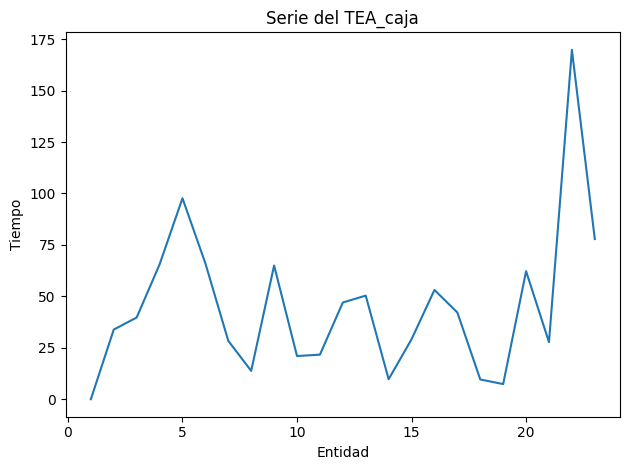

Media TEA_caja: 45.16754211521739
Errores TEA_caja: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


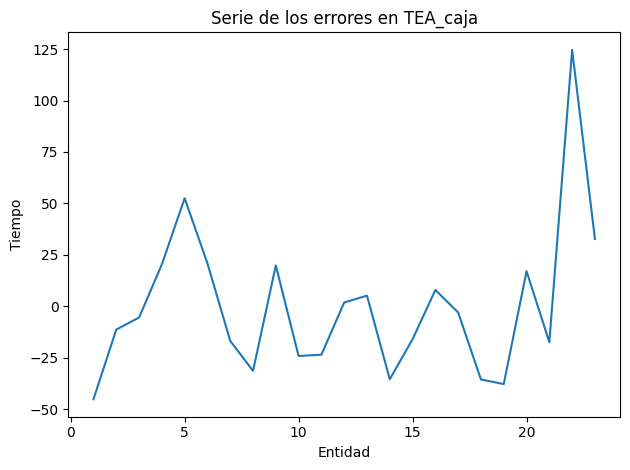

Número de lags a evaluar para TEA_caja:  1
Ljung-Box statistic para TEA_caja:  0.6867037775160301
Ljung-Box p-value para TEA_caja:  0.40728781615003173
Autocorrelation para TEA_caja


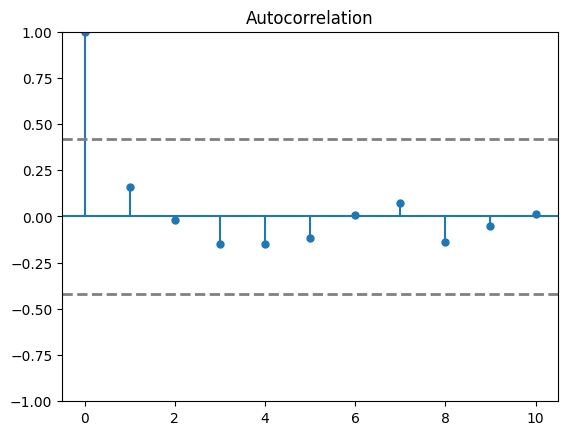

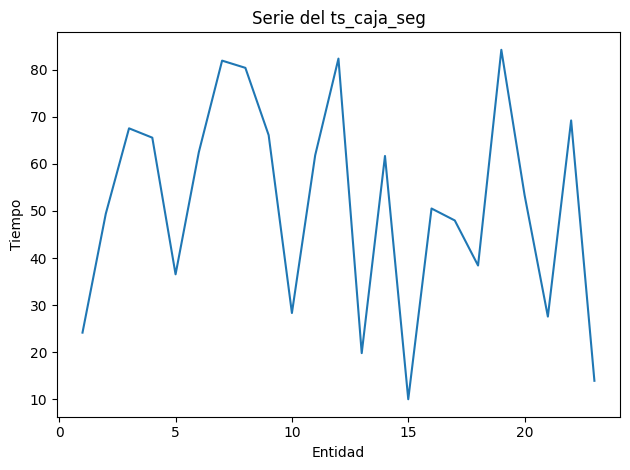

Media ts_caja_seg: 51.45017283652174
Errores ts_caja_seg: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


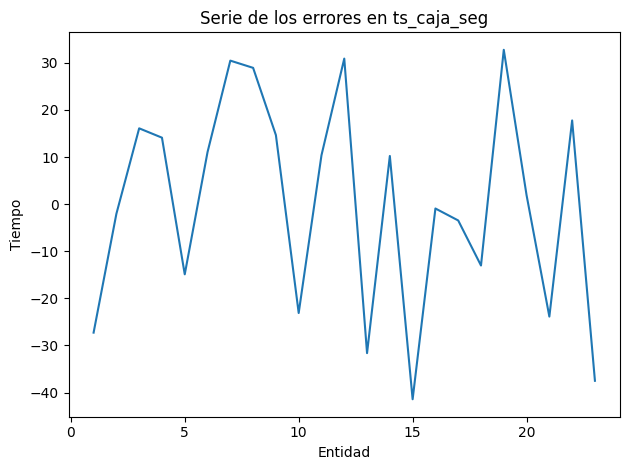

Número de lags a evaluar para ts_caja_seg:  1
Ljung-Box statistic para ts_caja_seg:  0.6977589171494901
Ljung-Box p-value para ts_caja_seg:  0.4035377567076517
Autocorrelation para ts_caja_seg


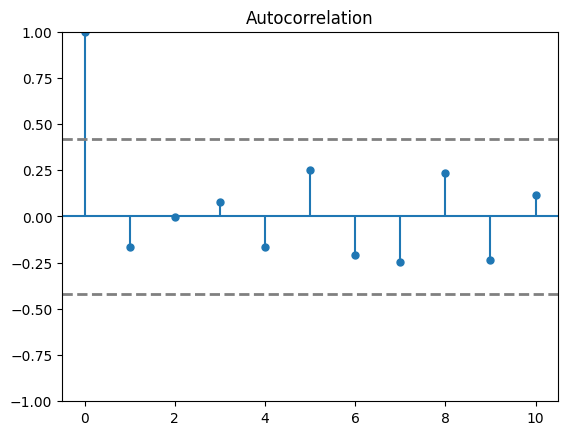

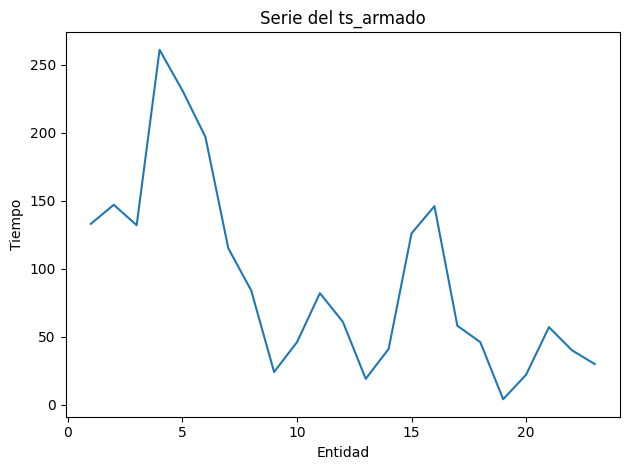

Media ts_armado: 91.4127391304348
Errores ts_armado: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


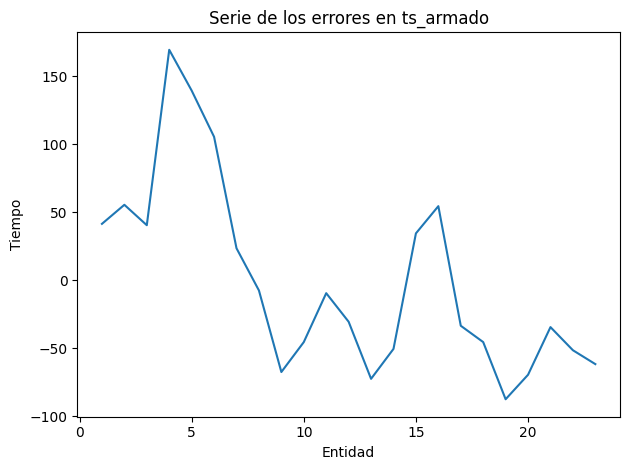

Número de lags a evaluar para ts_armado:  1
Ljung-Box statistic para ts_armado:  13.826822760938676
Ljung-Box p-value para ts_armado:  0.00020045403941326486
Autocorrelation para ts_armado


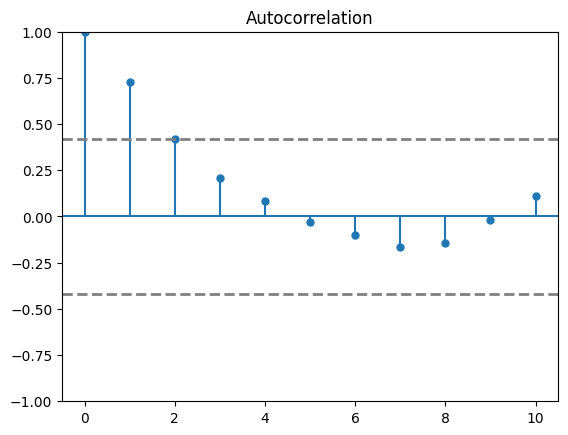

In [100]:
Autocorrelacion(df,["TEA_caja","ts_caja_seg","ts_armado"])

# Pruebas de Bondad de ajuste

## Pruebas de bondad de ajuste ML

#############
llegada_fila Distr. Normal Truncada
Parámetro estimado: Media = 46029.10566397172
Parámetro estimado: Desviación Estándar = 267.3163111708847


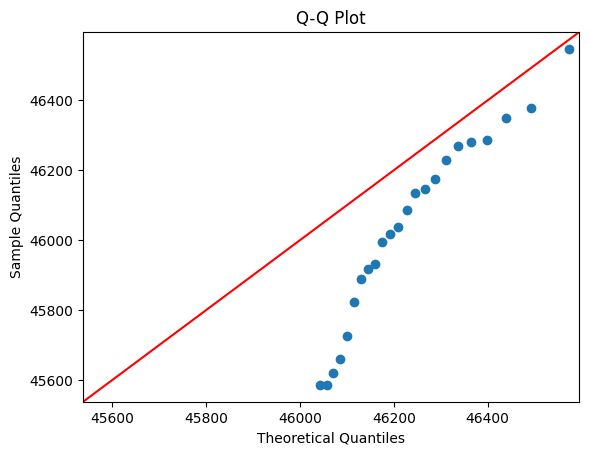

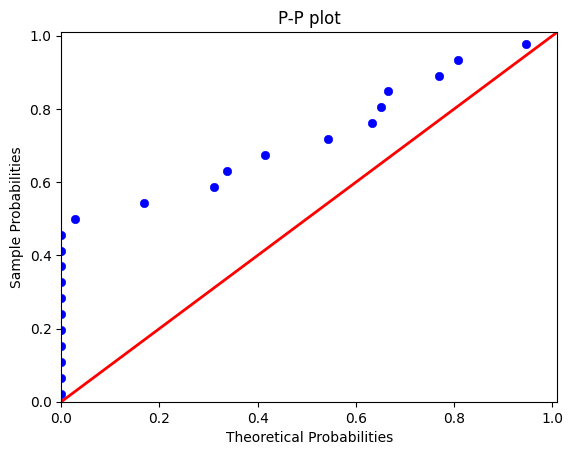



llegada_fila Distr. Normal
Parámetro estimado: Media = 46029.10566397172
Parámetro estimado: Desviación Estándar = 267.3163111708847


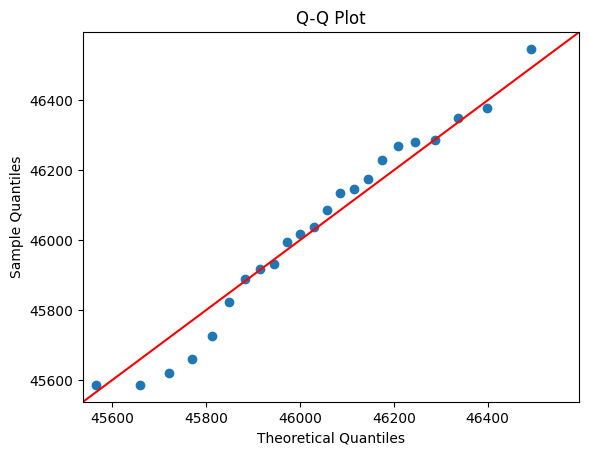

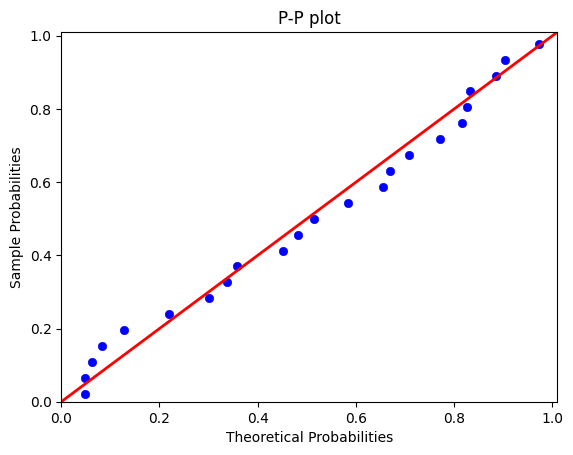



llegada_fila Distr. Exponencial
Parámetro estimado: Tasa = 2.1725384092846456e-05


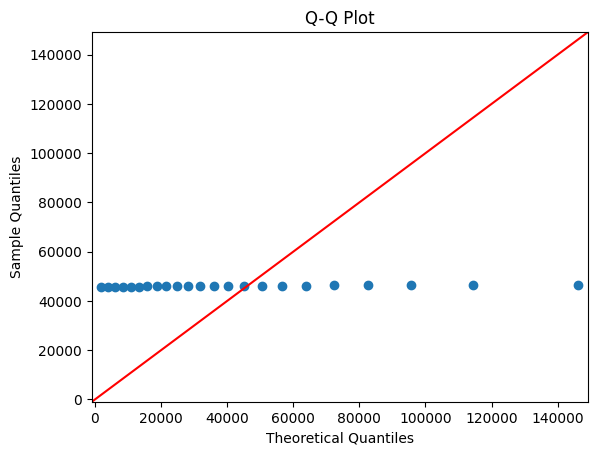

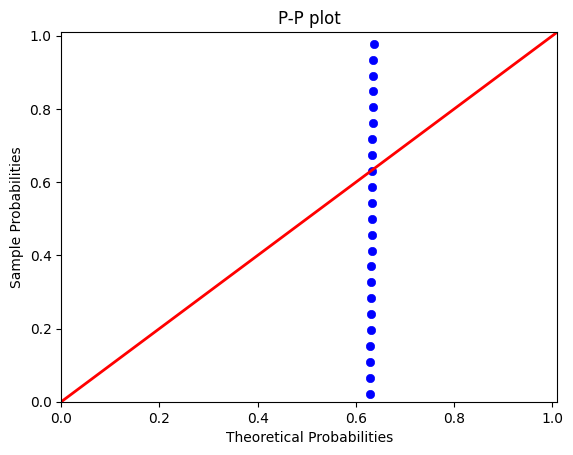



llegada_fila Distr. Uniforme
Parámetro estimado: a = 45586.0
Parámetro estimado: b = 46547.00242219998


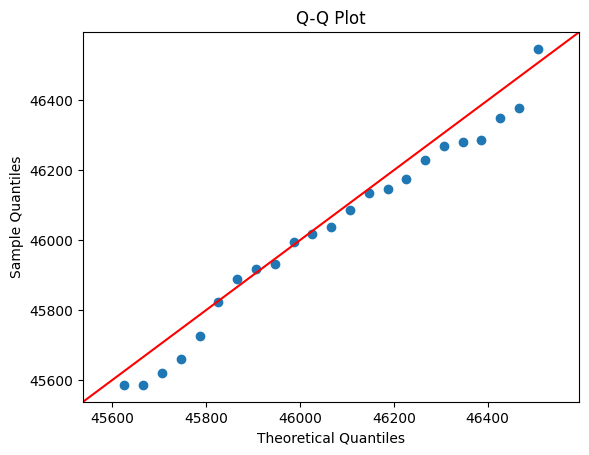

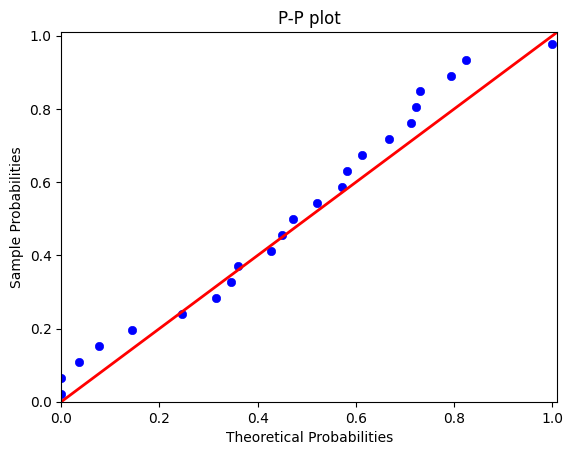



llegada_fila Distr. Weibull
Parámetro estimado: Escala = 46159.720454744536
Parámetro estimado: Forma = 190.32967385430877


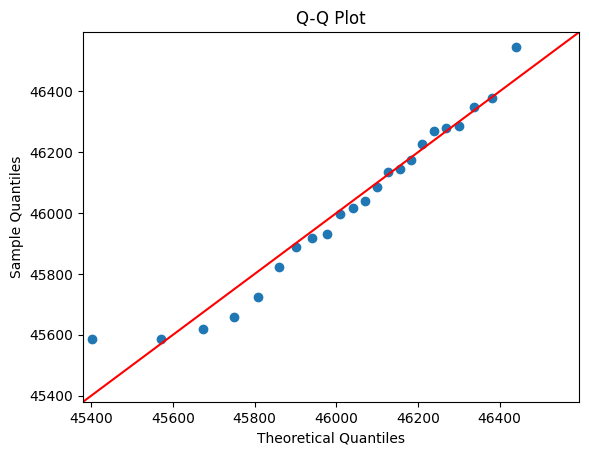

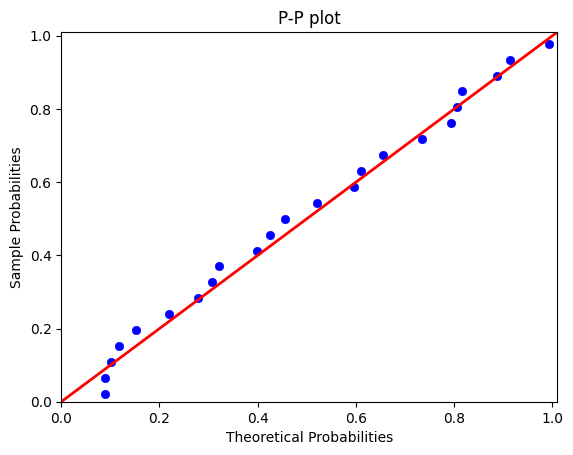



llegada_fila Distr. LogNorm
Parámetro estimado (normal asociada): Media = 10.737012333856661
Parámetro estimado (normal asociada): Desviación Estándar = 0.0058100211741555115


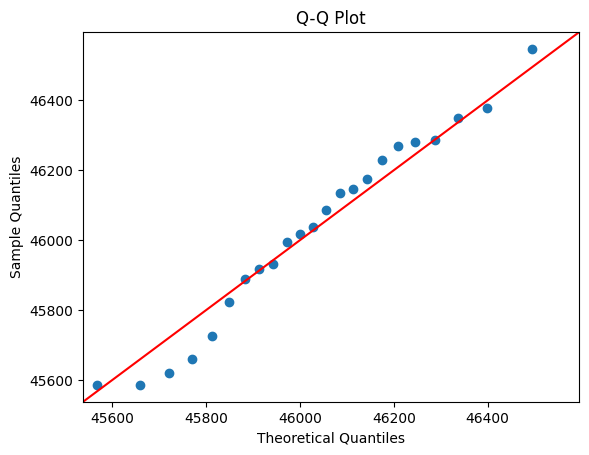

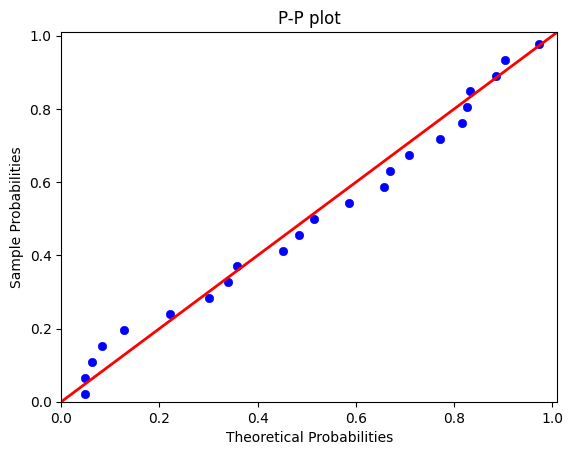



llegada_fila Distr. Triang
Parámetro estimado: a = 45586.0
Parámetro estimado: b = 46547.00242219998
Parámetro estimado: c = 45586.0


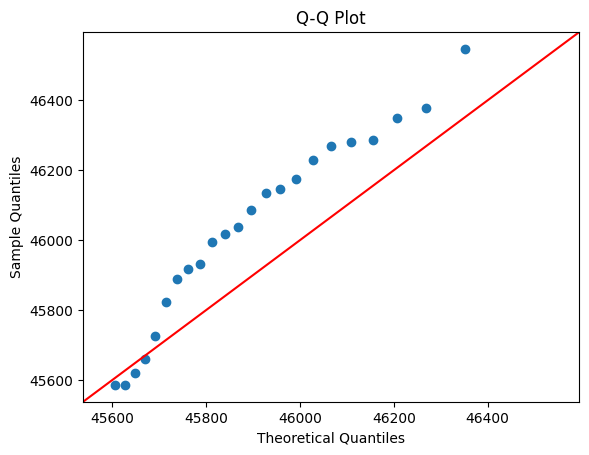

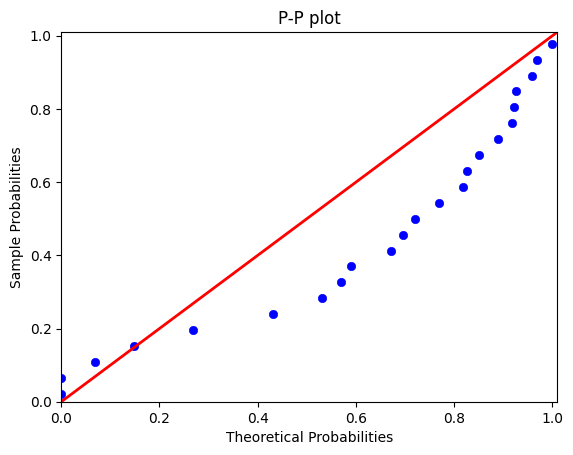

#############
#############
TEA_caja Distr. Normal Truncada
Parámetro estimado: Media = 45.16754211521739
Parámetro estimado: Desviación Estándar = 36.18199601283967


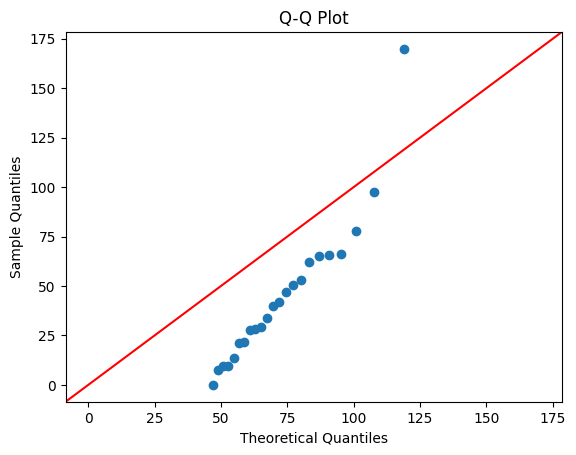

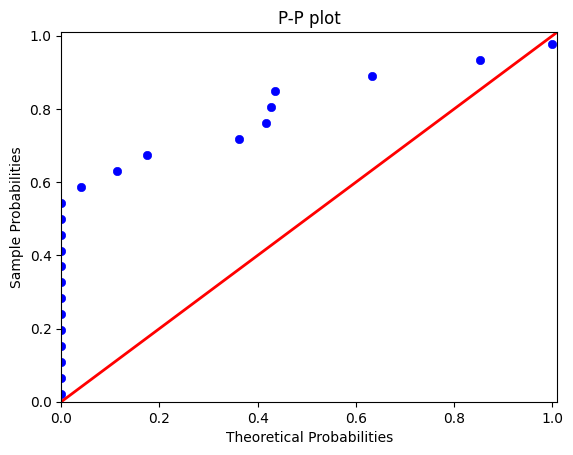



TEA_caja Distr. Normal
Parámetro estimado: Media = 45.16754211521739
Parámetro estimado: Desviación Estándar = 36.18199601283967


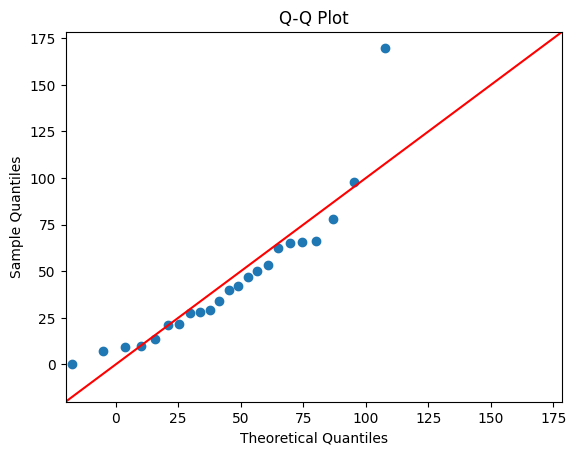

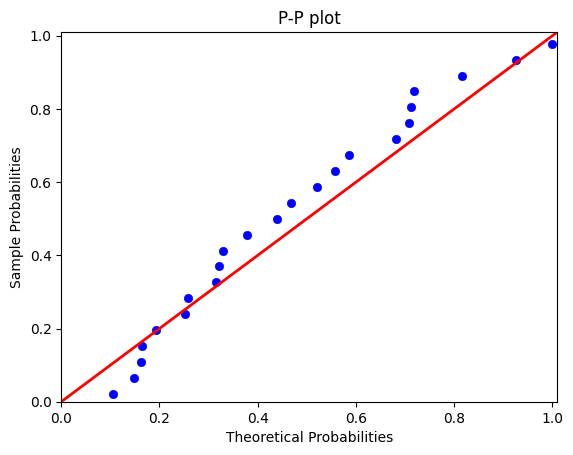



TEA_caja Distr. Exponencial
Parámetro estimado: Tasa = 0.022139792274928554


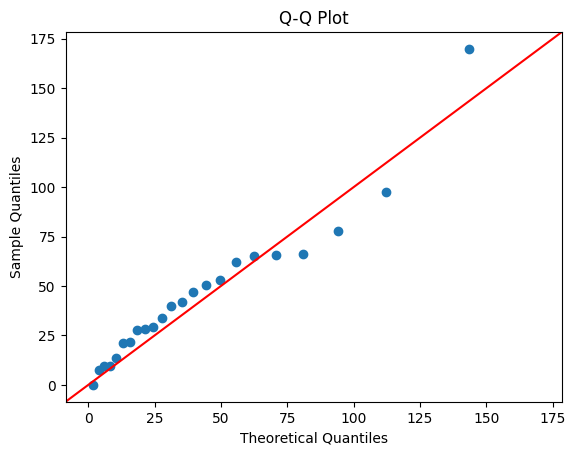

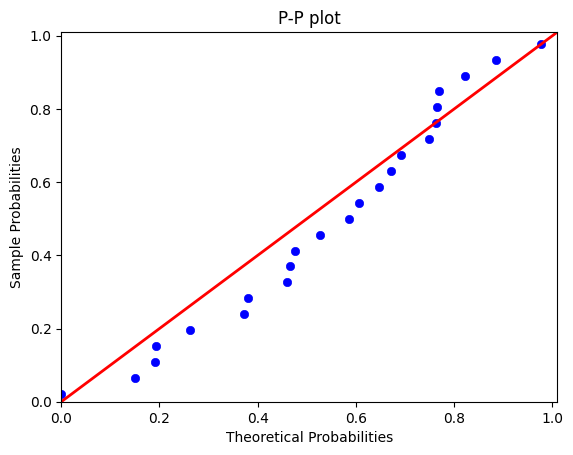



TEA_caja Distr. Uniforme
Parámetro estimado: a = 0.0
Parámetro estimado: b = 169.82182507


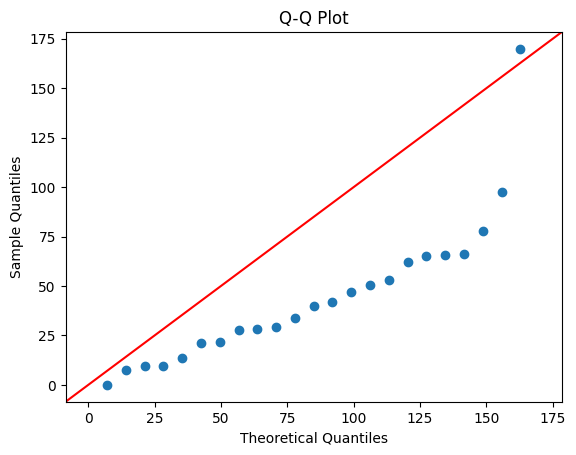

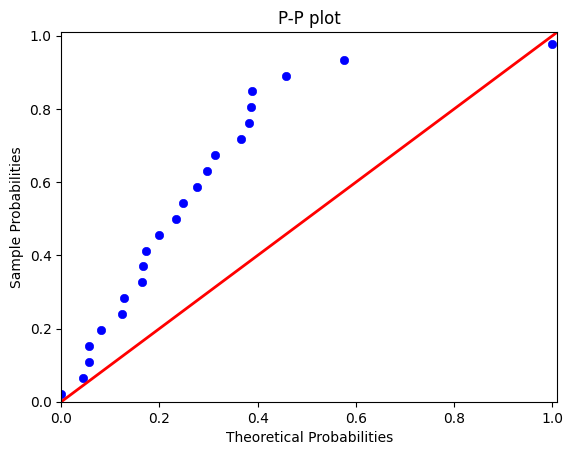



TEA_caja Distr. Weibull
Parámetro estimado: Escala = 50.94437257463082
Parámetro estimado: Forma = 1.4138173103082272


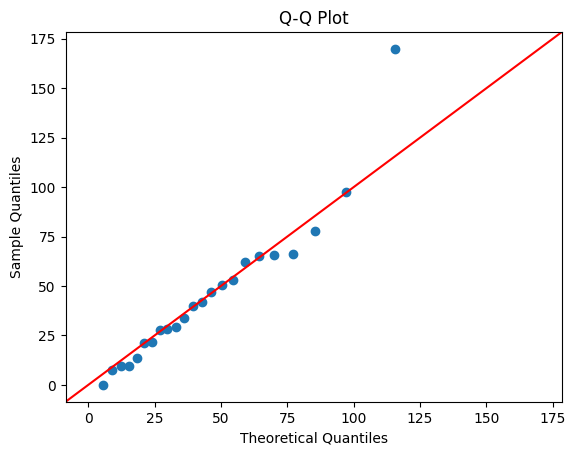

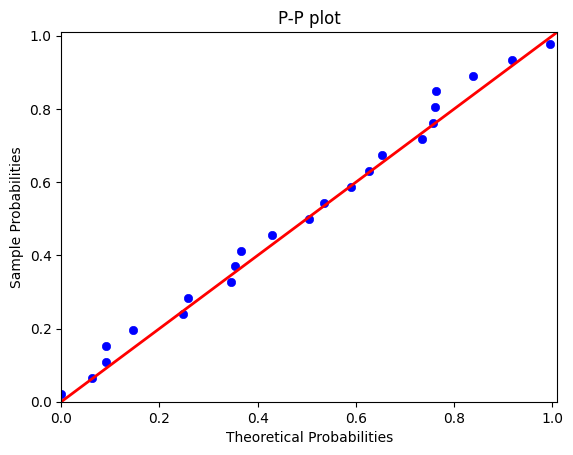



TEA_caja Distr. LogNorm
Parámetro estimado (normal asociada): Media = -inf
Parámetro estimado (normal asociada): Desviación Estándar = nan


c:\Users\user\Desktop\Andes\9\Simu\simu\Proyecto\funciones_qq_pp_plot.py:97: RuntimeWarning: divide by zero encountered in log
  mean = np.mean(np.log(data))
c:\Users\user\Desktop\Andes\9\Simu\simu\Proyecto\funciones_qq_pp_plot.py:103: RuntimeWarning: divide by zero encountered in log
  std_dev = np.std(np.log(data))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


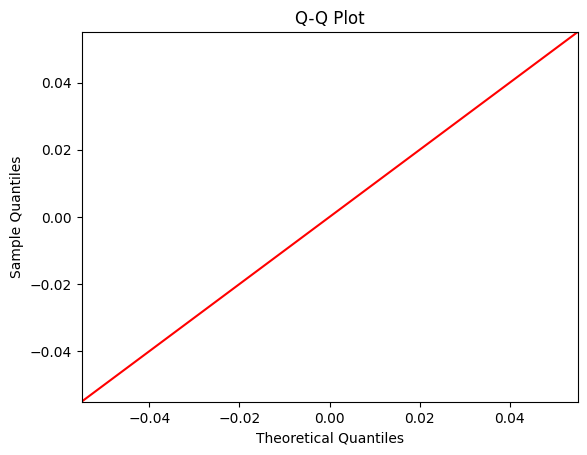

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2066: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2066: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


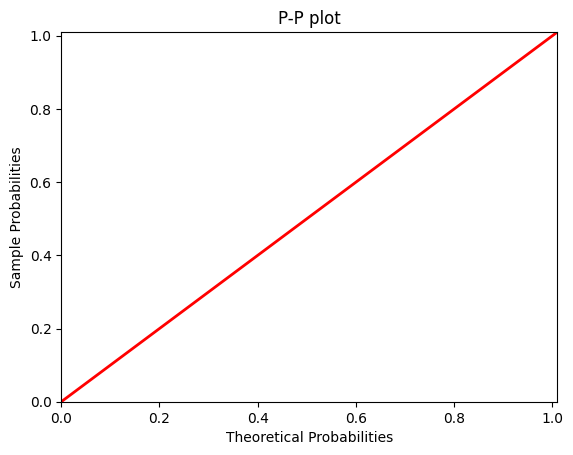



TEA_caja Distr. Triang
Parámetro estimado: a = 0.0
Parámetro estimado: b = 169.82182507
Parámetro estimado: c = 0.0


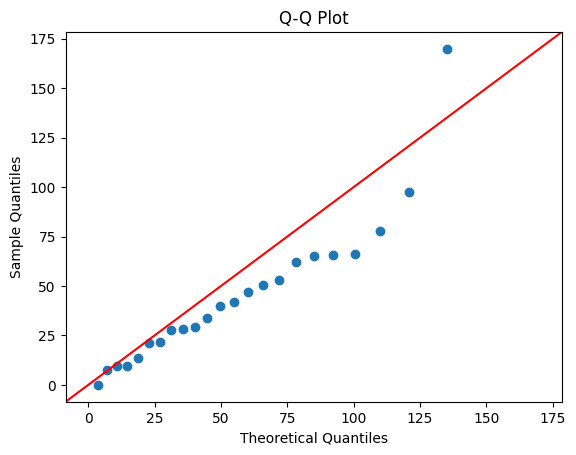

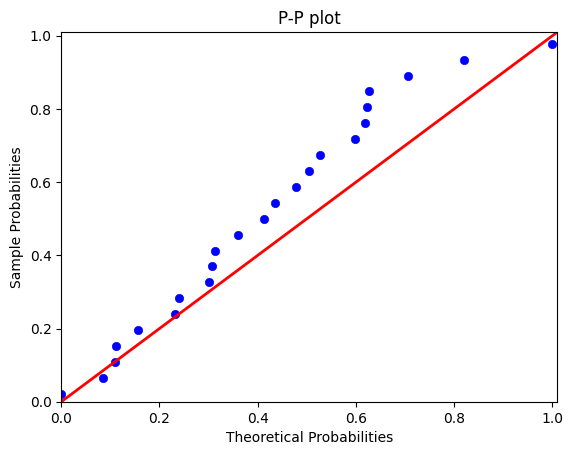

#############
#############
inicio_servicio_caja Distr. Normal Truncada
Parámetro estimado: Media = 45892.78092345999
Parámetro estimado: Desviación Estándar = 184.9958574464646


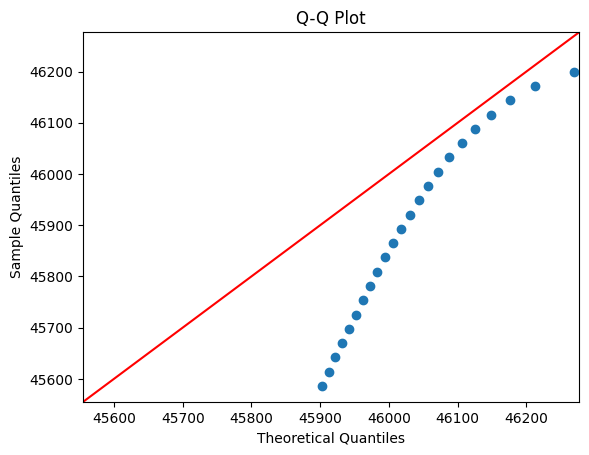

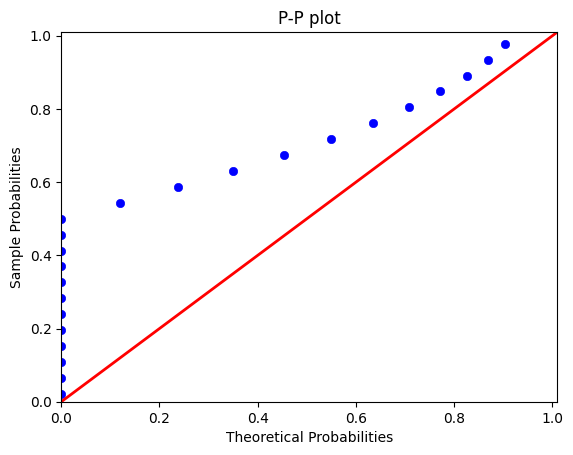



inicio_servicio_caja Distr. Normal
Parámetro estimado: Media = 45892.78092345999
Parámetro estimado: Desviación Estándar = 184.9958574464646


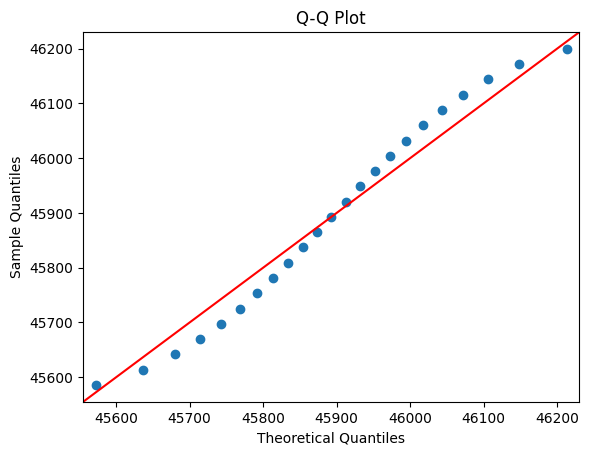

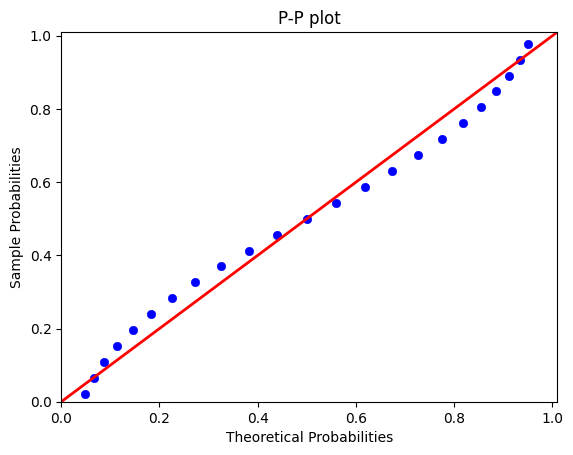



inicio_servicio_caja Distr. Exponencial
Parámetro estimado: Tasa = 2.1789919457437122e-05


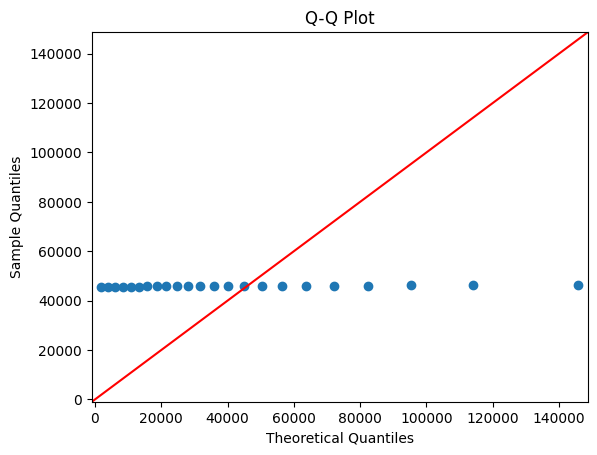

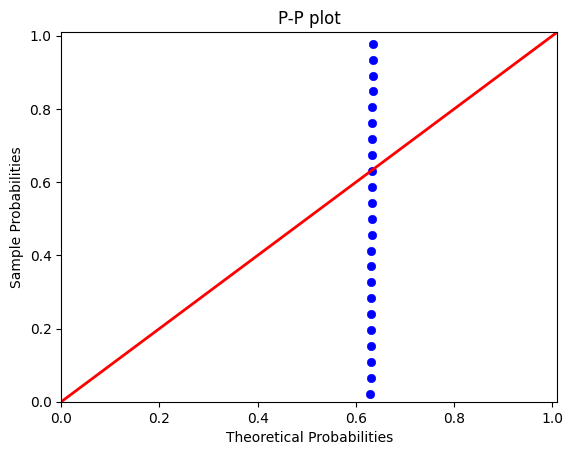



inicio_servicio_caja Distr. Uniforme
Parámetro estimado: a = 45586.0
Parámetro estimado: b = 46199.56184692


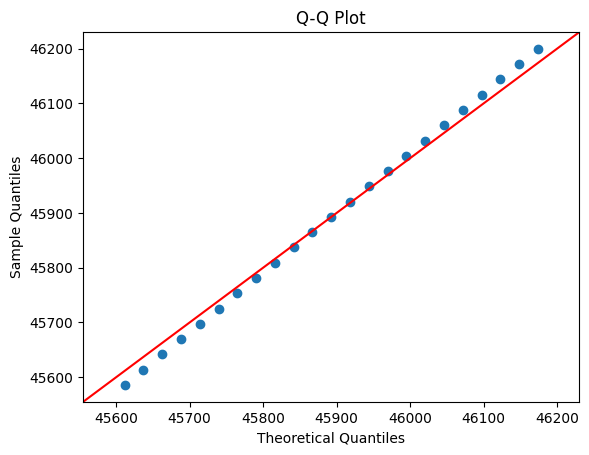

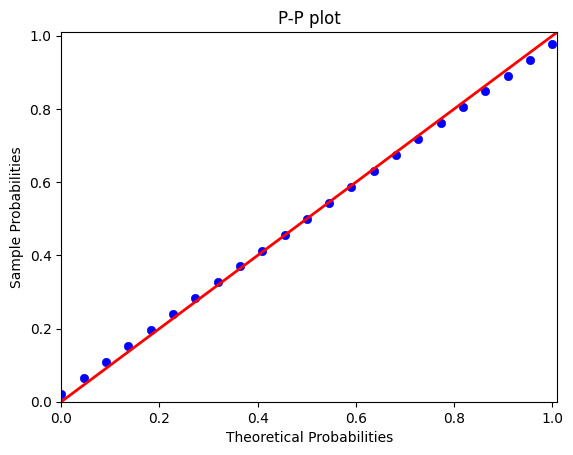



inicio_servicio_caja Distr. Weibull
Parámetro estimado: Escala = 45984.513294673736
Parámetro estimado: Forma = 274.7281770034921


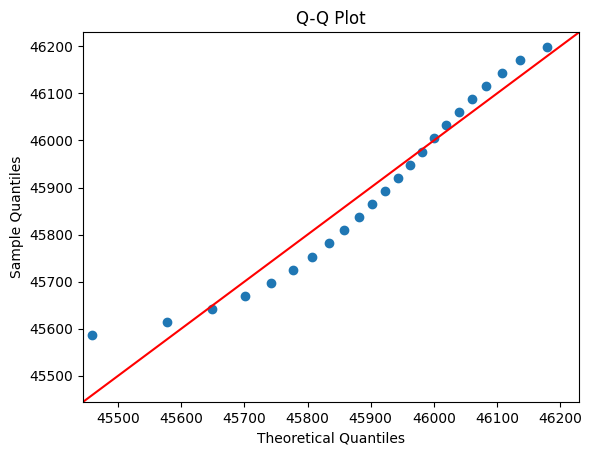

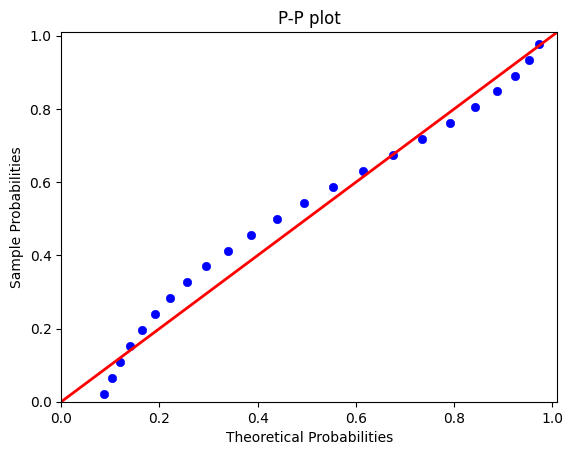



inicio_servicio_caja Distr. LogNorm
Parámetro estimado (normal asociada): Media = 10.73405498054336
Parámetro estimado (normal asociada): Desviación Estándar = 0.004031090549531646


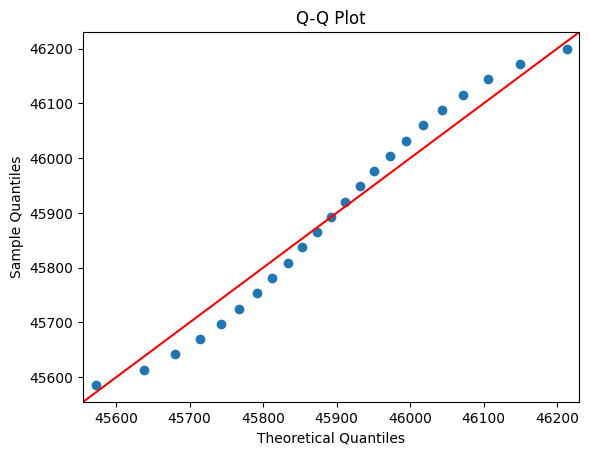

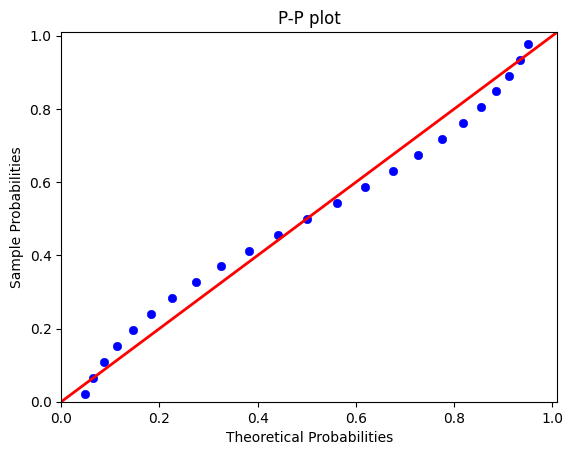



inicio_servicio_caja Distr. Triang
Parámetro estimado: a = 45586.0
Parámetro estimado: b = 46199.56184692
Parámetro estimado: c = 45586.0


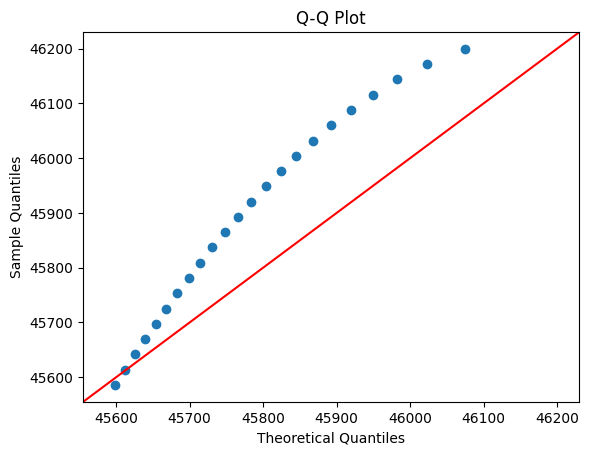

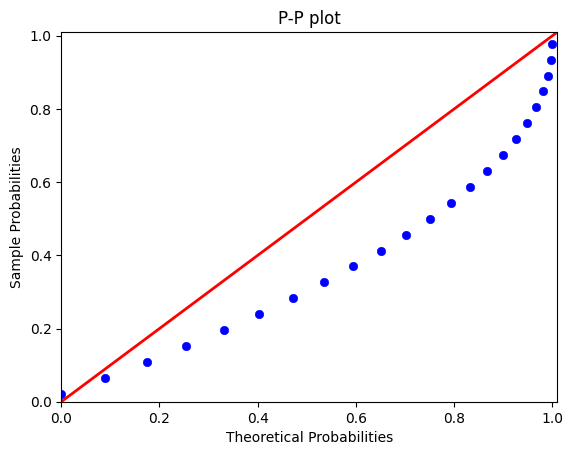

#############
#############
fin_servicio_caja Distr. Normal Truncada
Parámetro estimado: Media = 45906.72551089
Parámetro estimado: Desviación Estándar = 184.99585744646458


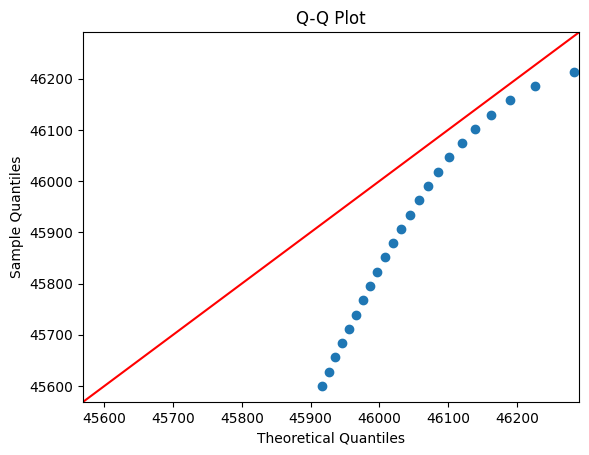

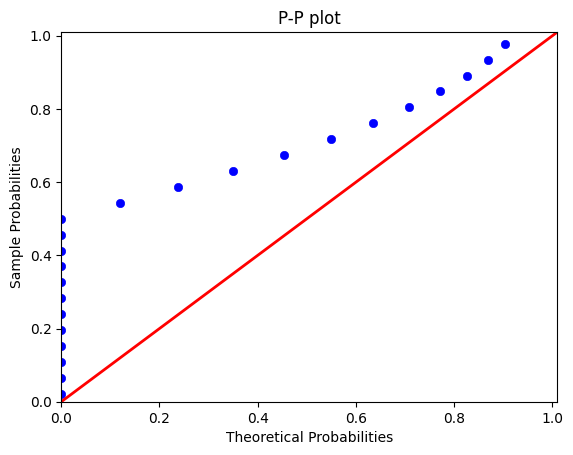



fin_servicio_caja Distr. Normal
Parámetro estimado: Media = 45906.72551089
Parámetro estimado: Desviación Estándar = 184.99585744646458


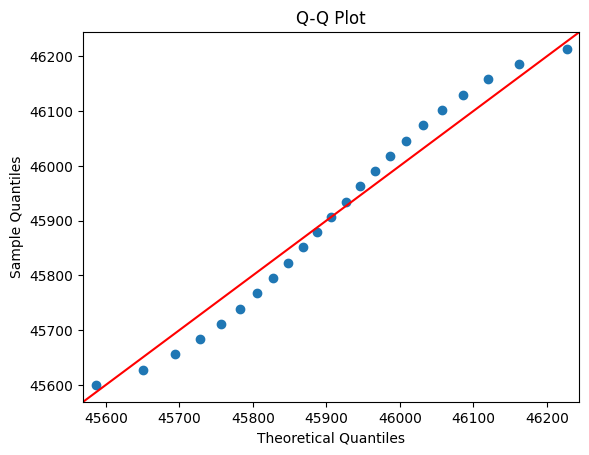

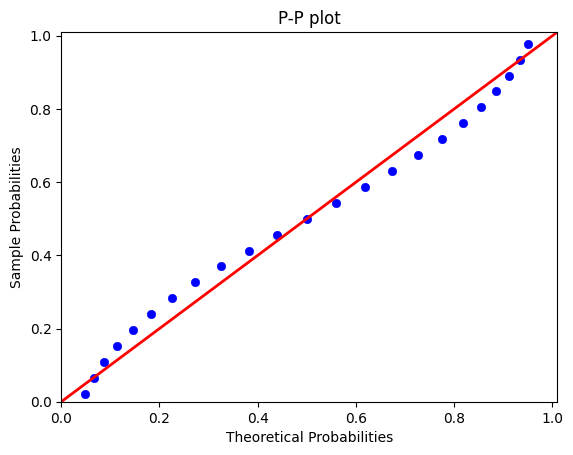



fin_servicio_caja Distr. Exponencial
Parámetro estimado: Tasa = 2.1783300570256965e-05


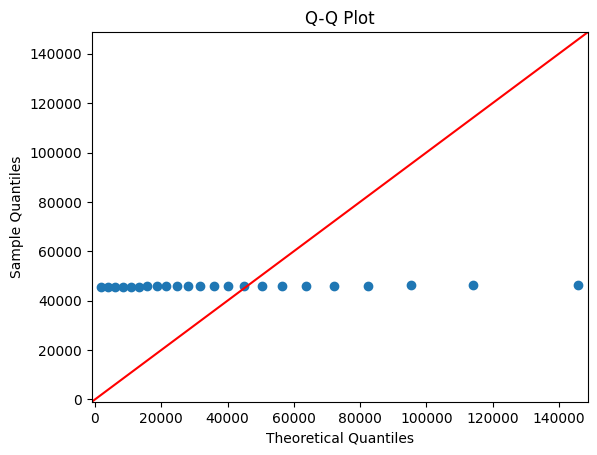

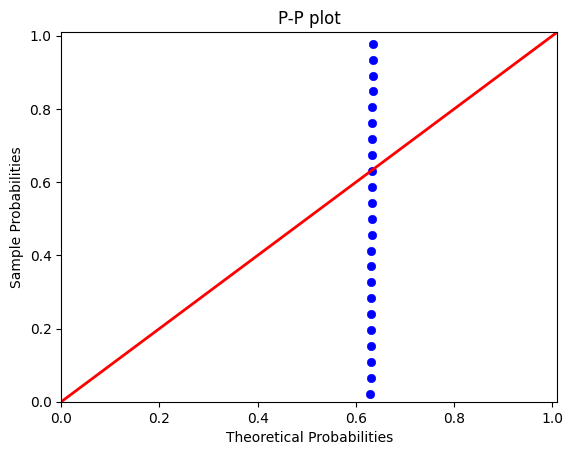



fin_servicio_caja Distr. Uniforme
Parámetro estimado: a = 45599.94458743
Parámetro estimado: b = 46213.50643435


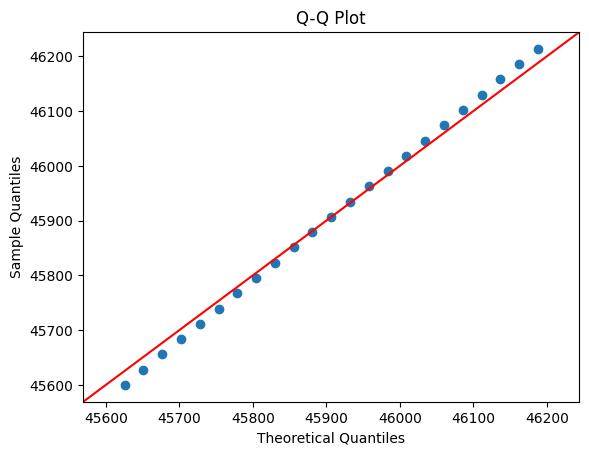

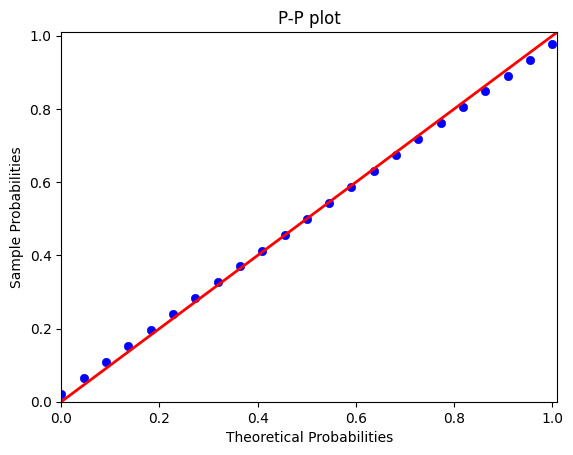



fin_servicio_caja Distr. Weibull
Parámetro estimado: Escala = 45998.45798559766
Parámetro estimado: Forma = 274.81160398120375


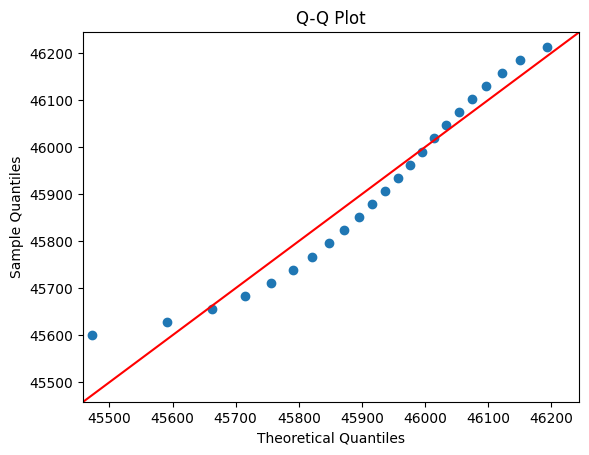

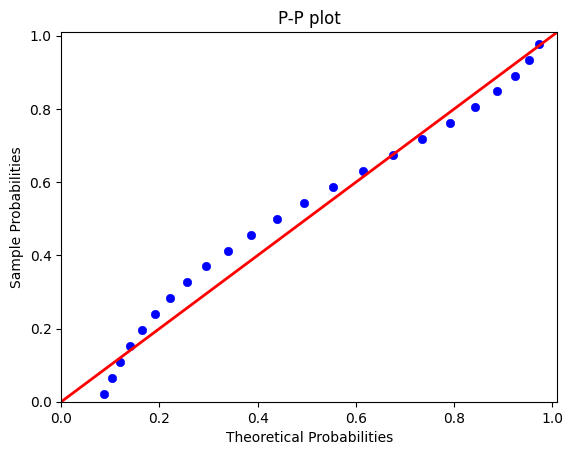



fin_servicio_caja Distr. LogNorm
Parámetro estimado (normal asociada): Media = 10.734358790762101
Parámetro estimado (normal asociada): Desviación Estándar = 0.004029866041174657


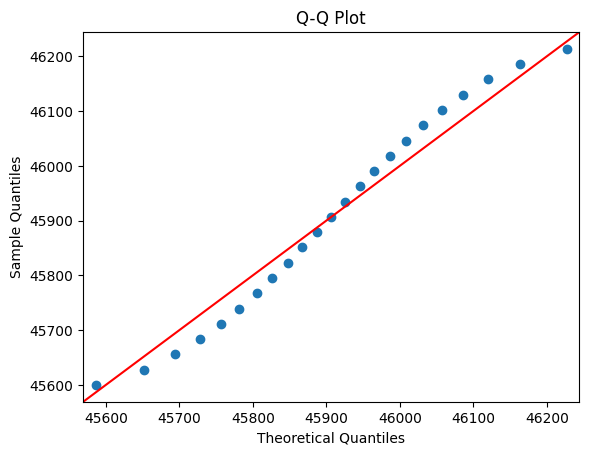

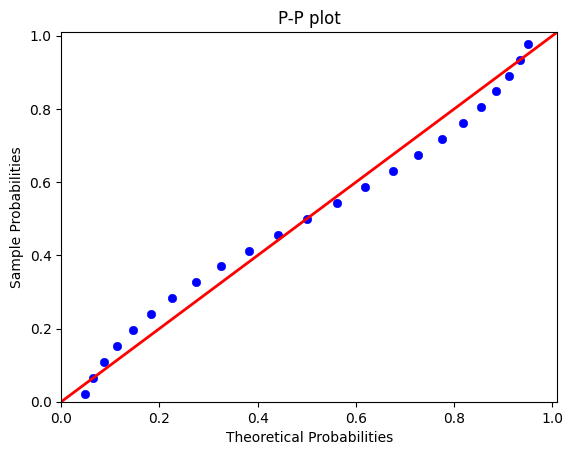



fin_servicio_caja Distr. Triang
Parámetro estimado: a = 45599.94458743
Parámetro estimado: b = 46213.50643435
Parámetro estimado: c = 45599.94458743


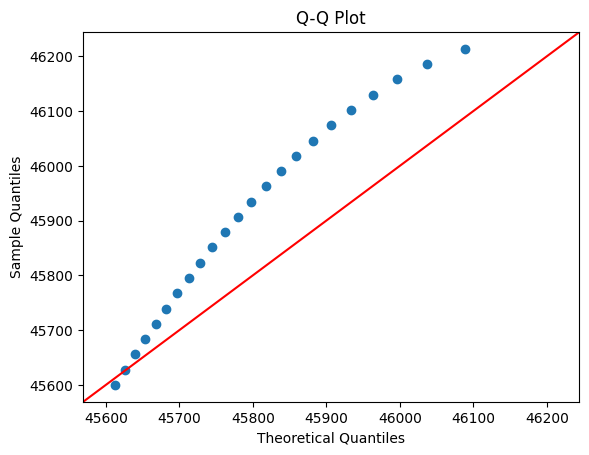

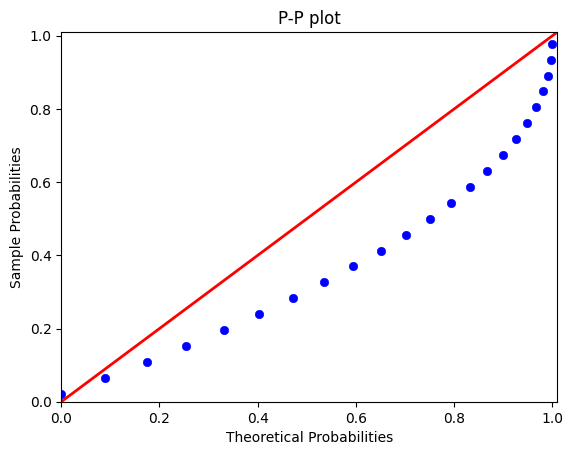

#############
#############
ts_caja_seg Distr. Normal Truncada
Parámetro estimado: Media = 51.45017283652174
Parámetro estimado: Desviación Estándar = 22.361308572191263


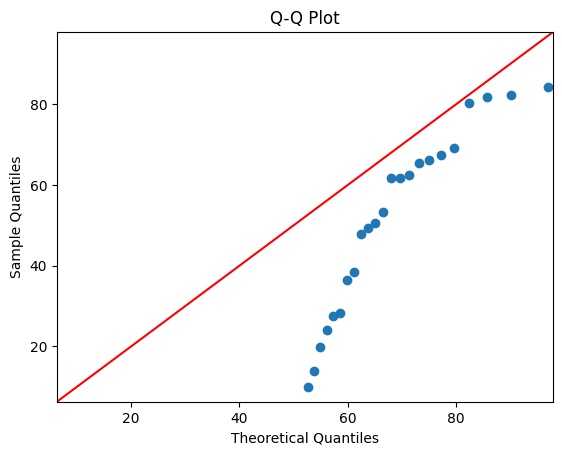

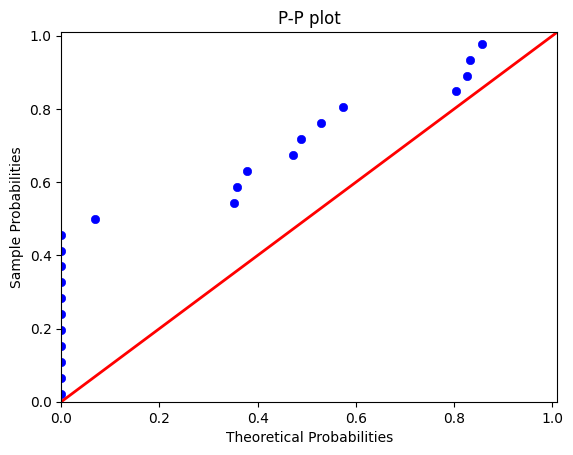



ts_caja_seg Distr. Normal
Parámetro estimado: Media = 51.45017283652174
Parámetro estimado: Desviación Estándar = 22.361308572191263


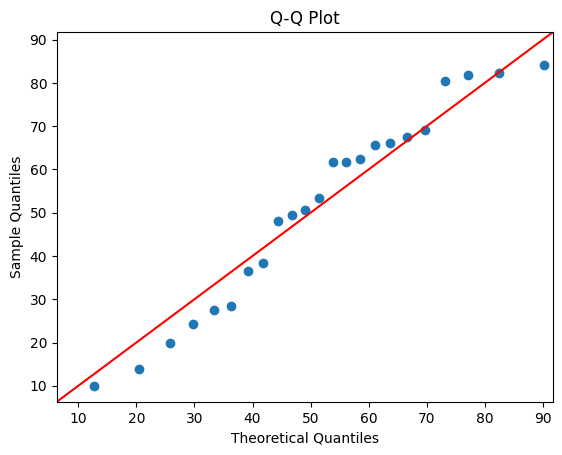

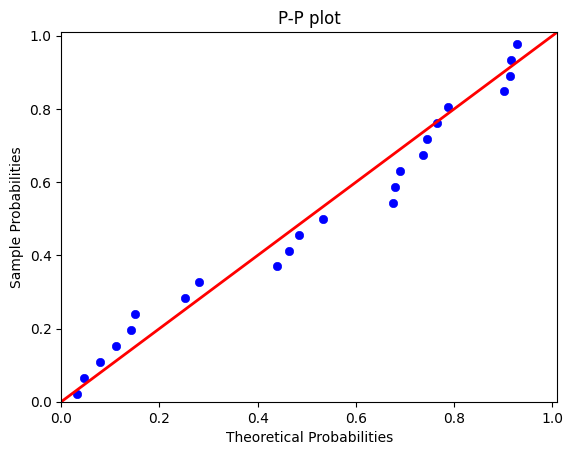



ts_caja_seg Distr. Exponencial
Parámetro estimado: Tasa = 0.019436280674457778


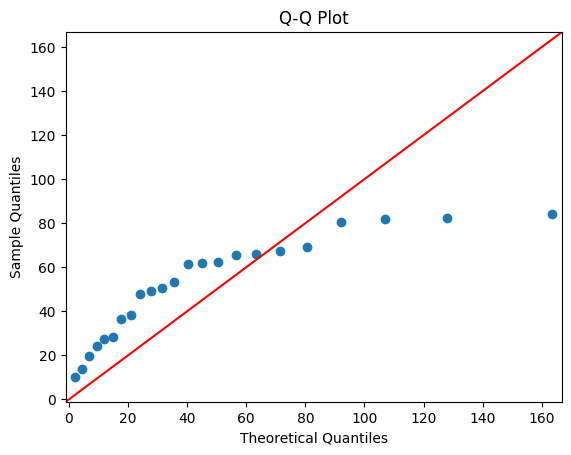

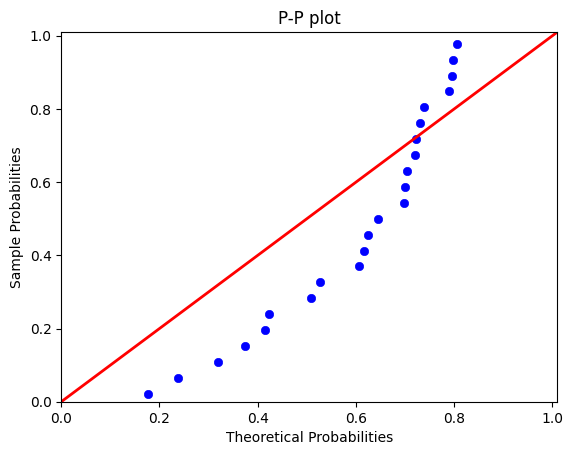



ts_caja_seg Distr. Uniforme
Parámetro estimado: a = 10.02534426
Parámetro estimado: b = 84.21442687


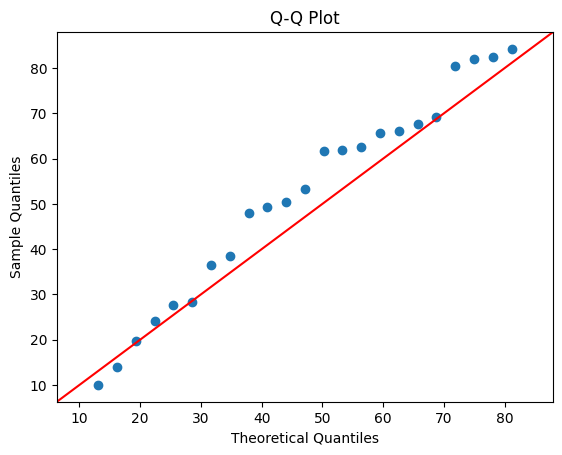

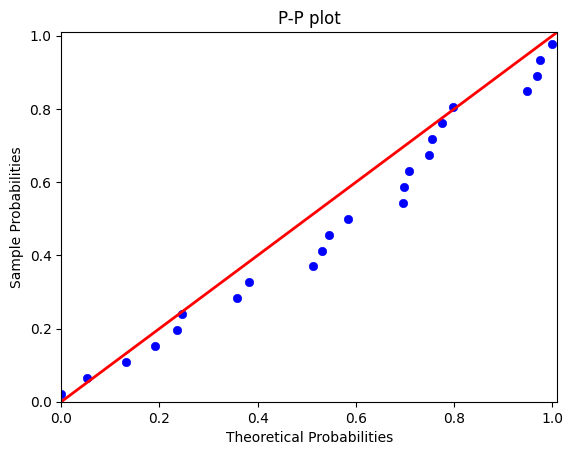



ts_caja_seg Distr. Weibull
Parámetro estimado: Escala = 57.94414506234998
Parámetro estimado: Forma = 2.5104953995925356


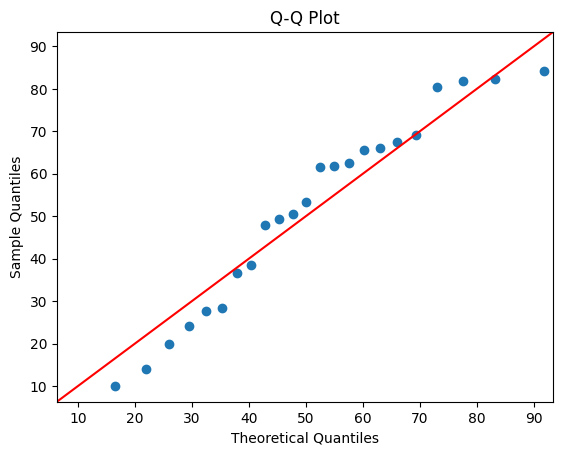

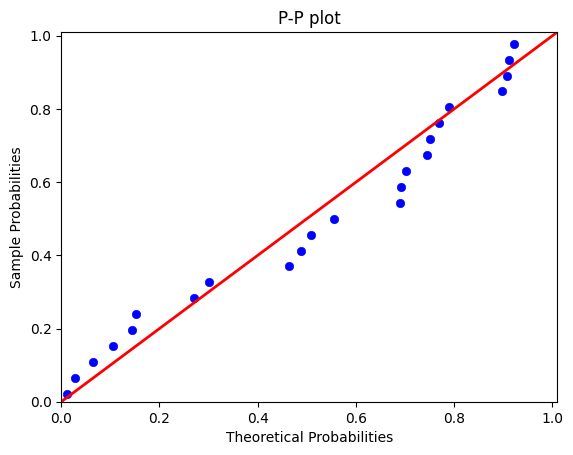



ts_caja_seg Distr. LogNorm
Parámetro estimado (normal asociada): Media = 3.8057405470111836
Parámetro estimado (normal asociada): Desviación Estándar = 0.5772827395966377


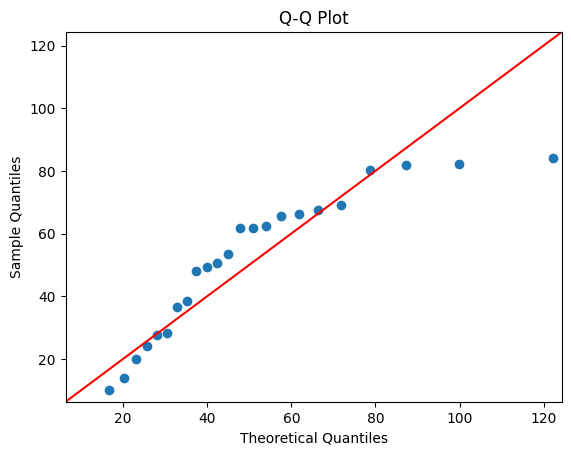

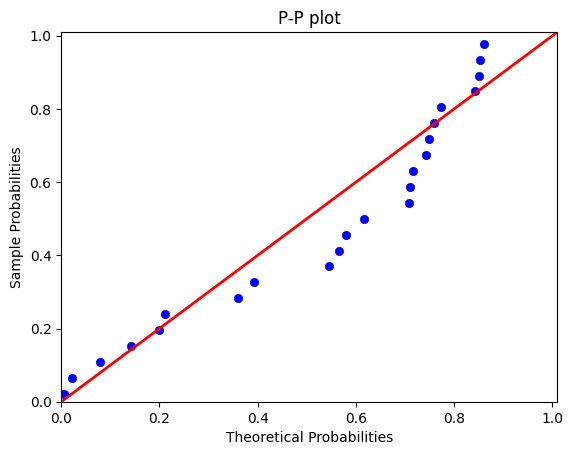



ts_caja_seg Distr. Triang
Parámetro estimado: a = 10.02534426
Parámetro estimado: b = 84.21442687
Parámetro estimado: c = 24.16721494


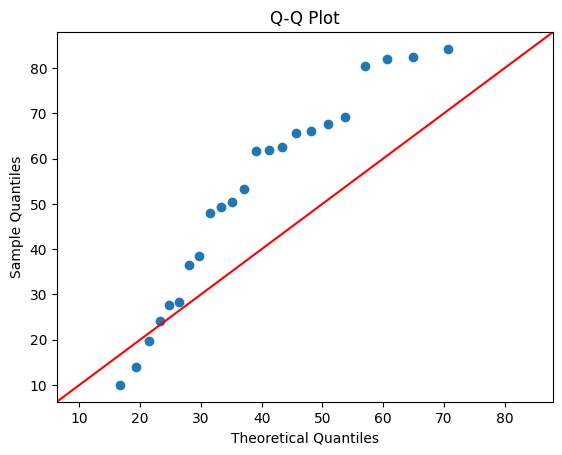

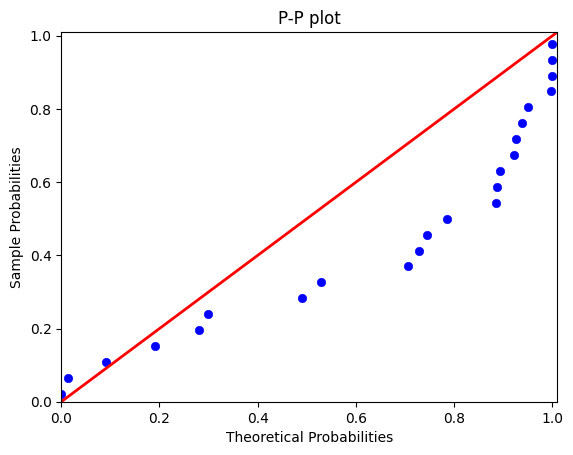

#############
#############
inicio_servicio_armado Distr. Normal Truncada
Parámetro estimado: Media = 48315.97606569086
Parámetro estimado: Desviación Estándar = 1198.5590985230556


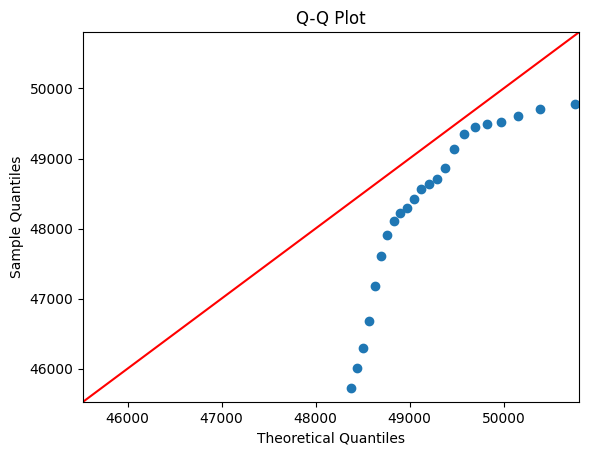

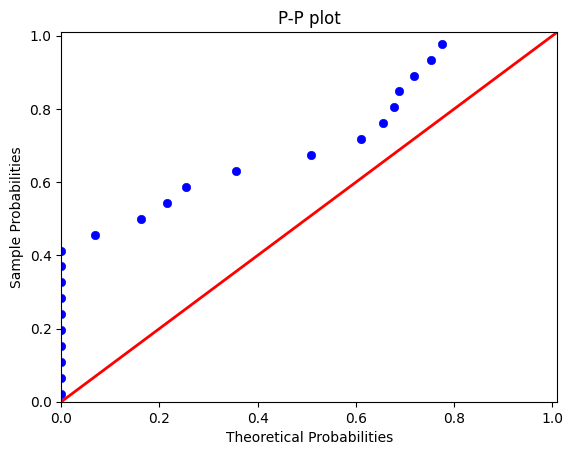



inicio_servicio_armado Distr. Normal
Parámetro estimado: Media = 48315.97606569086
Parámetro estimado: Desviación Estándar = 1198.5590985230556


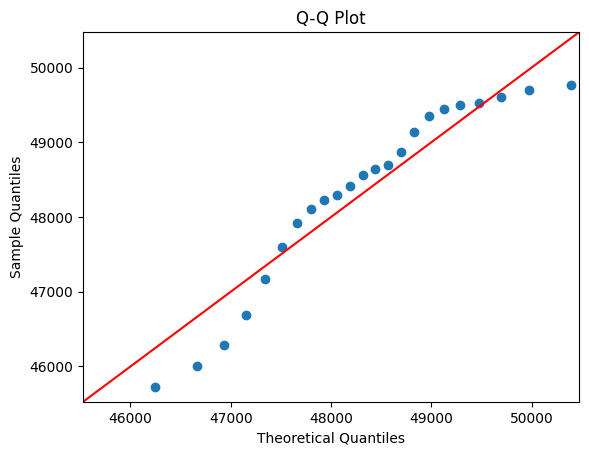

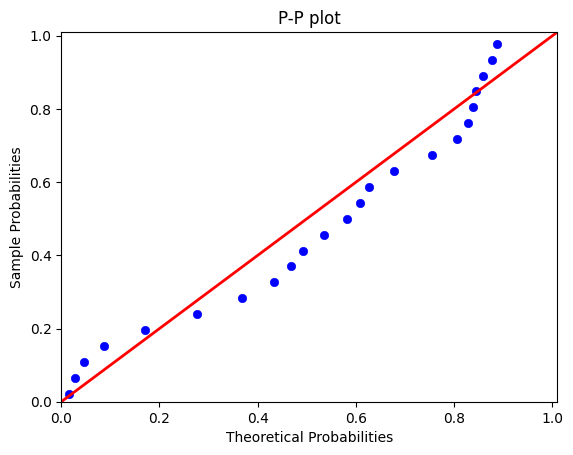



inicio_servicio_armado Distr. Exponencial
Parámetro estimado: Tasa = 2.0697087825368372e-05


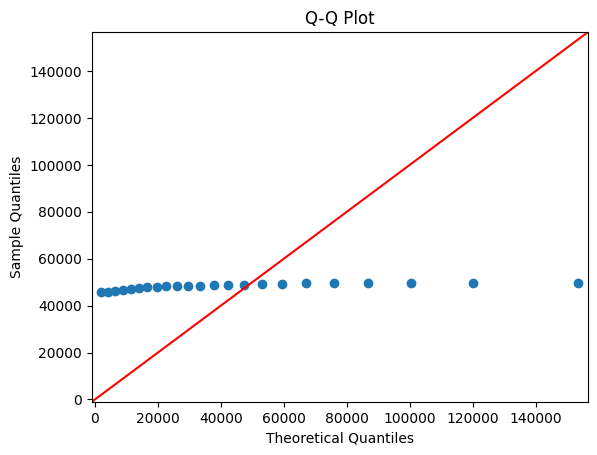

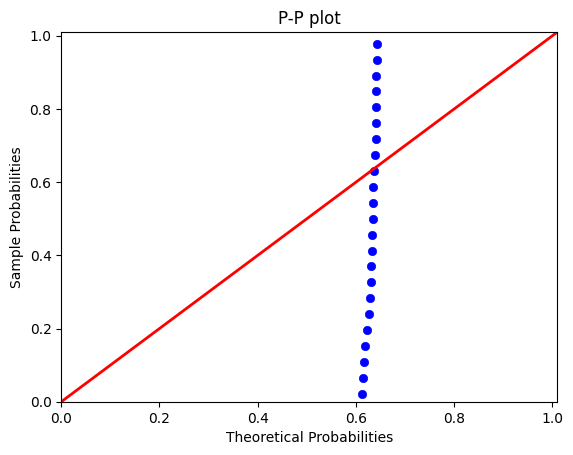



inicio_servicio_armado Distr. Uniforme
Parámetro estimado: a = 45729.94458743
Parámetro estimado: b = 49772.07058742997


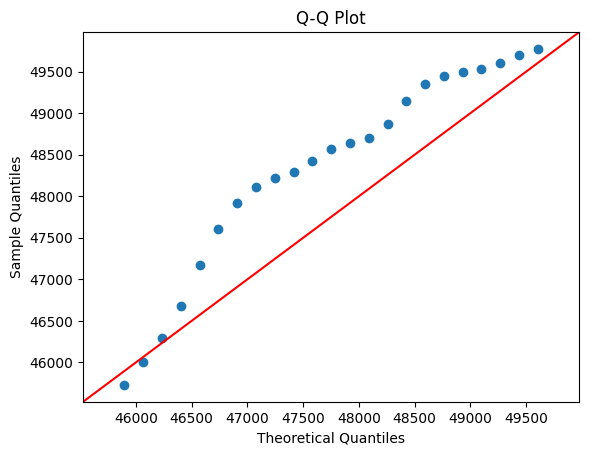

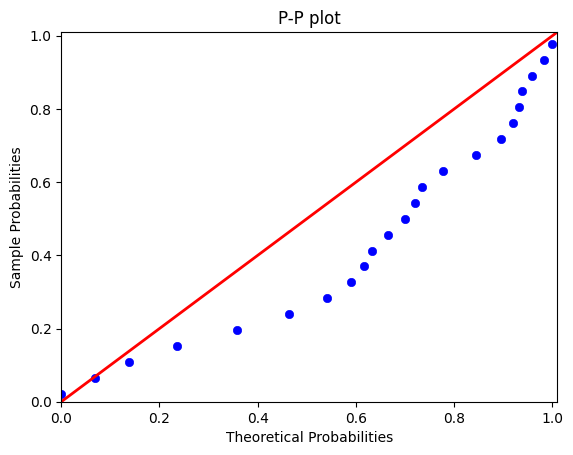



inicio_servicio_armado Distr. Weibull
Parámetro estimado: Escala = 48855.86599088809
Parámetro estimado: Forma = 53.667045436407626


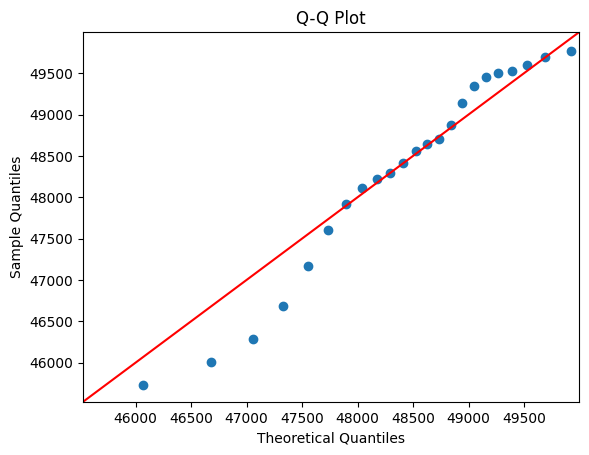

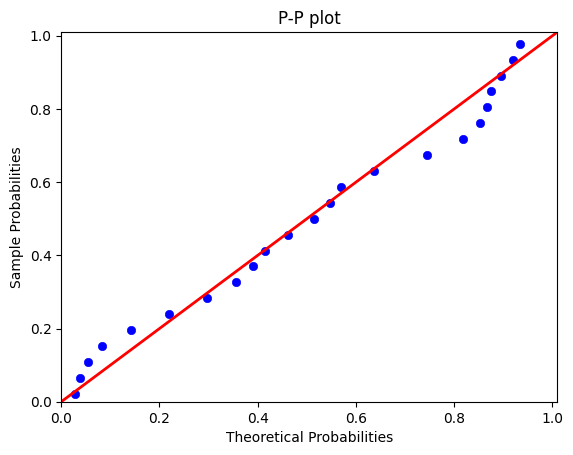



inicio_servicio_armado Distr. LogNorm
Parámetro estimado (normal asociada): Media = 10.78520584026152
Parámetro estimado (normal asociada): Desviación Estándar = 0.02505030824556949


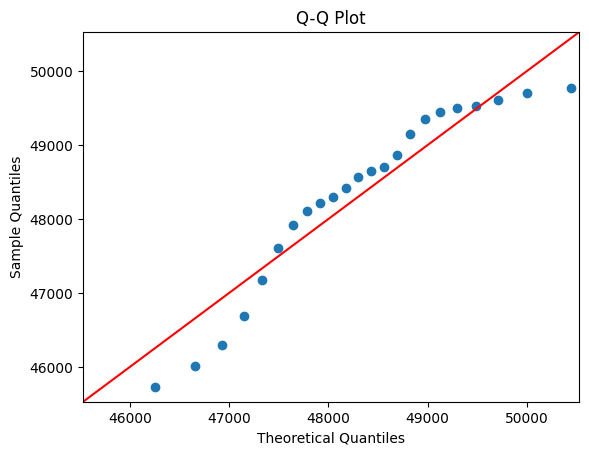

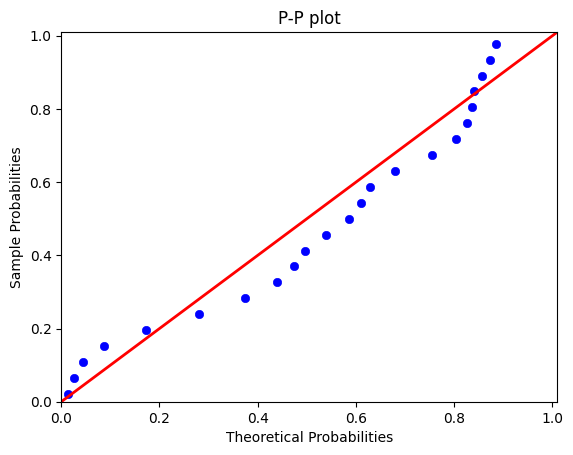



inicio_servicio_armado Distr. Triang
Parámetro estimado: a = 45729.94458743
Parámetro estimado: b = 49772.07058742997
Parámetro estimado: c = 45729.94458743


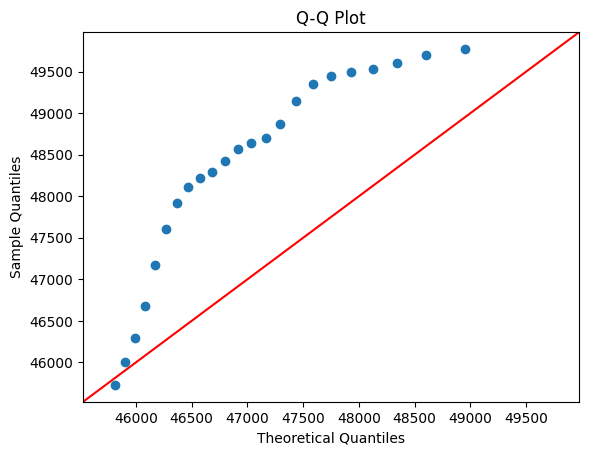

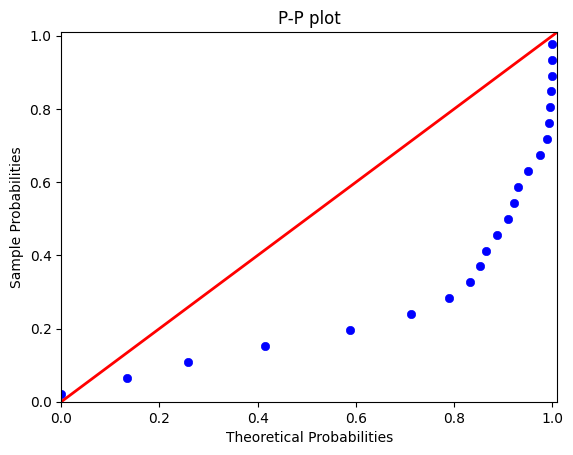

#############
#############
fin_servicio_armado Distr. Normal Truncada
Parámetro estimado: Media = 48407.388804821305
Parámetro estimado: Desviación Estándar = 1152.6383238686233


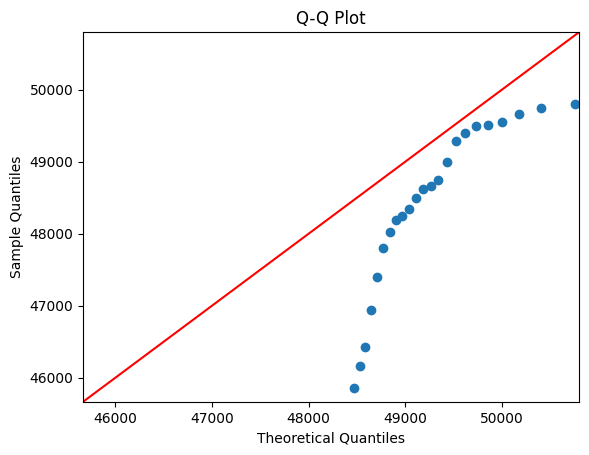

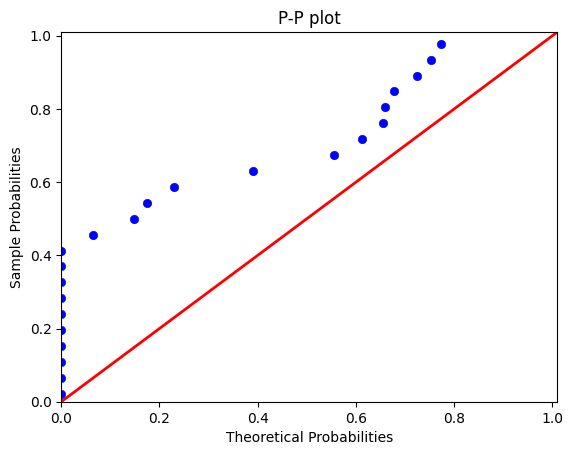



fin_servicio_armado Distr. Normal
Parámetro estimado: Media = 48407.388804821305
Parámetro estimado: Desviación Estándar = 1152.6383238686233


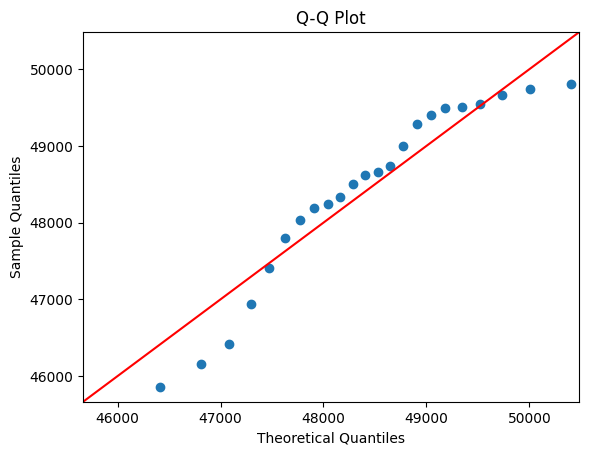

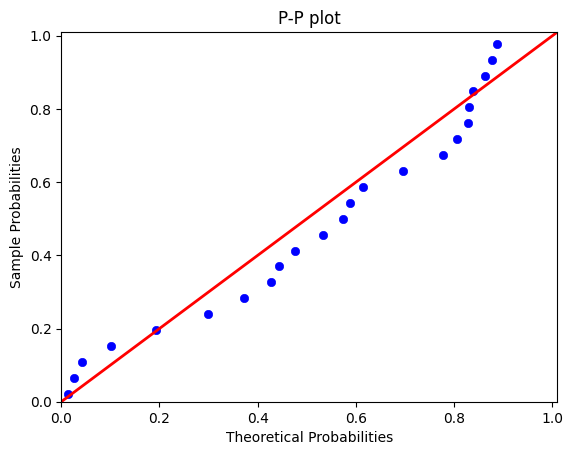



fin_servicio_armado Distr. Exponencial
Parámetro estimado: Tasa = 2.0658003348042632e-05


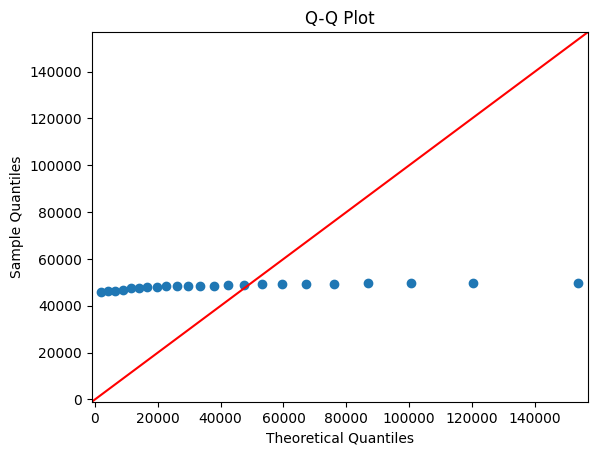

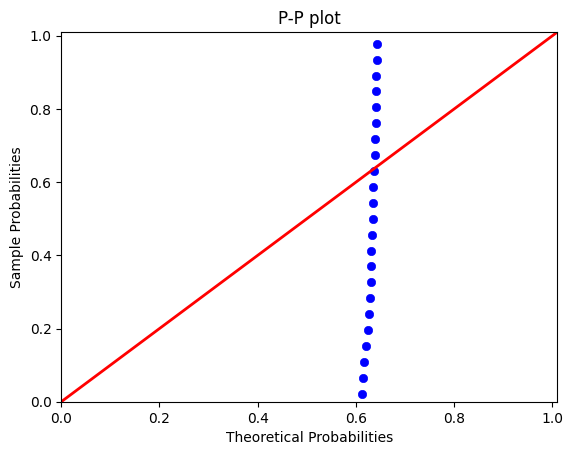



fin_servicio_armado Distr. Uniforme
Parámetro estimado: a = 45862.95758743
Parámetro estimado: b = 49801.91758742998


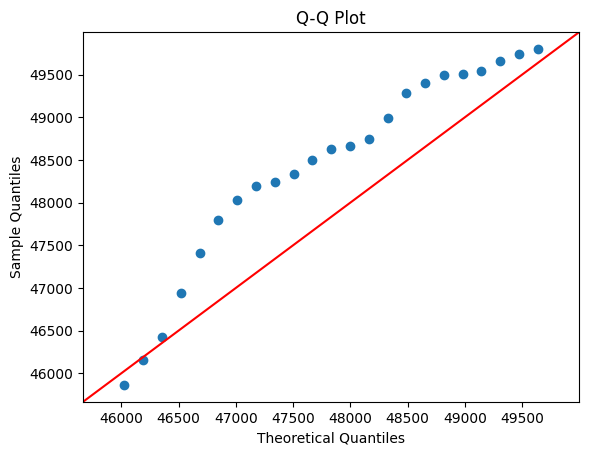

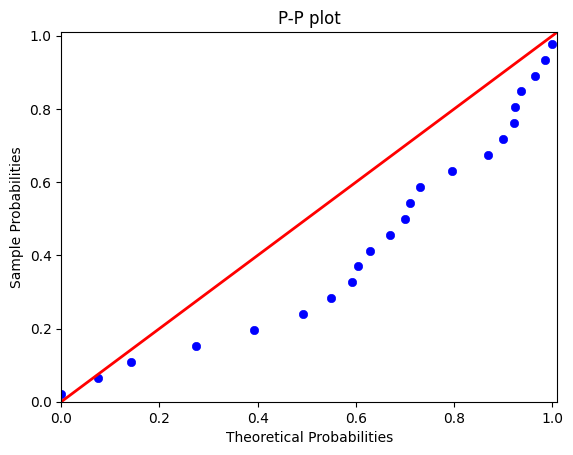



fin_servicio_armado Distr. Weibull
Parámetro estimado: Escala = 48926.00095879764
Parámetro estimado: Forma = 55.984119609593066


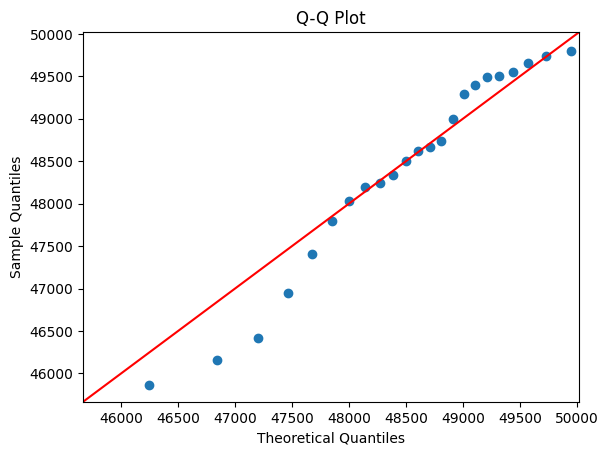

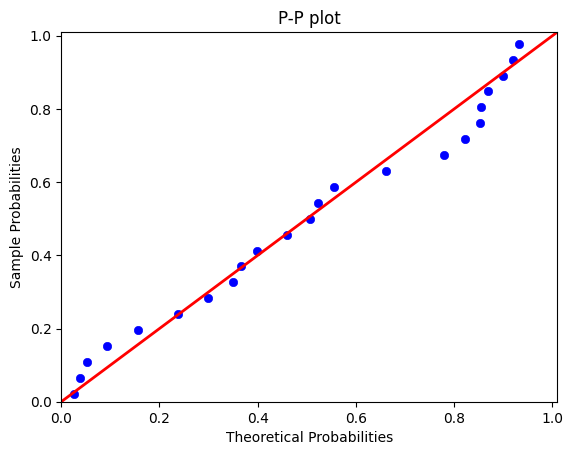



fin_servicio_armado Distr. LogNorm
Parámetro estimado (normal asociada): Media = 10.78712058646915
Parámetro estimado (normal asociada): Desviación Estándar = 0.024042541582583357


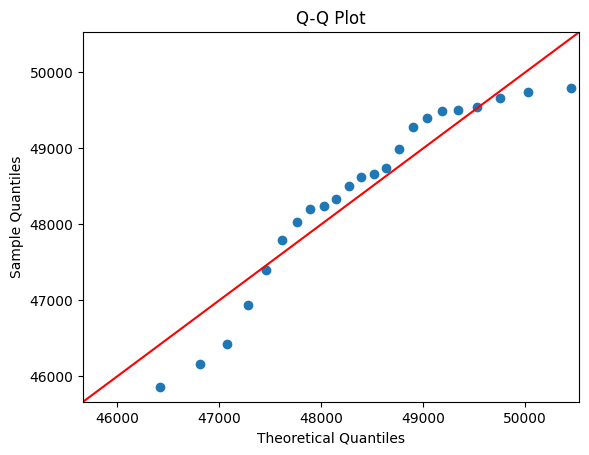

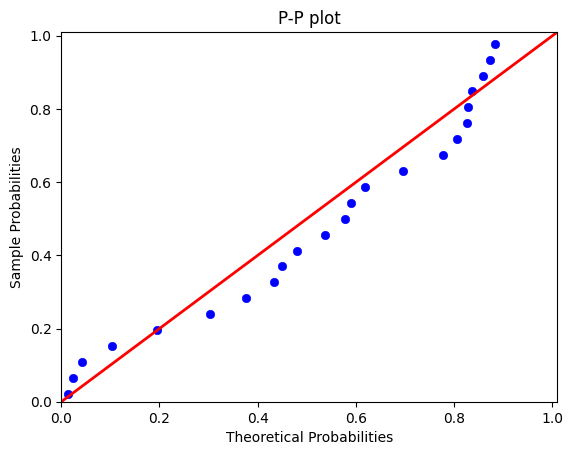



fin_servicio_armado Distr. Triang
Parámetro estimado: a = 45862.95758743
Parámetro estimado: b = 49801.91758742998
Parámetro estimado: c = 45862.95758743


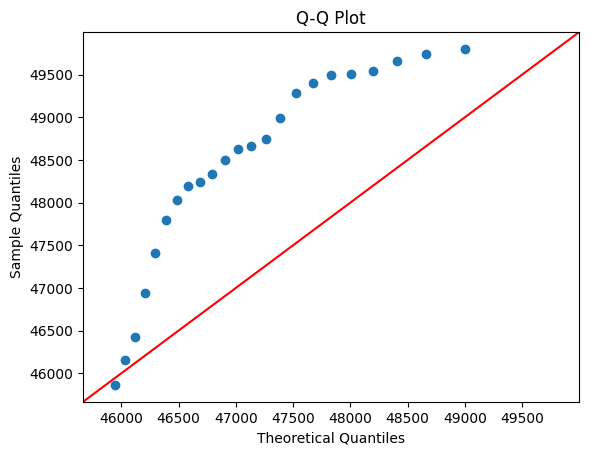

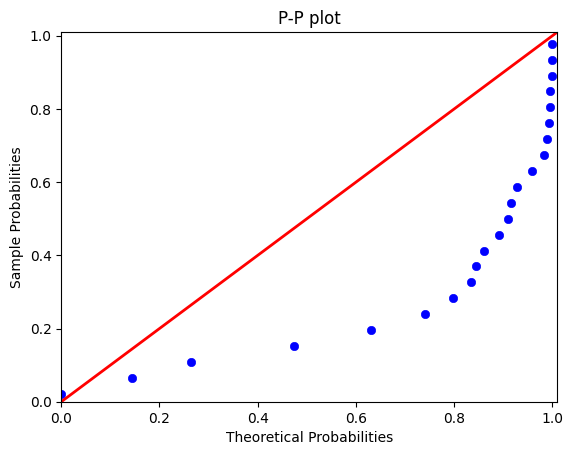

#############
#############
ts_armado Distr. Normal Truncada
Parámetro estimado: Media = 91.4127391304348
Parámetro estimado: Desviación Estándar = 68.938464472006


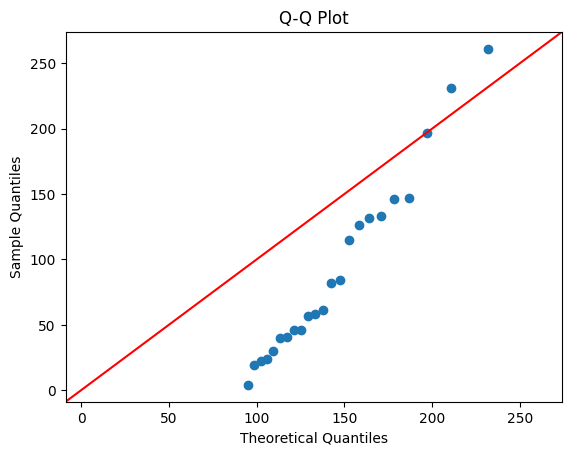

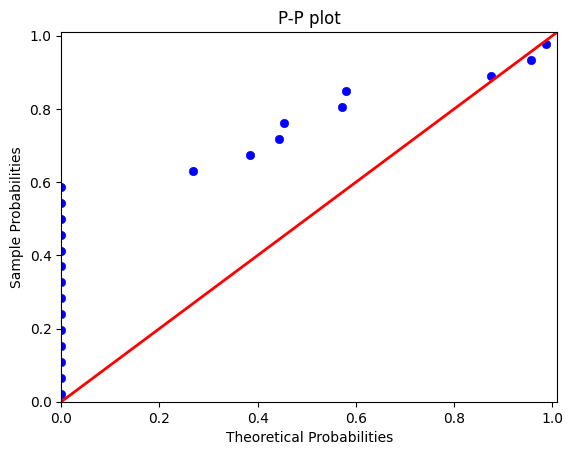



ts_armado Distr. Normal
Parámetro estimado: Media = 91.4127391304348
Parámetro estimado: Desviación Estándar = 68.938464472006


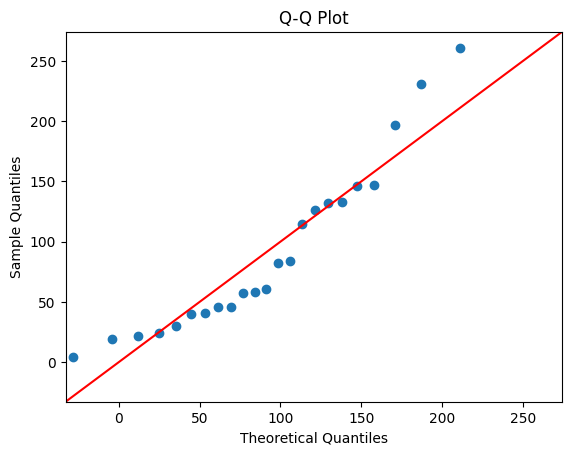

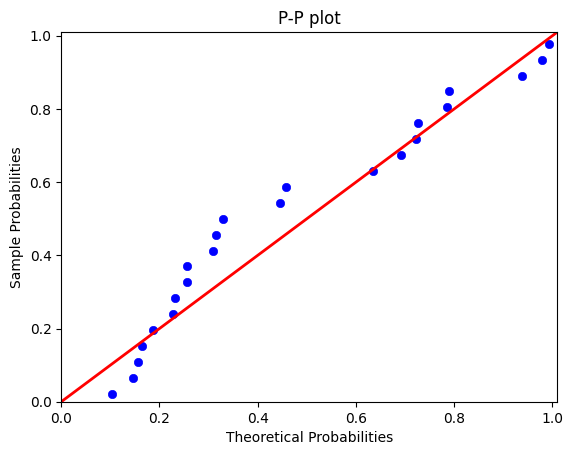



ts_armado Distr. Exponencial
Parámetro estimado: Tasa = 0.010939394328542353


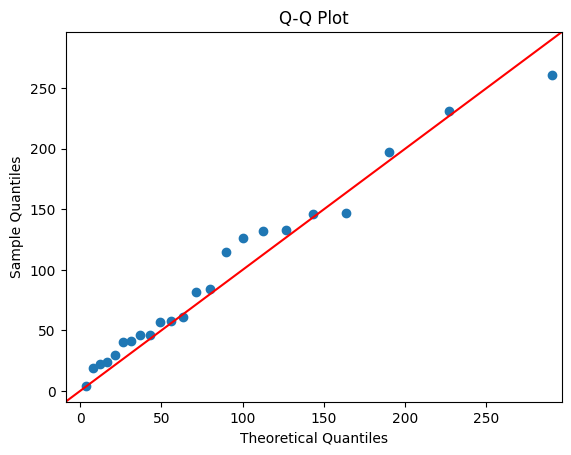

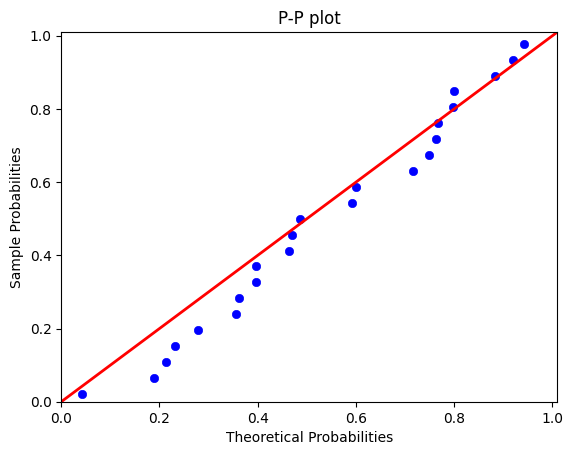



ts_armado Distr. Uniforme
Parámetro estimado: a = 4.004
Parámetro estimado: b = 261.021


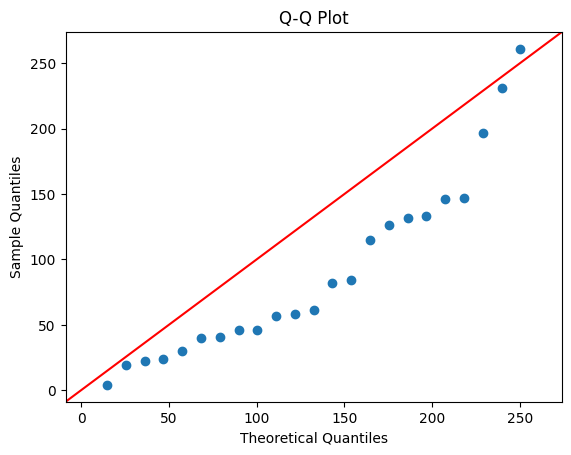

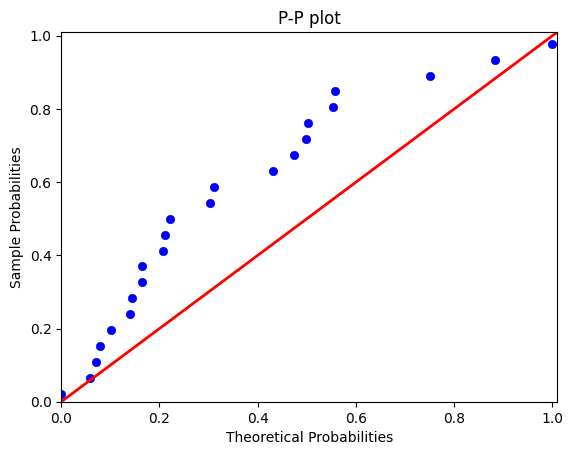



ts_armado Distr. Weibull
Parámetro estimado: Escala = 99.39548496759974
Parámetro estimado: Forma = 1.3249190267767588


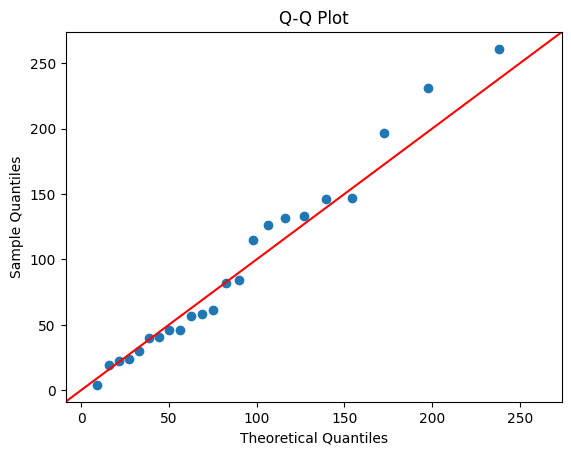

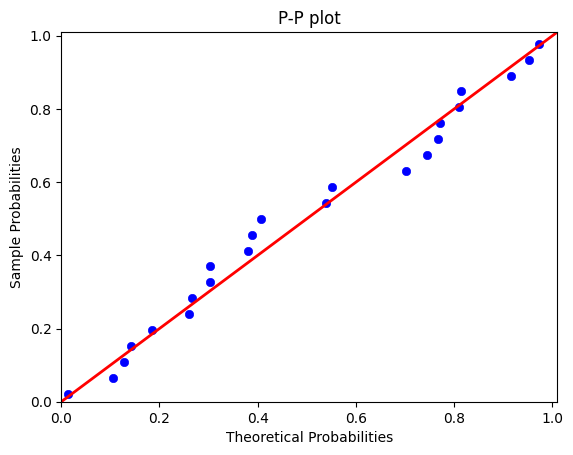



ts_armado Distr. LogNorm
Parámetro estimado (normal asociada): Media = 4.162542484781997
Parámetro estimado (normal asociada): Desviación Estándar = 0.9498591818433734


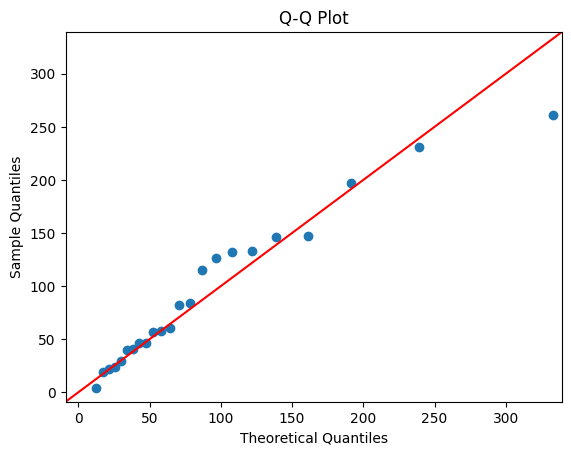

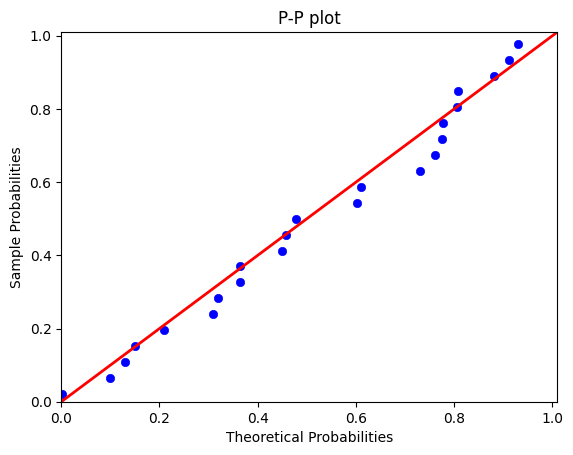



ts_armado Distr. Triang
Parámetro estimado: a = 4.004
Parámetro estimado: b = 261.021
Parámetro estimado: c = 46.046


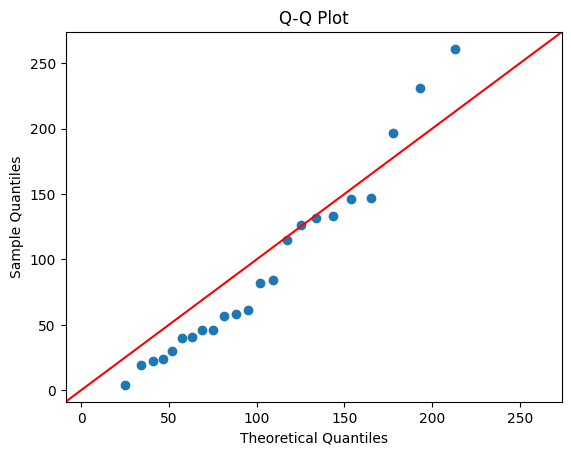

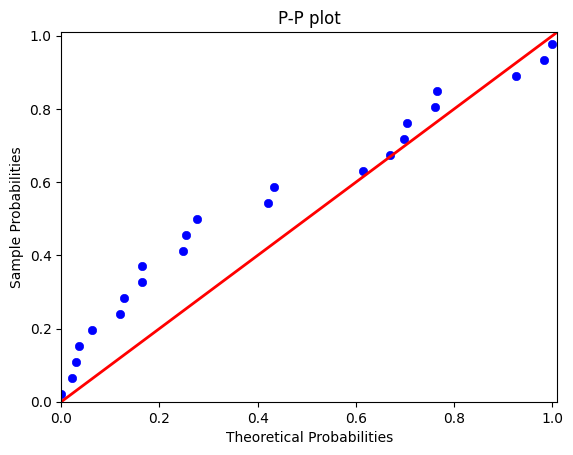

#############


In [88]:
for i in [_ for _ in df.columns.tolist() if _ != "ts_armado_seg"]:
    series = np.array(df[i]).flatten()
    series = series.astype(float)
    print("#############")
    print(f"{i} Distr. Normal Truncada")
    PP_QQ_plot_truncated_normal(series,media="estimado",desvesta="estimado")
    print("\n")
    print(f"{i} Distr. Normal")
    PP_QQ_plot_normal(series,media="estimado",desvesta="estimado")
    print("\n")
    print(f"{i} Distr. Exponencial")
    PP_QQ_plot_exponential(series,tasa="estimado")    
    print("\n")
    print(f"{i} Distr. Uniforme")
    PP_QQ_plot_uniform(series,minimo="estimado",maximo="estimado")
    print("\n")
    print(f"{i} Distr. Weibull")
    PP_QQ_plot_weibull(series,forma="estimado",escala="estimado")
    print("\n")
    print(f"{i} Distr. LogNorm")
    PP_QQ_plot_lognormal(series,media="estimado",desvesta="estimado")
    print("\n")
    print(f"{i} Distr. Triang")
    PP_QQ_plot_triangular(series,minimo="estimado",maximo="estimado",moda="estimado")
    print("#############")

In [89]:
for i in df.columns.tolist():
    series = np.array(df[i]).flatten()
    series = series.astype(float)
    data = series
    print("#############")
    print(f"{i} Distr. Normal Truncada")
    truncated_chi_square_normal_goodness_of_fit(data,media="estimado",desvesta="estimado",r=2)
    print("\n")

    print(f"{i} Distr. Normal")
    chi_square_normal_goodness_of_fit(data,media="estimado",desvesta="estimado",r=2)
    print("\n")

    print(f"{i} Distr. Exponencial")
    chi_square_exponential_goodness_of_fit(data,tasa="estimado",r=1)

    print("\n")
    print(f"{i} Distr. Uniforme")
    chi_square_uniform_goodness_of_fit(data,minimo="estimado",maximo="estimado",r=2)

    print("\n")
    print(f"{i} Distr. Weibull")
    chi_square_weibull_goodness_of_fit(data,forma="estimado",escala="estimado",r=2)
    print("\n")

    print(f"{i} Distr. LogNorm")
    chi_square_lognormal_goodness_of_fit(data,media="estimado",desvesta="estimado",r=2)
    print("\n")
    print(f"{i} Distr. Triang")
    chi_square_triangular_goodness_of_fit(data,minimo="estimado",maximo="estimado",moda="estimado",r=3)
    print("#############")

#############
llegada_fila Distr. Normal Truncada
Parámetro estimado: Media = 46029.10566397172
Parámetro estimado: Desviación Estándar = 267.3163111708847
Chi-squared statistic: 10.989130434782469
p-value: 0.0009164780078819712
 No sigue la distribución


llegada_fila Distr. Normal
Parámetro estimado: Media = 46029.10566397172
Parámetro estimado: Desviación Estándar = 267.3163111708847
Chi-squared statistic: 0.2065217391304865
p-value: 0.6495073971170005
 Sigue la distribucion


llegada_fila Distr. Exponencial
Parámetro estimado: Tasa = 2.1725384092846456e-05
Chi-squared statistic: 63.25
p-value: 1.84297022087776e-14
 No sigue la distribucion


llegada_fila Distr. Uniforme
Parámetro estimado: a = 45586.0
Parámetro estimado: b = 46547.00242219998
Chi-squared statistic: 0.9021739130435596
p-value: 0.3421994732317317
 Sigue la distribucion


llegada_fila Distr. Weibull
Parámetro estimado: Escala = 46159.720454744536
Parámetro estimado: Forma = 190.32967385430877
Chi-squared statistic: 0.

c:\Users\user\Desktop\Andes\9\Simu\simu\Proyecto\funcioneschicuadrado_continuas.py:164: RuntimeWarning: divide by zero encountered in log
  mean = np.mean(np.log(data))
c:\Users\user\Desktop\Andes\9\Simu\simu\Proyecto\funcioneschicuadrado_continuas.py:170: RuntimeWarning: divide by zero encountered in log
  std_dev = np.std(np.log(data))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


Chi-squared statistic: 0.1089982373877943
p-value: 0.7412875231063477
 Sigue la distribucion


inicio_servicio_armado Distr. LogNorm
Parámetro estimado (lognormal asociada): Media = 10.78520584026152
Parámetro estimado (lognormal asociada): Desviación Estándar = 0.02505030824556949
Chi-squared statistic: 1.173913043478223
p-value: 0.27859867183797027
 Sigue la distribucion


inicio_servicio_armado Distr. Triang
Parámetro estimado: a = 45729.94458743
Parámetro estimado: b = 49772.07058742997
Parámetro estimado: c = 45729.94458743
Chi-squared statistic: 50.33498964803324
p-value: nan
 No sigue la distribucion
#############
#############
fin_servicio_armado Distr. Normal Truncada
Parámetro estimado: Media = 48407.388804821305
Parámetro estimado: Desviación Estándar = 1152.6383238686233
Chi-squared statistic: 15.771739130434854
p-value: 7.146202404106905e-05
 No sigue la distribución


fin_servicio_armado Distr. Normal
Parámetro estimado: Media = 48407.388804821305
Parámetro estimado: Desv

## Pruebas de Bondad de Ajuste Pola

In [90]:
datosPola = pd.read_excel('datosPolaSimulados.xlsx')

In [91]:
datosPola

llegada_fila    TEA_caja  inicio_servicio_caja  fin_servicio_caja  \
0   45413.000000    0.000000          45459.000000       45521.275216   
1   45449.844857   36.844857          45583.550432       45645.825649   
2   45592.163844  142.318987          45708.100865       45770.376081   
3   45785.381599  193.217755          45832.651297       45894.926514   
4   45832.163448   46.781849          45957.201730       46019.476946   
5   45937.873263  105.709815          46081.752162       46144.027379   
6   45938.758527    0.885263          46206.302595       46268.577811   
7   46009.939097   71.180570          46330.853027       46393.128243   
8   46151.222547  141.283450          46455.403460       46517.678676   
9   46216.576814   65.354267          46579.953892       46642.229108   
10  46283.558413   66.981599          46704.504325       46766.779541   
11  46531.982570  248.424157          46829.054757       46891.329973   
12  46604.434238   72.451669          46953.605190       47015.880406   
13  46708.196858  103.762620          47078.155622       47140.430838   
14  46735.476448   27.279590          47202.706054       47264.981271   
15  46815.397070   79.920622          47327.256487       47389.531703   
16  46817.051302    1.654232          47451.806919       47514.082136   
17  46928.035780  110.984478          47576.357352       47638.632568   
18  46970.956370   42.920590          47700.907784       47763.183001   
19  47082.976189  112.019819          47825.458217       47887.733433   

    ts_caja_seg  inicio_servicio_armado  fin_servicio_armado  ts_armado  
0     19.897223            45586.275216         45679.665216      93.39  
1     11.470006            45680.475216         45681.285216       0.81  
2     54.989552            45851.355216         46021.425216     170.07  
3     60.995915            46186.525216         46351.625216     165.10  
4     69.675178            46453.915216         46556.205216     102.29  
5     12.617769            46640.405216         46724.605216      84.20  
6     12.972218            46794.125216         46863.645216      69.52  
7     49.019509            46949.545216         47035.445216      85.90  
8     16.710779            47214.995216         47394.545216     179.55  
9     72.707580            47467.365216         47540.185216      72.82  
10    34.950763            47657.385216         47774.585216     117.20  
11    31.522061            47852.005216         47929.425216      77.42  
12    38.229910            48015.755216         48102.085216      86.33  
13    31.819297            48229.965216         48357.845216     127.88  
14    11.060065            48483.845216         48609.845216     126.00  
15    61.986218            48760.655216         48911.465216     150.81  
16    52.674473            49163.765216         49416.065216     252.30  
17    70.421576            49675.505216         49934.945216     259.44  
18    34.742076            50187.135216         50439.325216     252.19  
19    62.275216            50549.805216         50660.285216     110.48

#############
llegada_fila Distr. Normal Truncada
Parámetro estimado: Media = 46290.249461745
Parámetro estimado: Desviación Estándar = 517.7304935771707


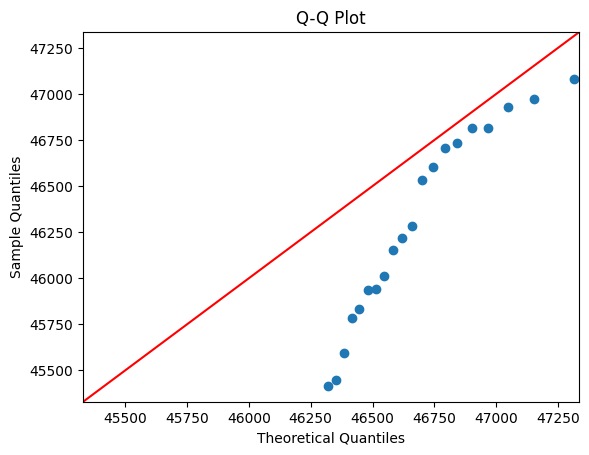

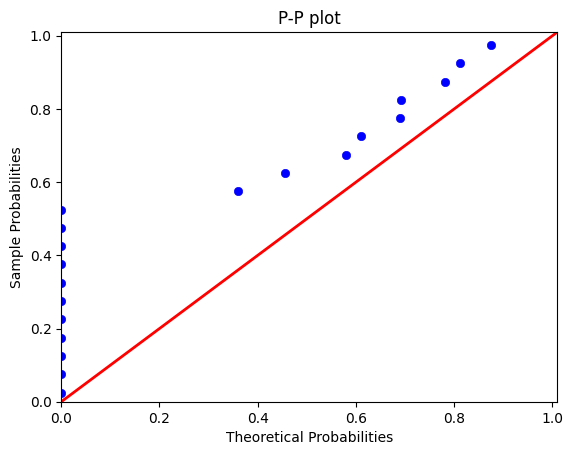



llegada_fila Distr. Normal
Parámetro estimado: Media = 46290.249461745
Parámetro estimado: Desviación Estándar = 517.7304935771707


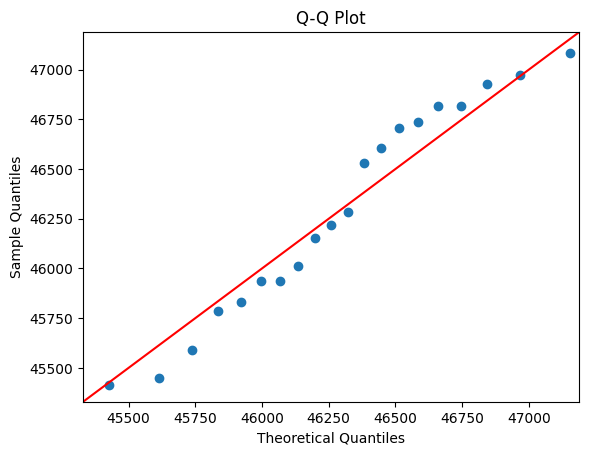

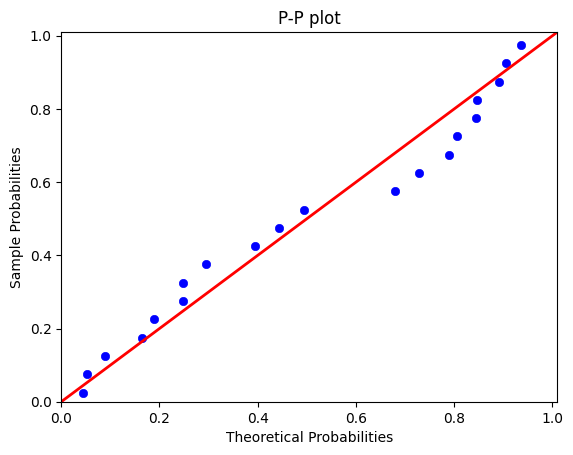



llegada_fila Distr. Exponencial
Parámetro estimado: Tasa = 2.160282157965936e-05


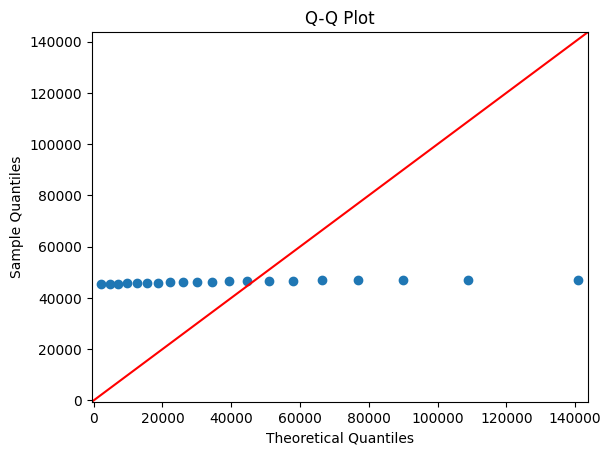

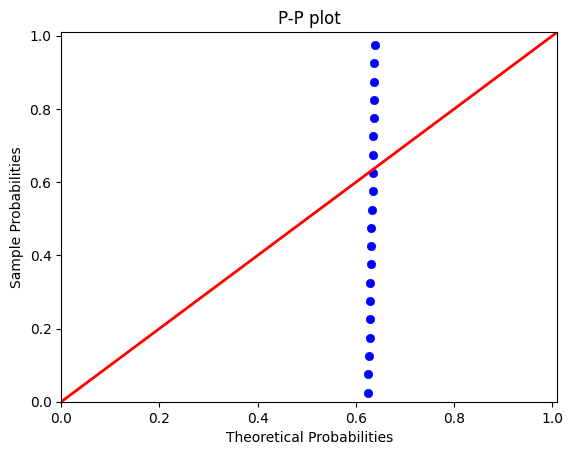



llegada_fila Distr. Uniforme
Parámetro estimado: a = 45413.0
Parámetro estimado: b = 47082.97618881999


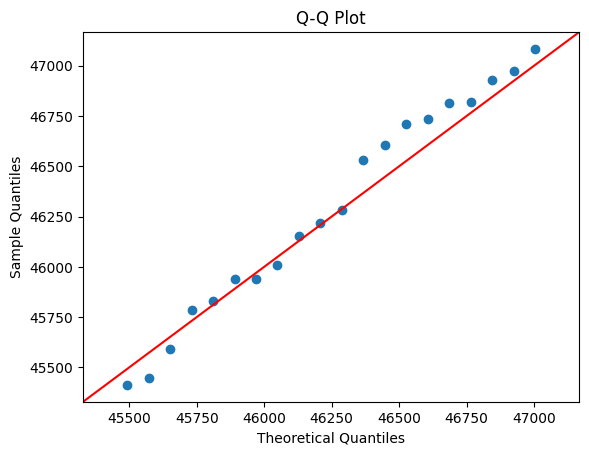

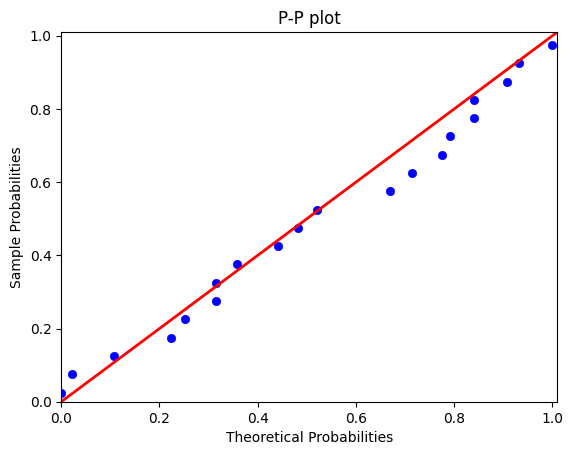



llegada_fila Distr. Weibull
Parámetro estimado: Escala = 46541.886249580566
Parámetro estimado: Forma = 103.66557574632512


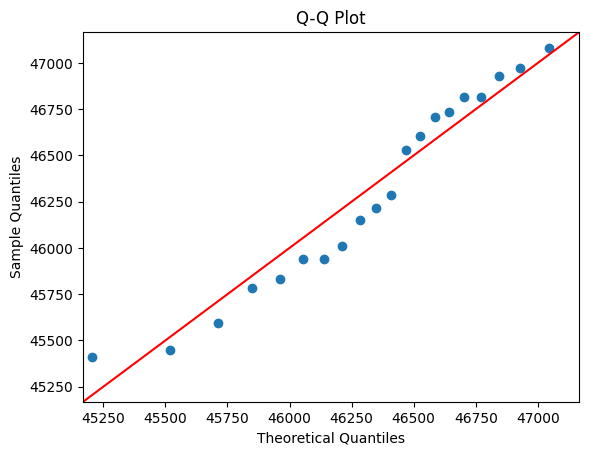

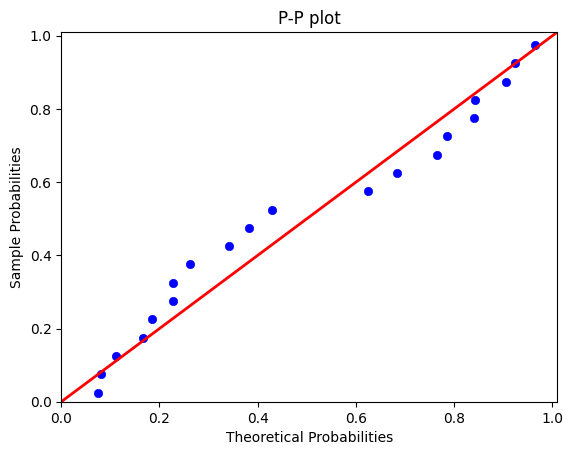



llegada_fila Distr. LogNorm
Parámetro estimado (normal asociada): Media = 10.74262400738351
Parámetro estimado (normal asociada): Desviación Estándar = 0.011193836623196765


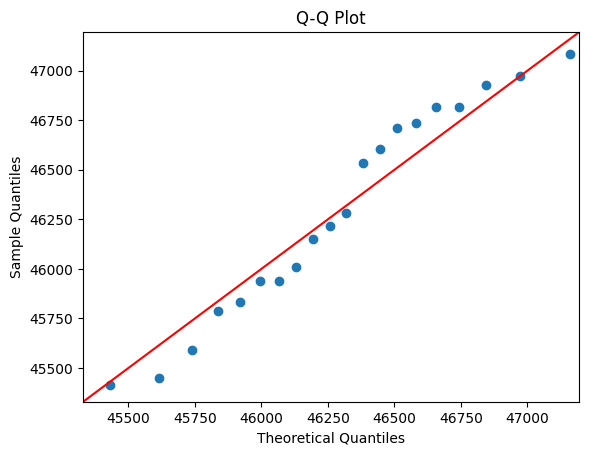

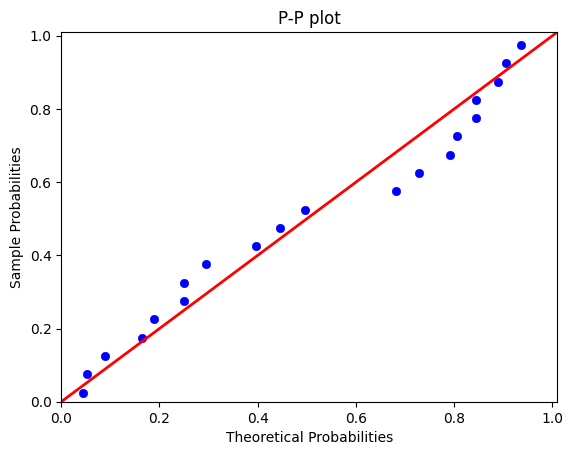



llegada_fila Distr. Triang
Parámetro estimado: a = 45413.0
Parámetro estimado: b = 47082.97618881999
Parámetro estimado: c = 45413.0


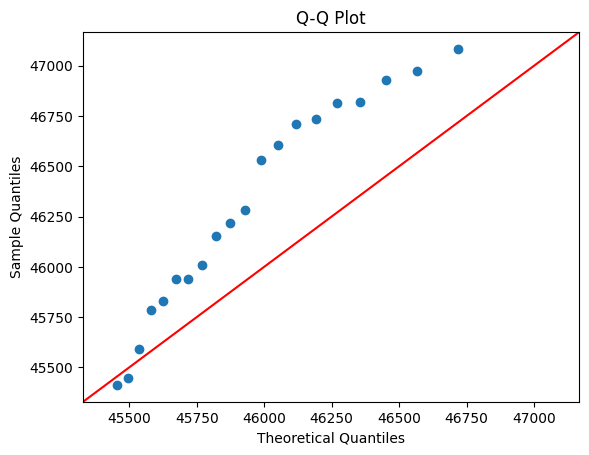

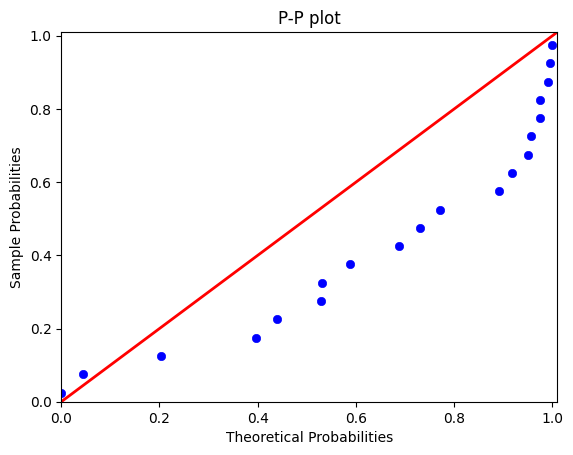

#############
#############
TEA_caja Distr. Normal Truncada
Parámetro estimado: Media = 83.498809441
Parámetro estimado: Desviación Estándar = 62.540580246224515


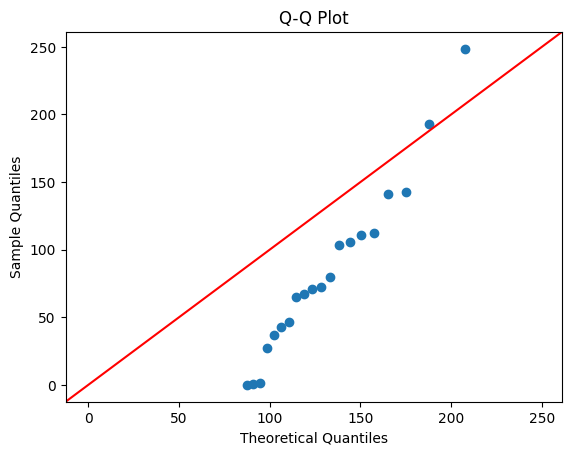

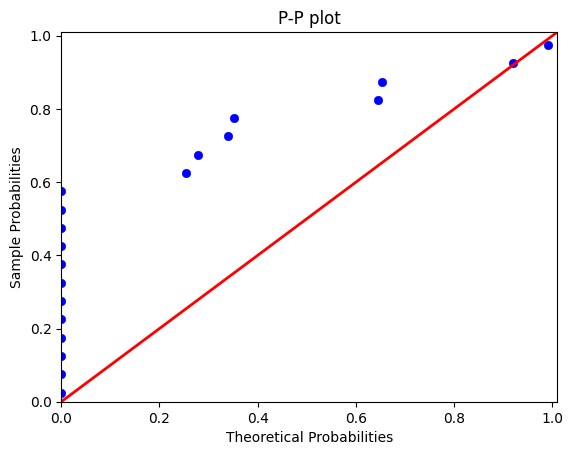



TEA_caja Distr. Normal
Parámetro estimado: Media = 83.498809441
Parámetro estimado: Desviación Estándar = 62.540580246224515


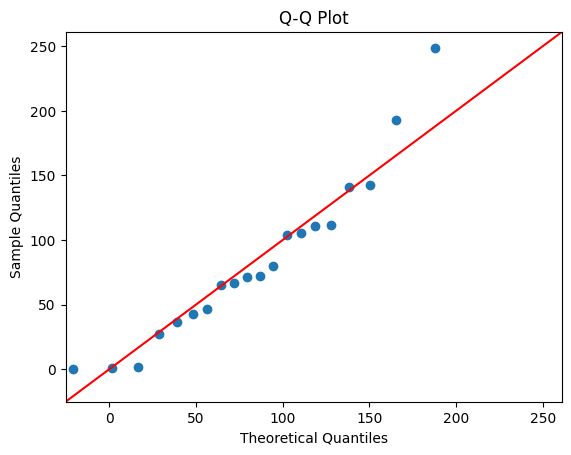

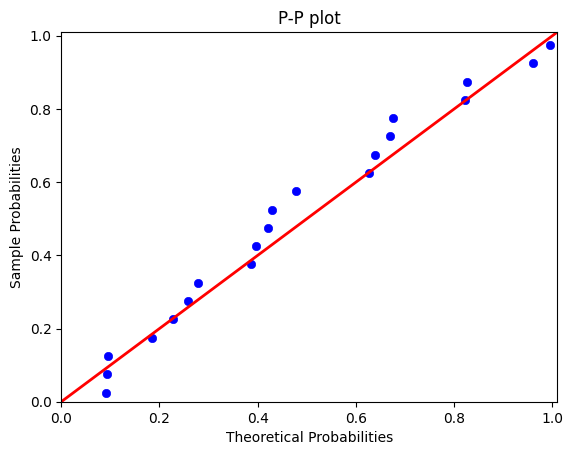



TEA_caja Distr. Exponencial
Parámetro estimado: Tasa = 0.011976218663412162


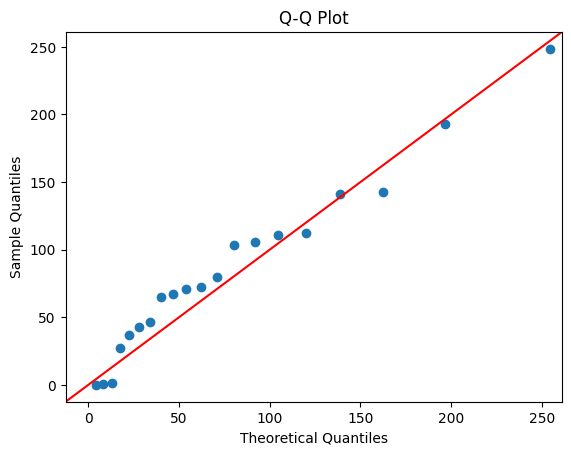

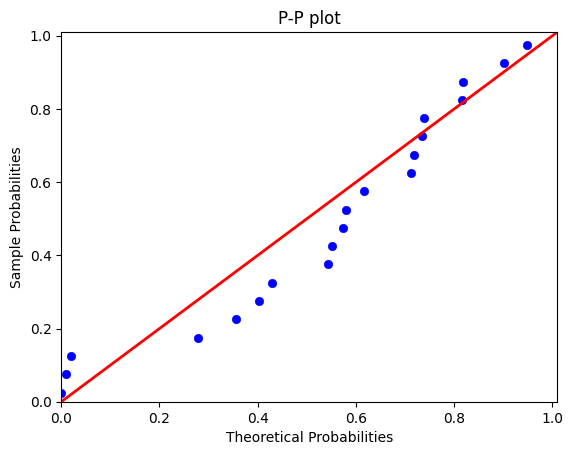



TEA_caja Distr. Uniforme
Parámetro estimado: a = 0.0
Parámetro estimado: b = 248.42415663


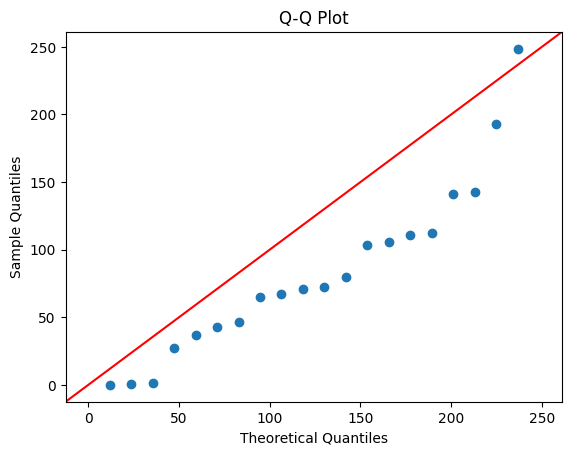

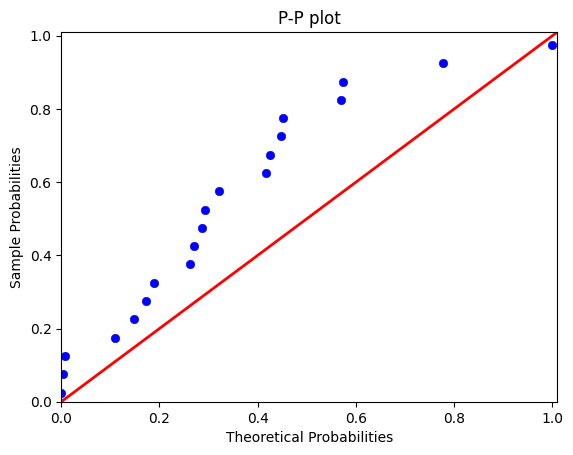



TEA_caja Distr. Weibull
Parámetro estimado: Escala = 89.17052499054026
Parámetro estimado: Forma = 1.2088687806043323


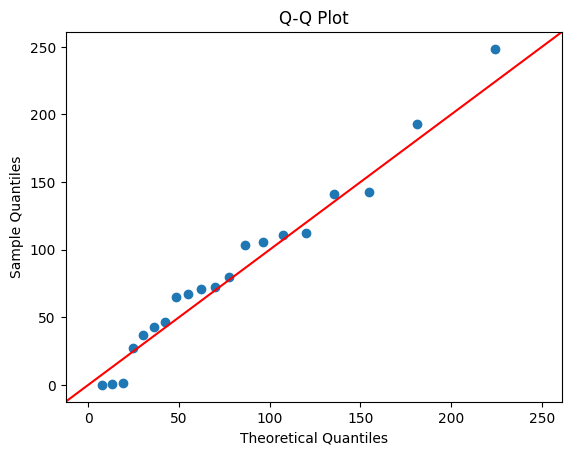

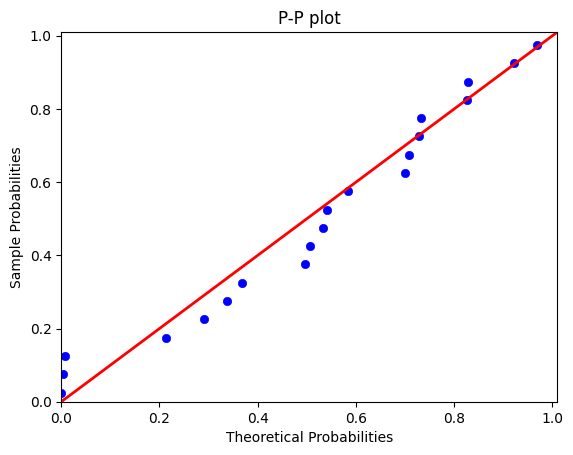



TEA_caja Distr. LogNorm
Parámetro estimado (normal asociada): Media = -inf
Parámetro estimado (normal asociada): Desviación Estándar = nan


c:\Users\user\Desktop\Andes\9\Simu\simu\Proyecto\funciones_qq_pp_plot.py:97: RuntimeWarning: divide by zero encountered in log
  mean = np.mean(np.log(data))
c:\Users\user\Desktop\Andes\9\Simu\simu\Proyecto\funciones_qq_pp_plot.py:103: RuntimeWarning: divide by zero encountered in log
  std_dev = np.std(np.log(data))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


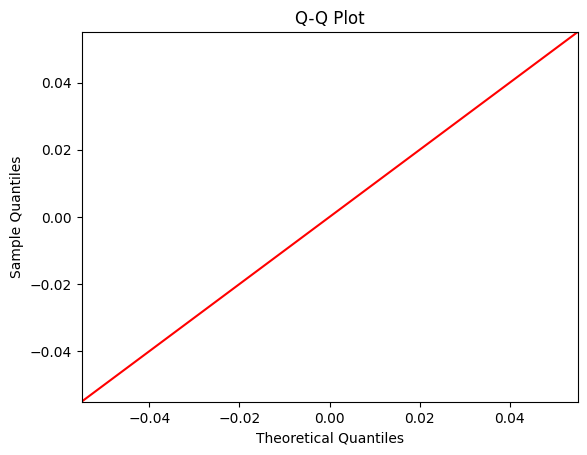

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2066: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2066: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


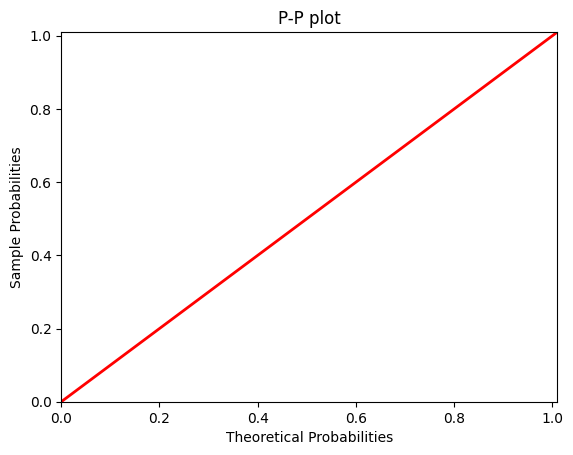



TEA_caja Distr. Triang
Parámetro estimado: a = 0.0
Parámetro estimado: b = 248.42415663
Parámetro estimado: c = 0.0


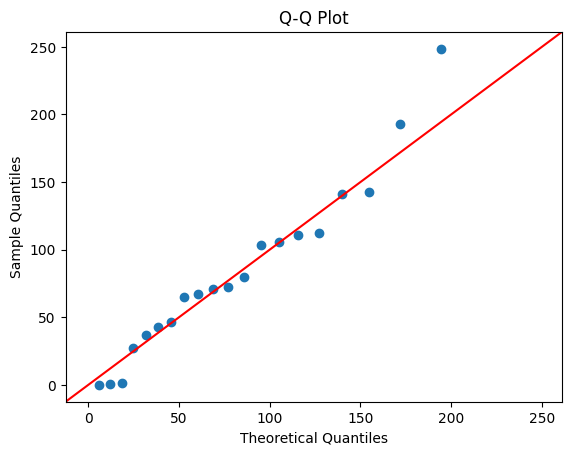

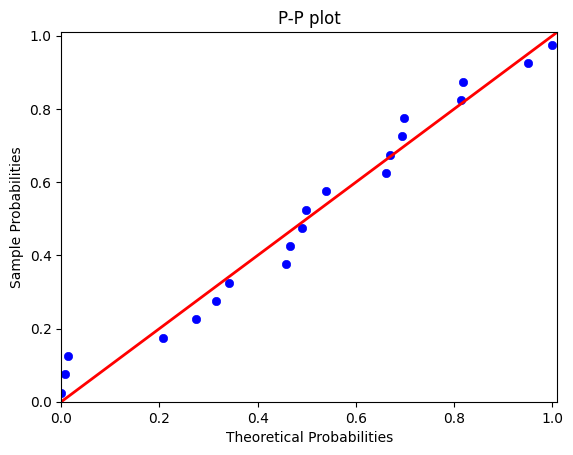

#############
#############
inicio_servicio_caja Distr. Normal Truncada
Parámetro estimado: Media = 46642.22910837004
Parámetro estimado: Desviación Estándar = 718.1928292691592


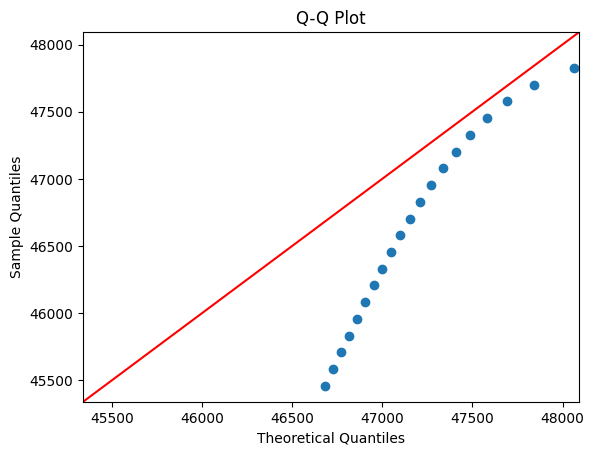

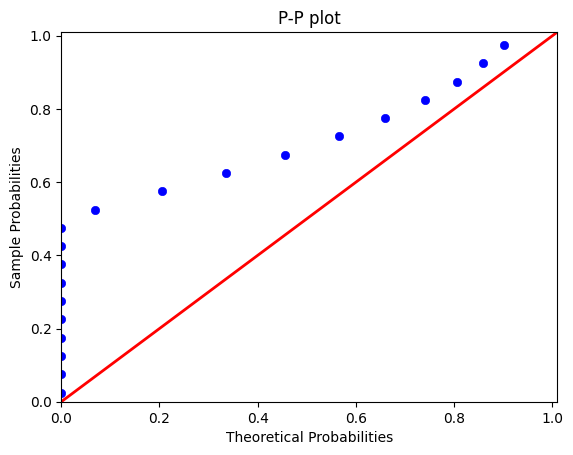



inicio_servicio_caja Distr. Normal
Parámetro estimado: Media = 46642.22910837004
Parámetro estimado: Desviación Estándar = 718.1928292691592


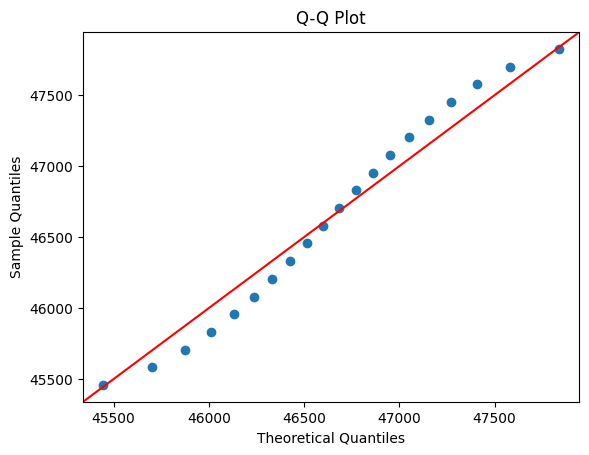

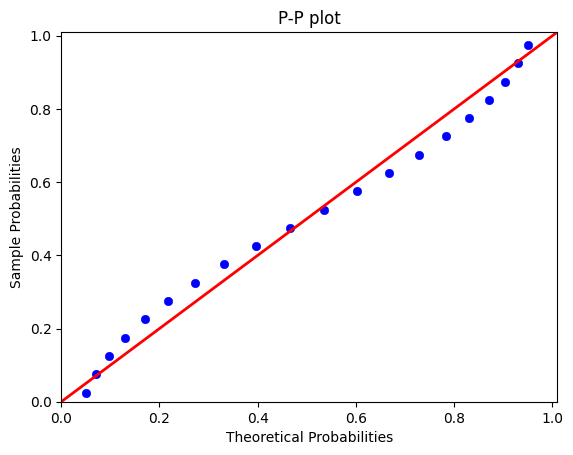



inicio_servicio_caja Distr. Exponencial
Parámetro estimado: Tasa = 2.1439798635621986e-05


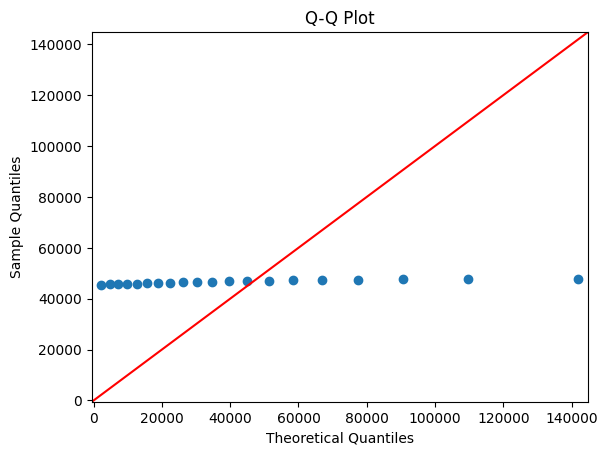

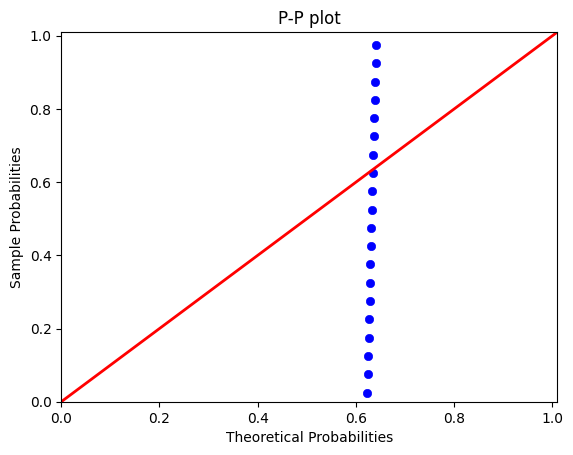



inicio_servicio_caja Distr. Uniforme
Parámetro estimado: a = 45459.0
Parámetro estimado: b = 47825.45821674008


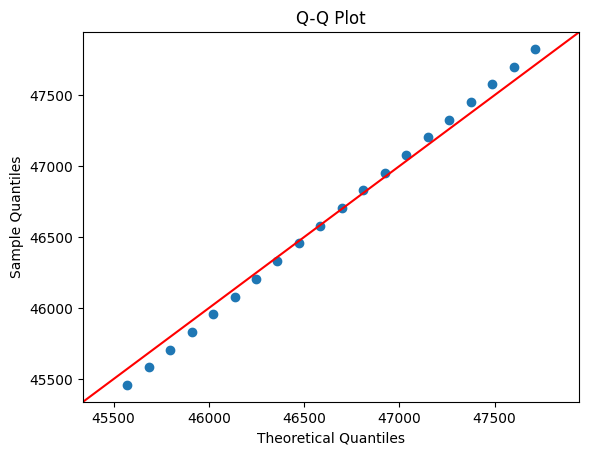

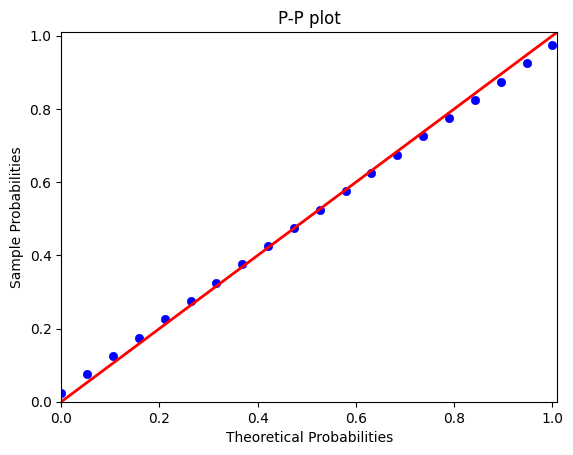



inicio_servicio_caja Distr. Weibull
Parámetro estimado: Escala = 46994.810512261996
Parámetro estimado: Forma = 72.16527636367132


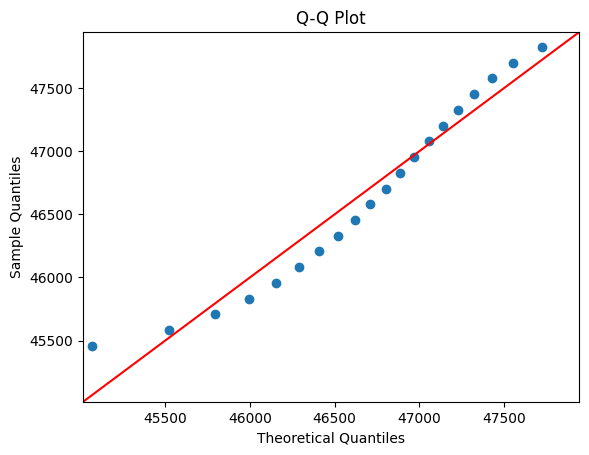

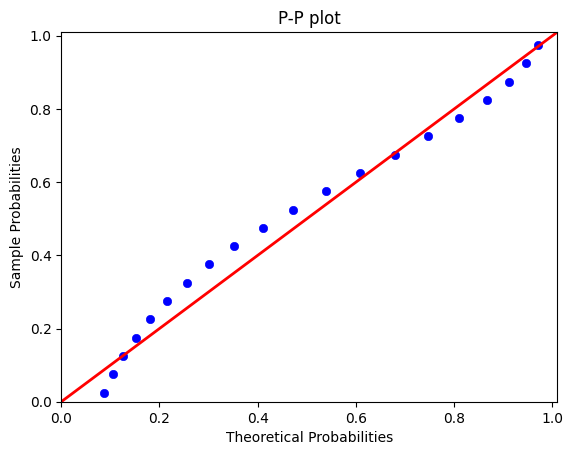



inicio_servicio_caja Distr. LogNorm
Parámetro estimado (normal asociada): Media = 10.75014304076996
Parámetro estimado (normal asociada): Desviación Estándar = 0.01540045597385849


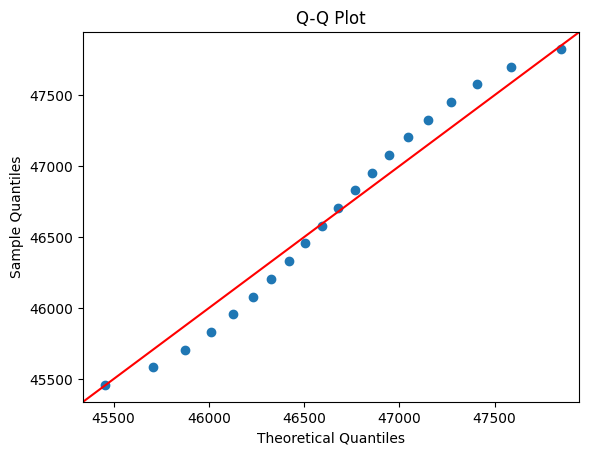

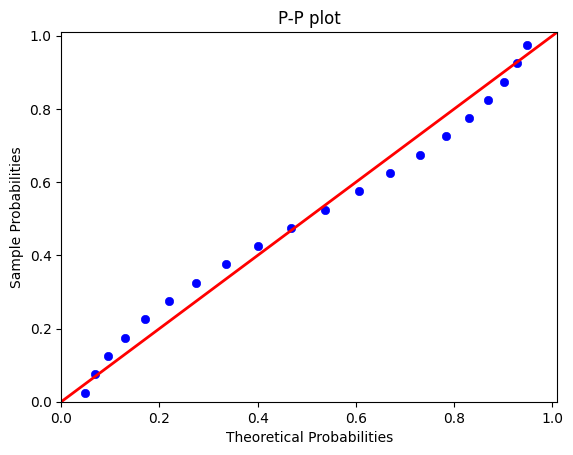



inicio_servicio_caja Distr. Triang
Parámetro estimado: a = 45459.0
Parámetro estimado: b = 47825.45821674008
Parámetro estimado: c = 45459.0


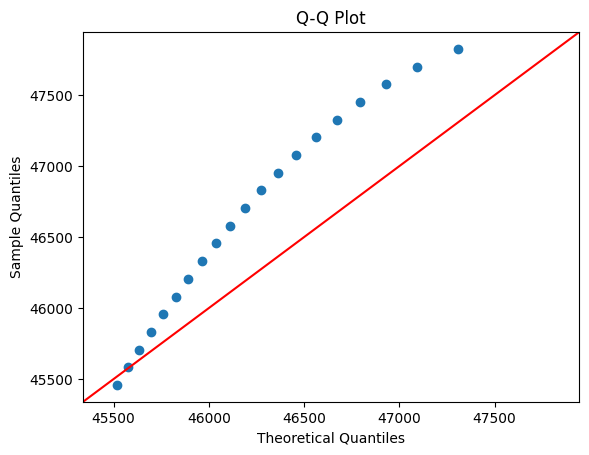

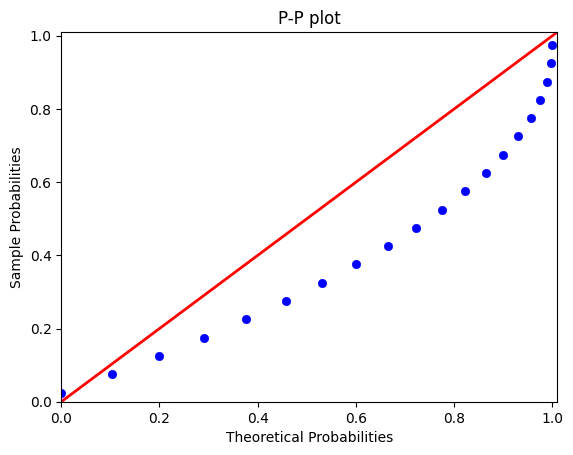

#############
#############
fin_servicio_caja Distr. Normal Truncada
Parámetro estimado: Media = 46704.50432460004
Parámetro estimado: Desviación Estándar = 718.1928292691576


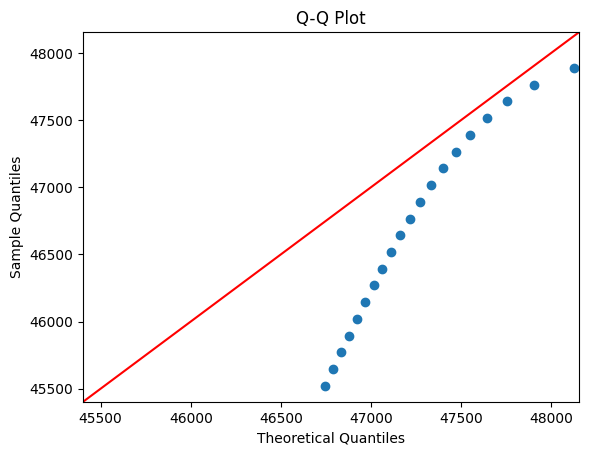

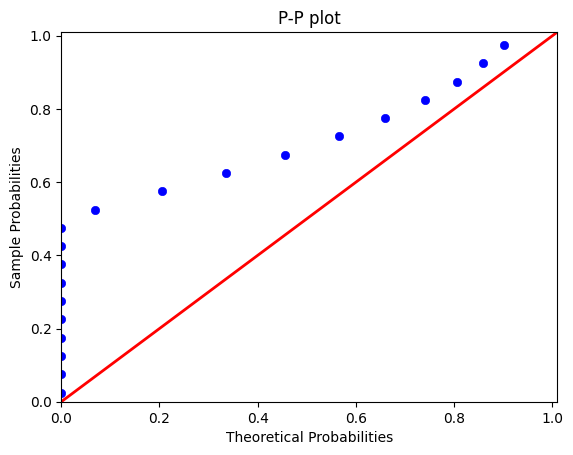



fin_servicio_caja Distr. Normal
Parámetro estimado: Media = 46704.50432460004
Parámetro estimado: Desviación Estándar = 718.1928292691576


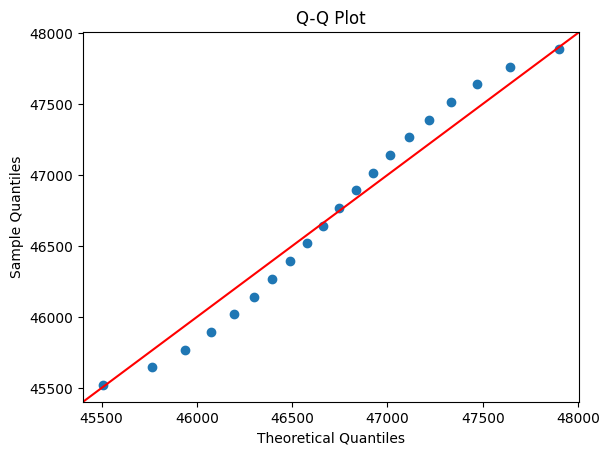

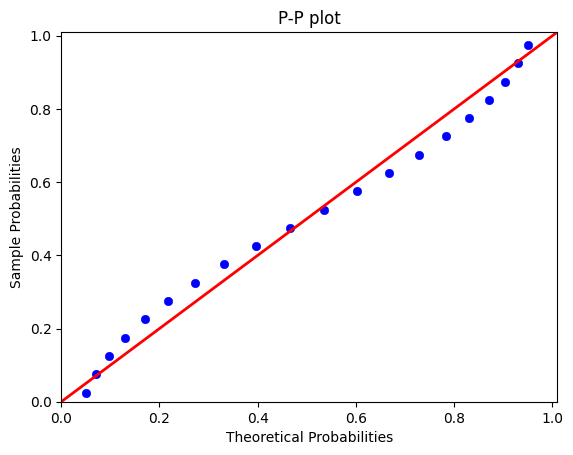



fin_servicio_caja Distr. Exponencial
Parámetro estimado: Tasa = 2.1411211069705824e-05


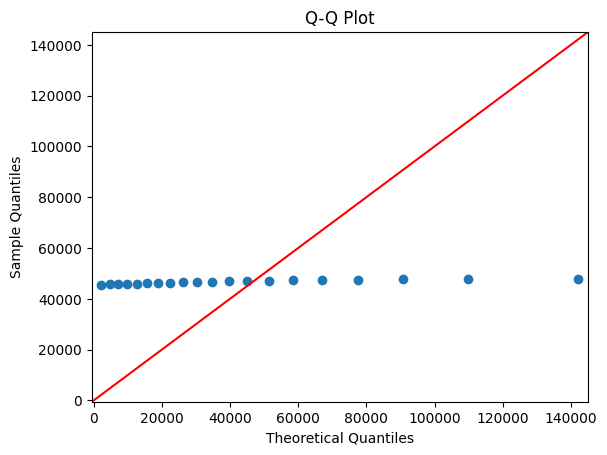

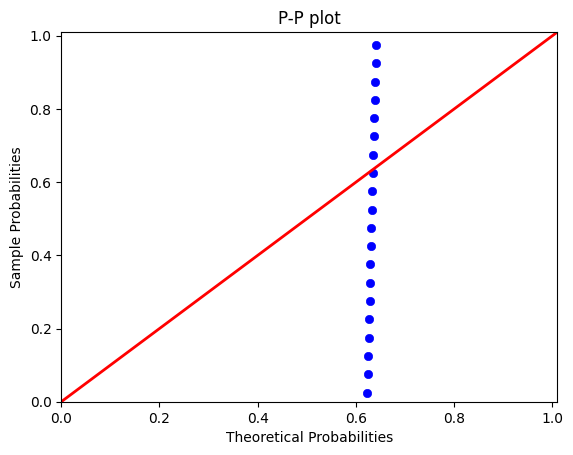



fin_servicio_caja Distr. Uniforme
Parámetro estimado: a = 45521.27521623
Parámetro estimado: b = 47887.73343297008


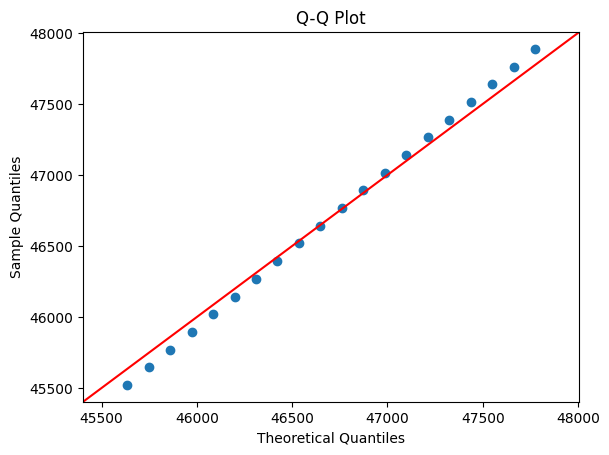

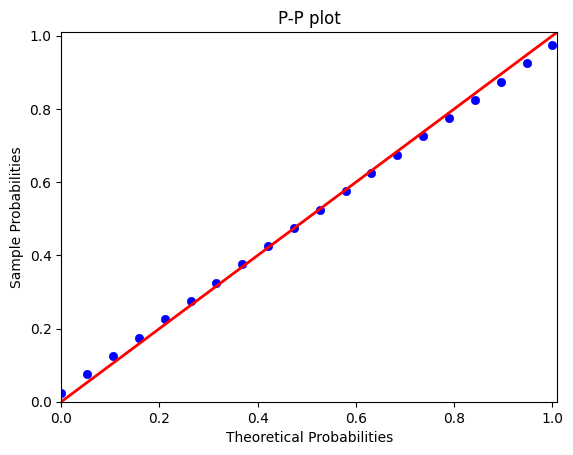



fin_servicio_caja Distr. Weibull
Parámetro estimado: Escala = 47057.09206147038
Parámetro estimado: Forma = 72.26121114906803


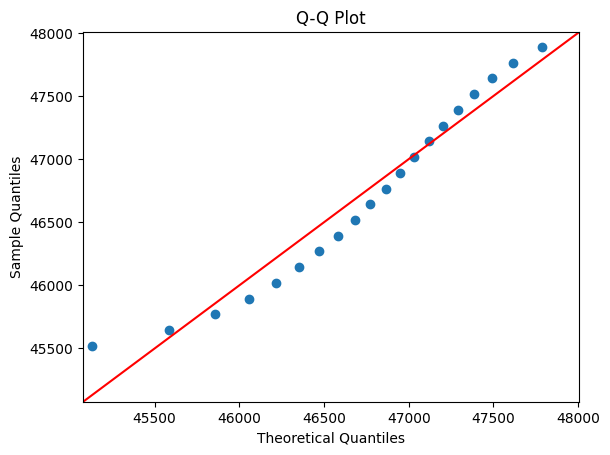

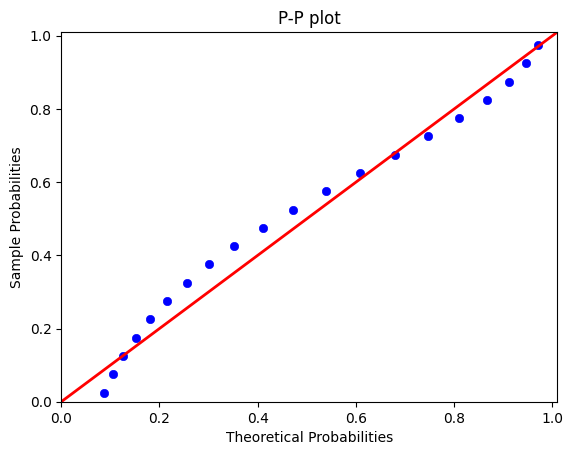



fin_servicio_caja Distr. LogNorm
Parámetro estimado (normal asociada): Media = 10.751477634385504
Parámetro estimado (normal asociada): Desviación Estándar = 0.015379914414572654


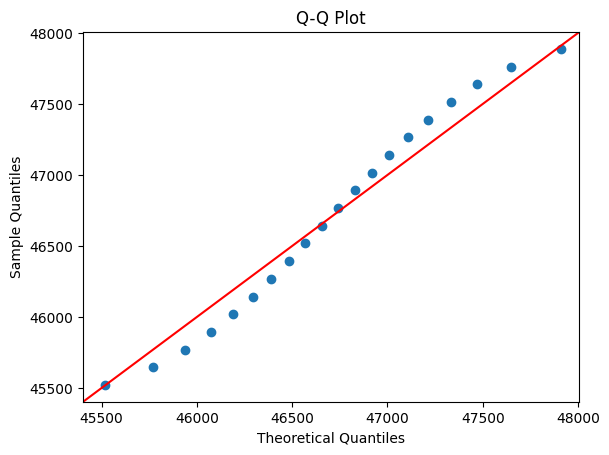

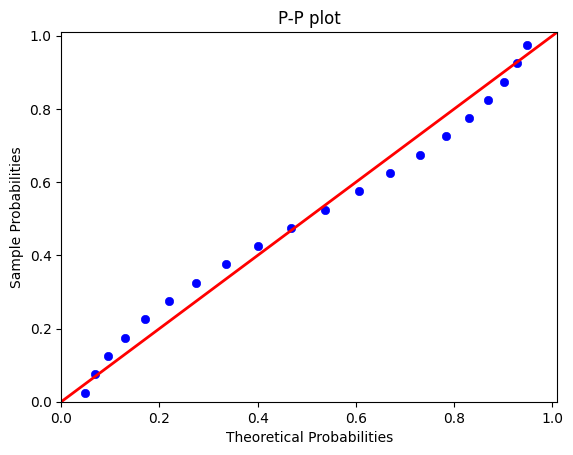



fin_servicio_caja Distr. Triang
Parámetro estimado: a = 45521.27521623
Parámetro estimado: b = 47887.73343297008
Parámetro estimado: c = 45521.27521623


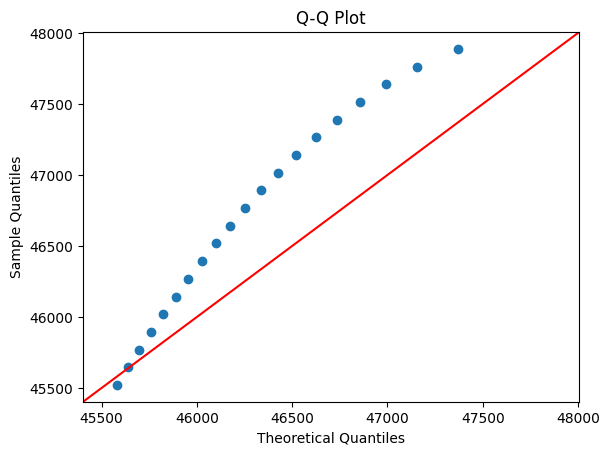

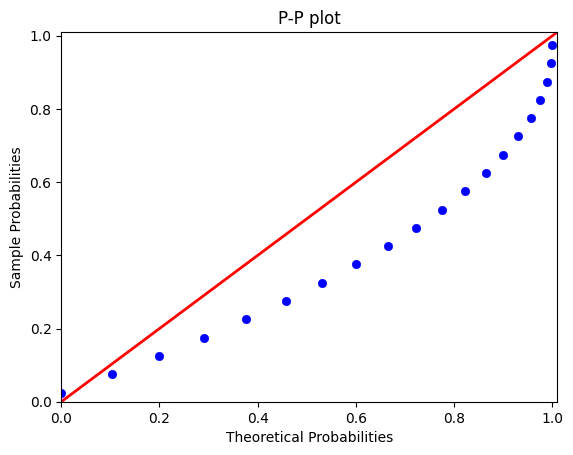

#############
#############
ts_caja_seg Distr. Normal Truncada
Parámetro estimado: Media = 40.53686912549999
Parámetro estimado: Desviación Estándar = 21.249174431115303


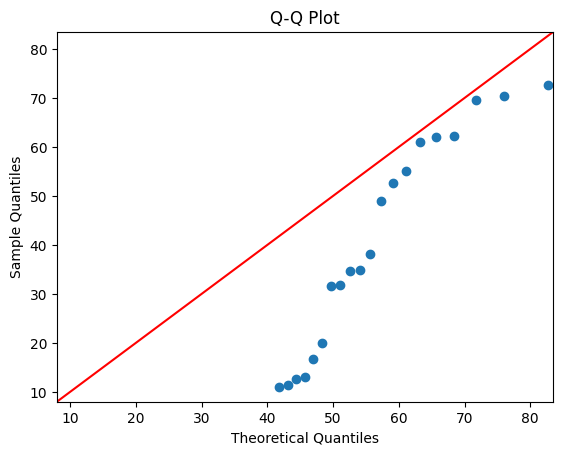

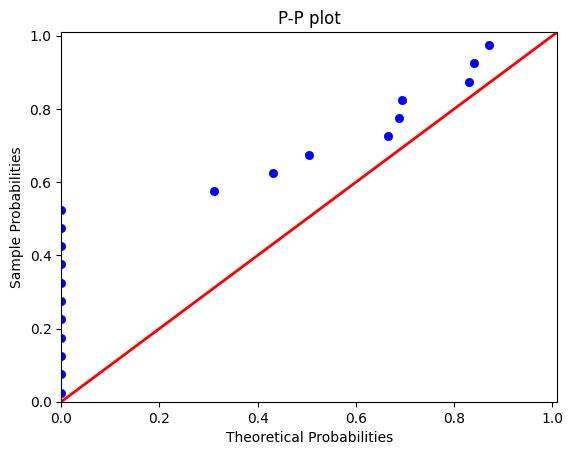



ts_caja_seg Distr. Normal
Parámetro estimado: Media = 40.53686912549999
Parámetro estimado: Desviación Estándar = 21.249174431115303


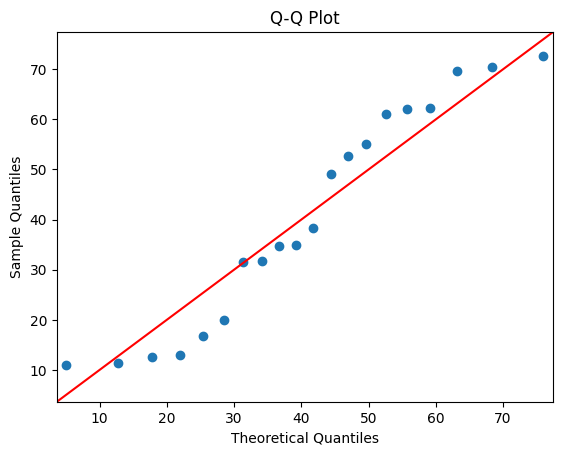

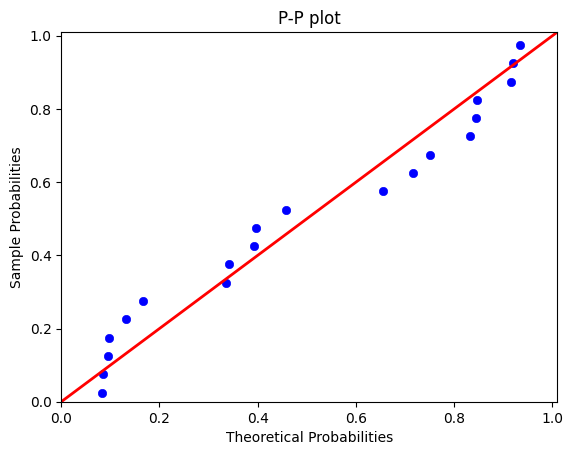



ts_caja_seg Distr. Exponencial
Parámetro estimado: Tasa = 0.024668900721070815


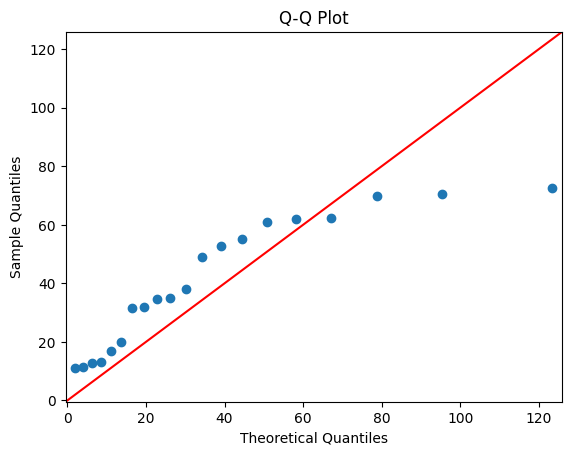

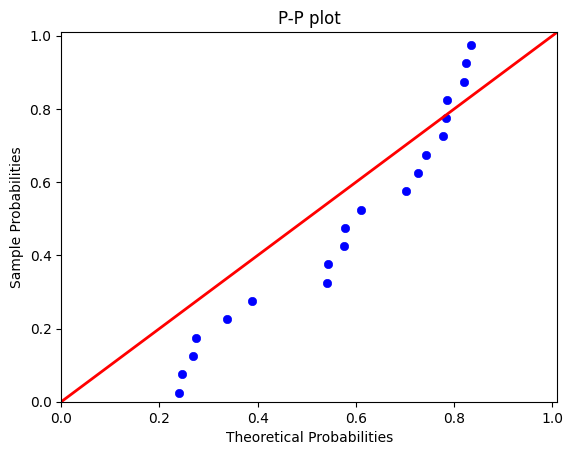



ts_caja_seg Distr. Uniforme
Parámetro estimado: a = 11.06006474
Parámetro estimado: b = 72.70757965


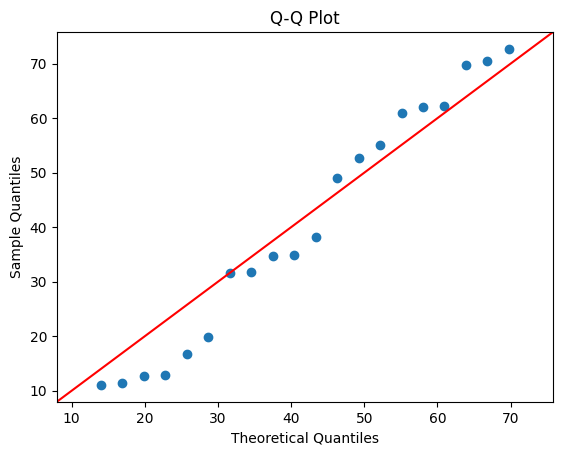

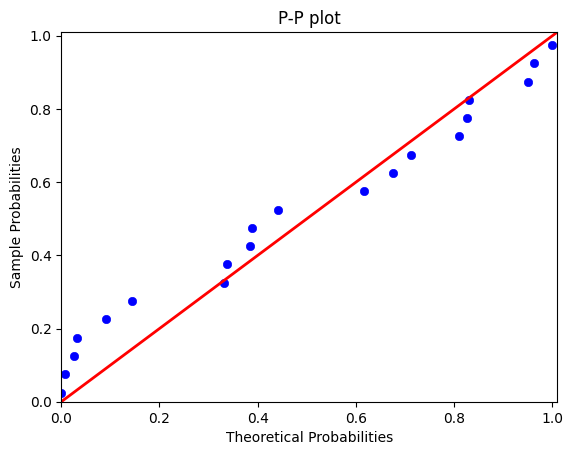



ts_caja_seg Distr. Weibull
Parámetro estimado: Escala = 45.81550968807156
Parámetro estimado: Forma = 2.0105948888082694


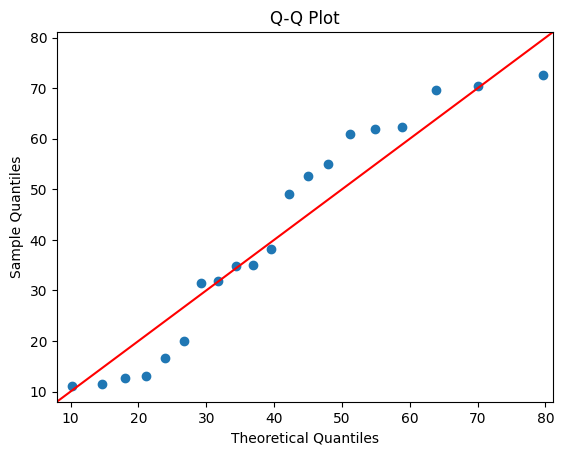

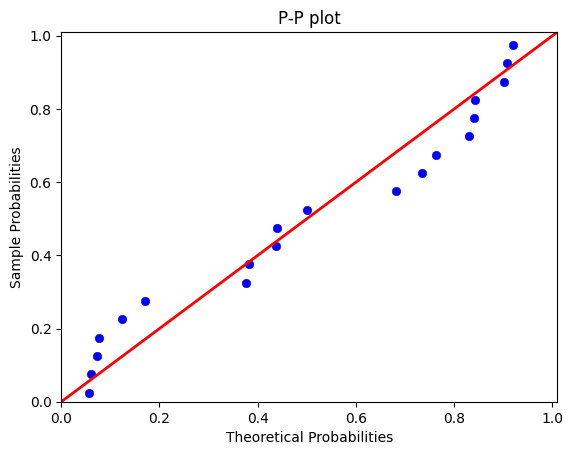



ts_caja_seg Distr. LogNorm
Parámetro estimado (normal asociada): Media = 3.5210730745691805
Parámetro estimado (normal asociada): Desviación Estándar = 0.6487269022208407


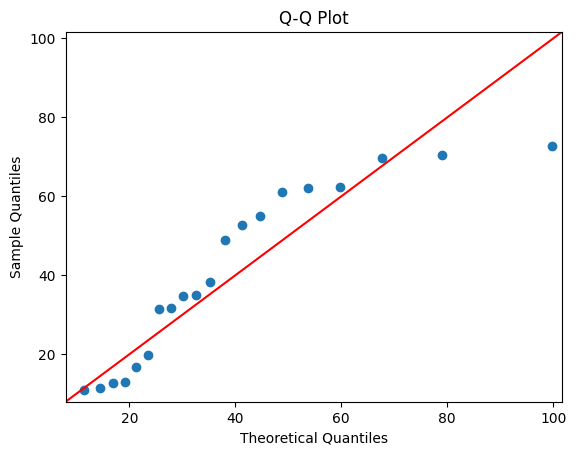

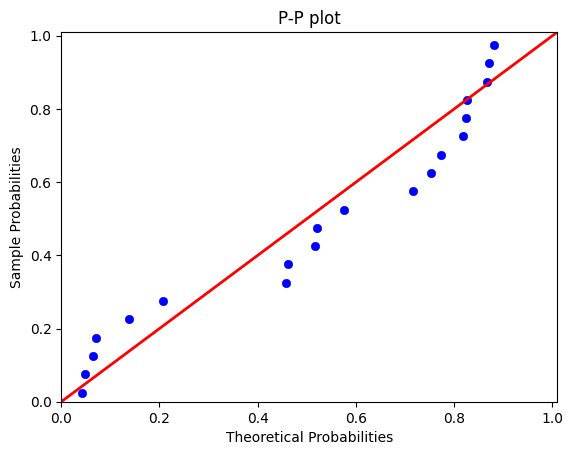



ts_caja_seg Distr. Triang
Parámetro estimado: a = 11.06006474
Parámetro estimado: b = 72.70757965
Parámetro estimado: c = 19.89722313


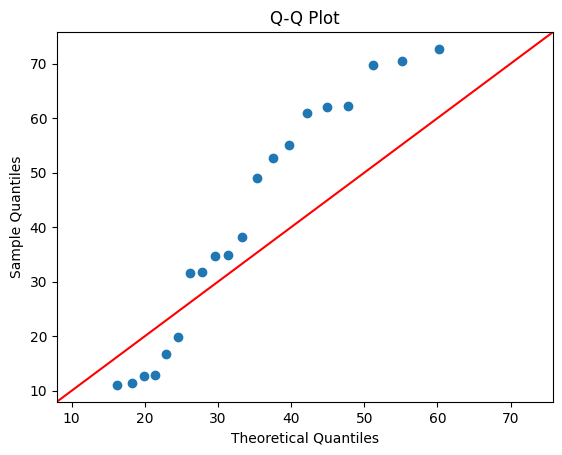

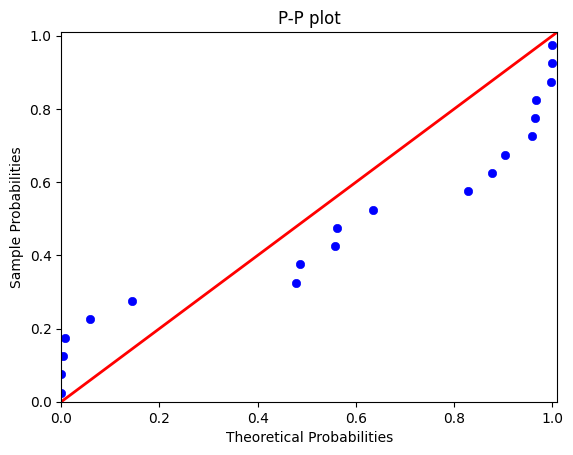

#############
#############
inicio_servicio_armado Distr. Normal Truncada
Parámetro estimado: Media = 47670.04021622998
Parámetro estimado: Desviación Estándar = 1433.2203722229835


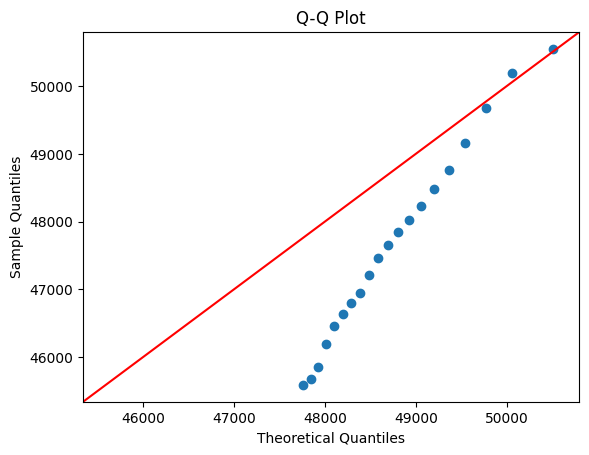

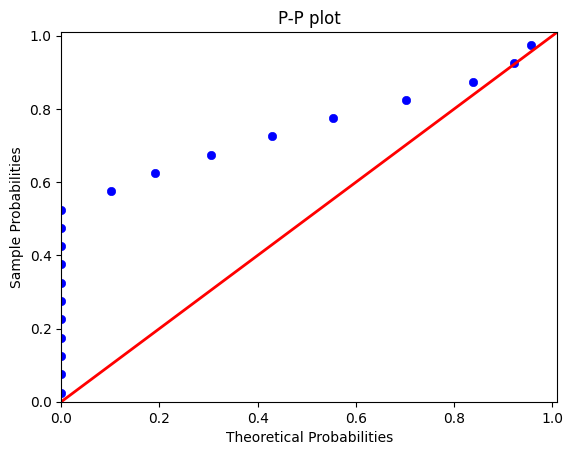



inicio_servicio_armado Distr. Normal
Parámetro estimado: Media = 47670.04021622998
Parámetro estimado: Desviación Estándar = 1433.2203722229835


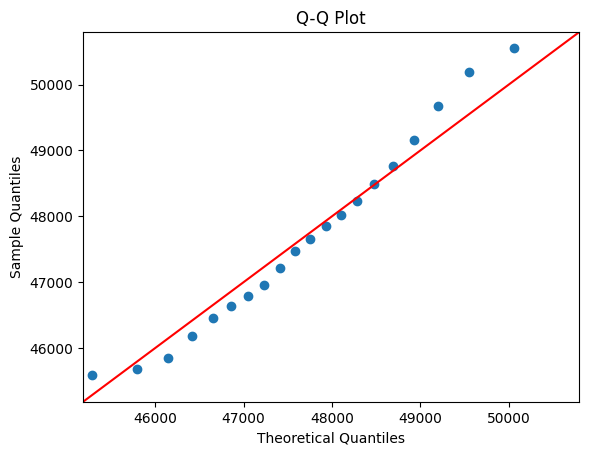

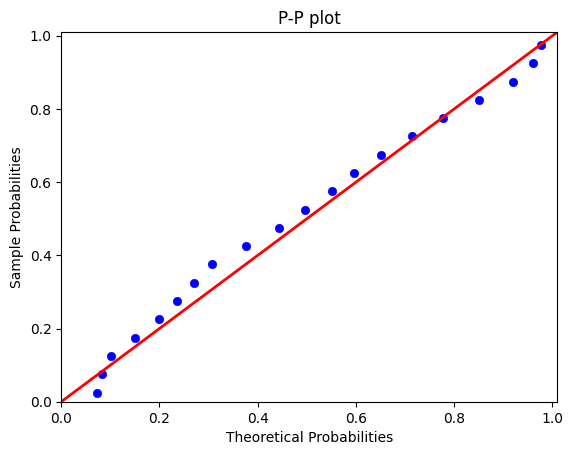



inicio_servicio_armado Distr. Exponencial
Parámetro estimado: Tasa = 2.0977536319751938e-05


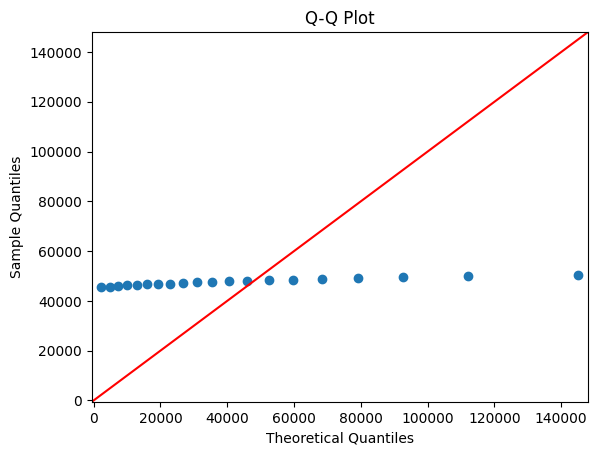

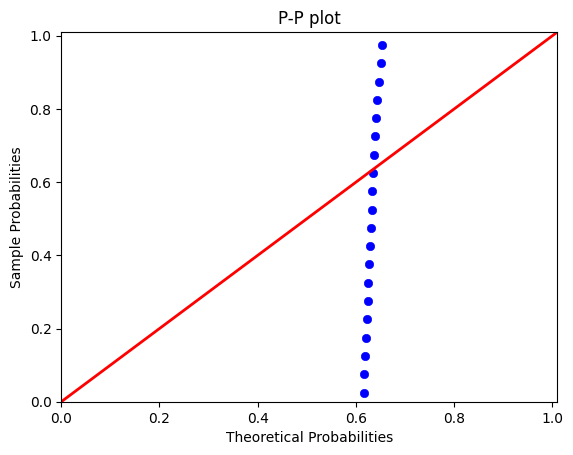



inicio_servicio_armado Distr. Uniforme
Parámetro estimado: a = 45586.27521623
Parámetro estimado: b = 50549.80521622999


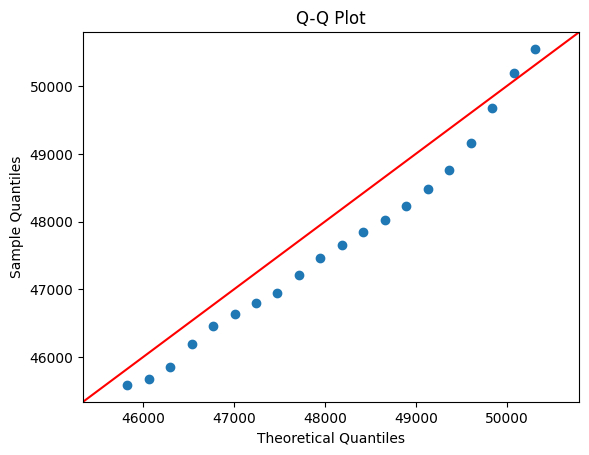

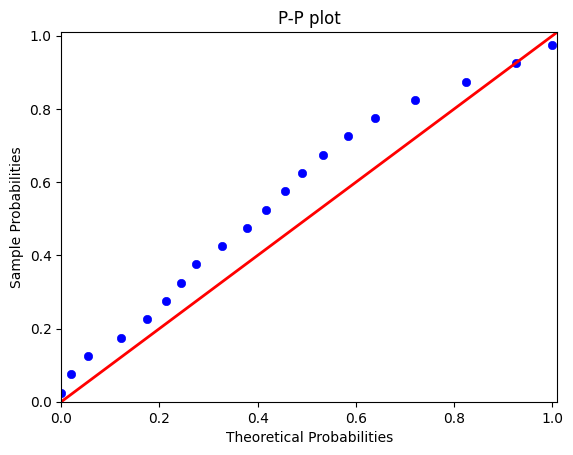



inicio_servicio_armado Distr. Weibull
Parámetro estimado: Escala = 48387.834658862485
Parámetro estimado: Forma = 33.453768856069686


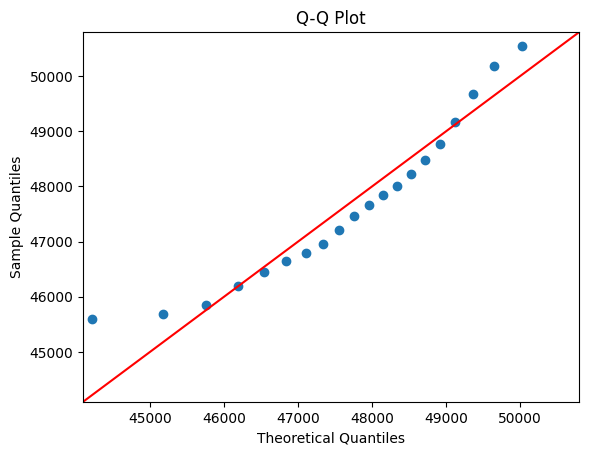

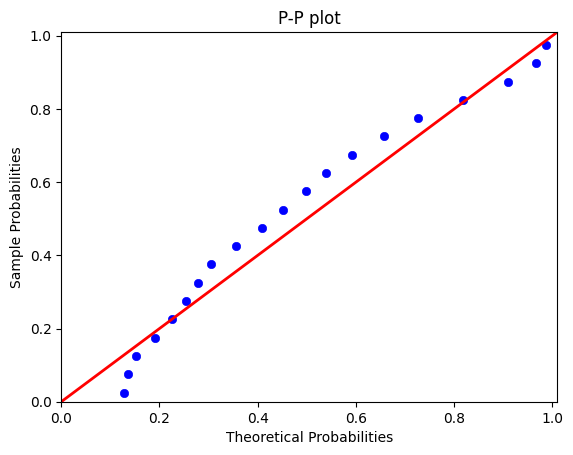



inicio_servicio_armado Distr. LogNorm
Parámetro estimado (normal asociada): Media = 10.771609529660862
Parámetro estimado (normal asociada): Desviación Estándar = 0.02991171762632432


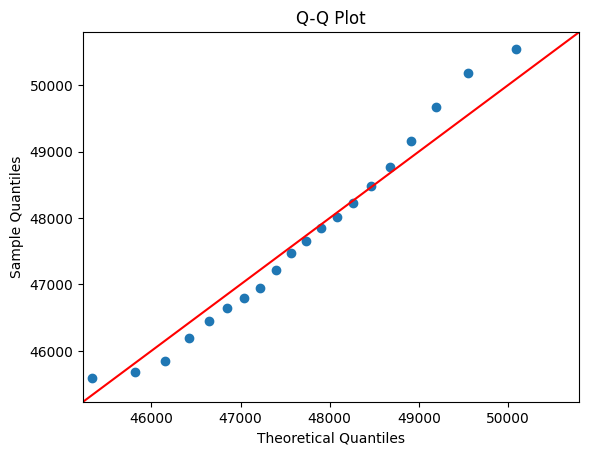

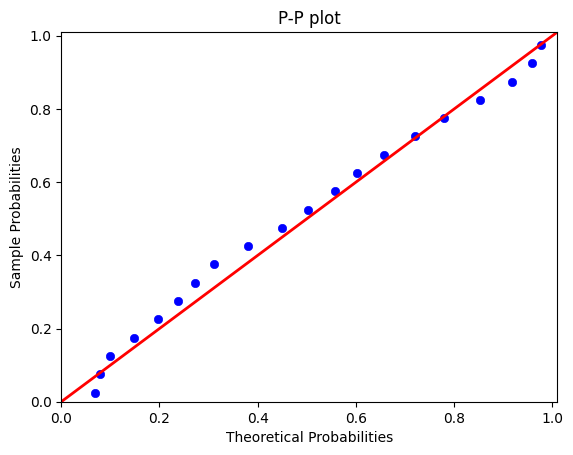



inicio_servicio_armado Distr. Triang
Parámetro estimado: a = 45586.27521623
Parámetro estimado: b = 50549.80521622999
Parámetro estimado: c = 45586.27521623


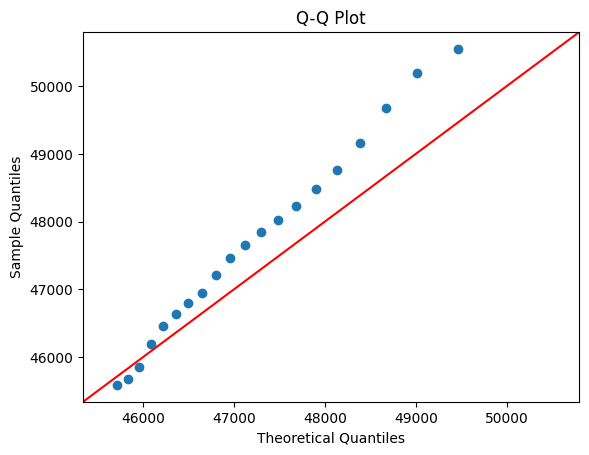

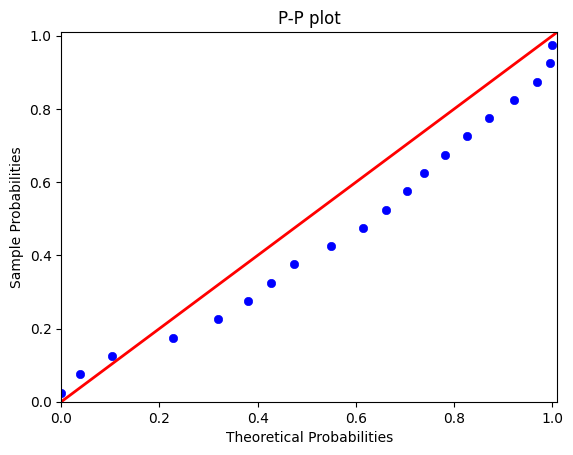

#############
#############
fin_servicio_armado Distr. Normal Truncada
Parámetro estimado: Media = 47799.225216229985
Parámetro estimado: Desviación Estándar = 1470.893494512771


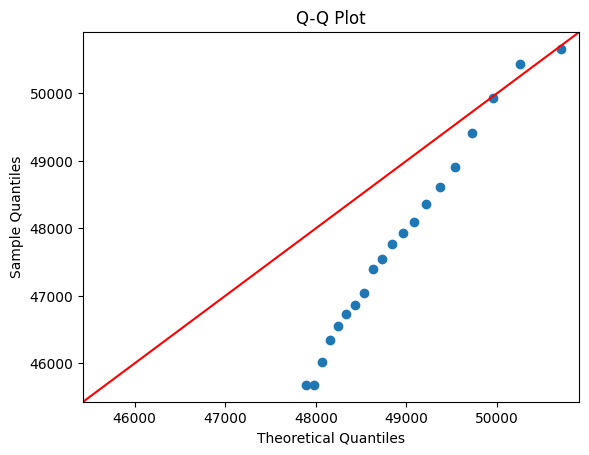

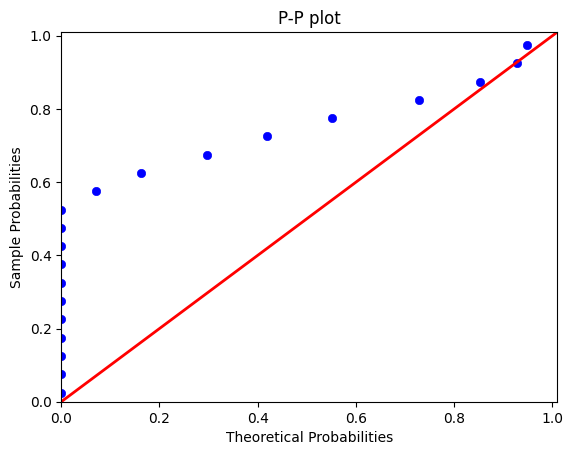



fin_servicio_armado Distr. Normal
Parámetro estimado: Media = 47799.225216229985
Parámetro estimado: Desviación Estándar = 1470.893494512771


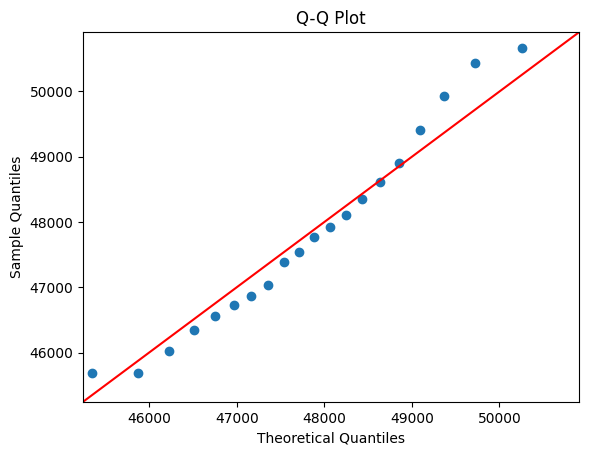

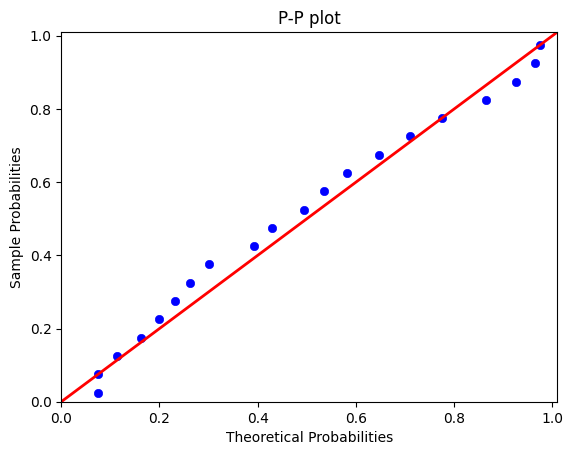



fin_servicio_armado Distr. Exponencial
Parámetro estimado: Tasa = 2.0920841195150902e-05


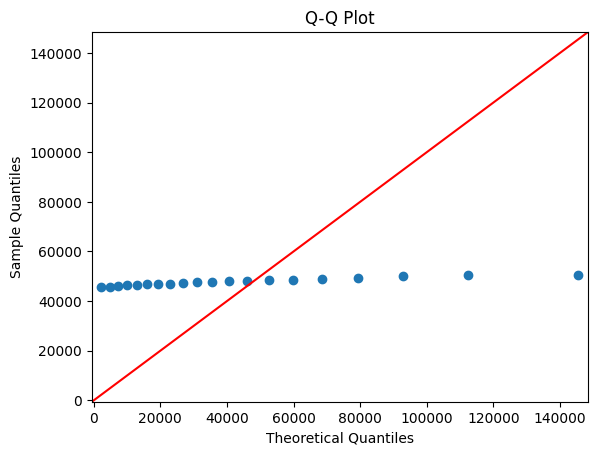

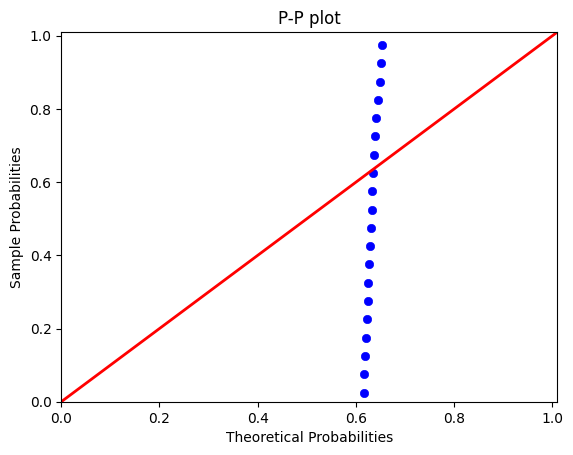



fin_servicio_armado Distr. Uniforme
Parámetro estimado: a = 45679.66521623
Parámetro estimado: b = 50660.28521623


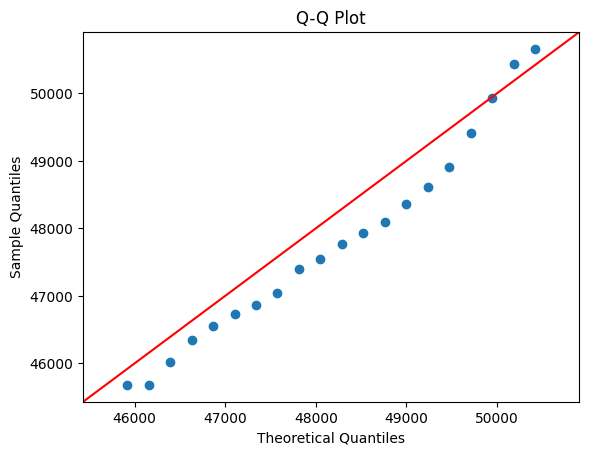

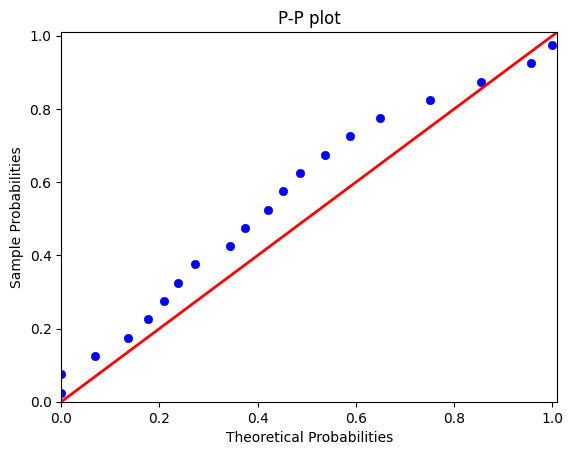



fin_servicio_armado Distr. Weibull
Parámetro estimado: Escala = 48536.253436893065
Parámetro estimado: Forma = 32.721560835957916


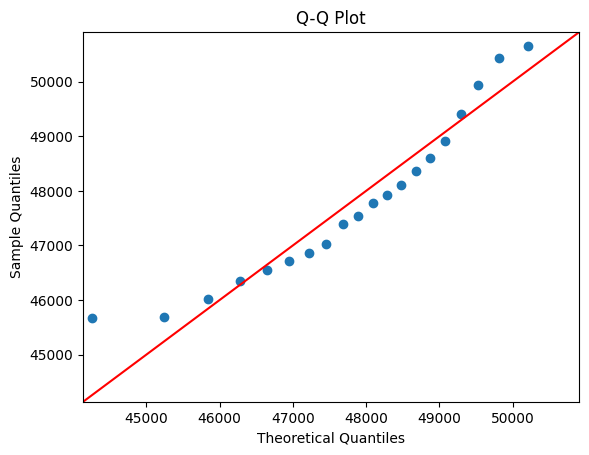

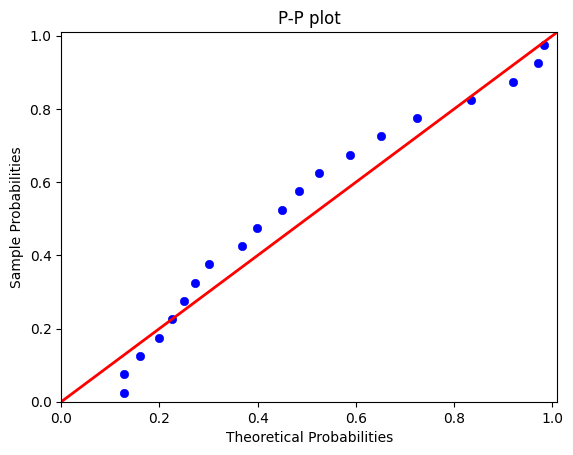



fin_servicio_armado Distr. LogNorm
Parámetro estimado (normal asociada): Media = 10.774294685420912
Parámetro estimado (normal asociada): Desviación Estándar = 0.03060554125688511


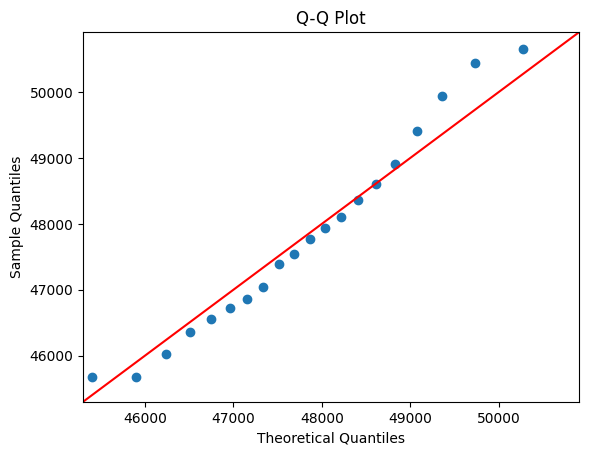

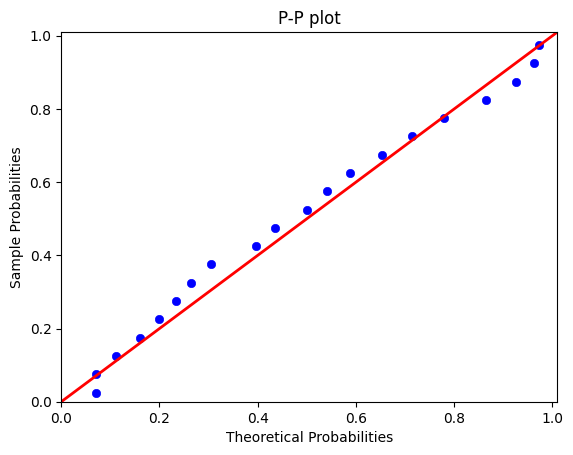



fin_servicio_armado Distr. Triang
Parámetro estimado: a = 45679.66521623
Parámetro estimado: b = 50660.28521623
Parámetro estimado: c = 45679.66521623


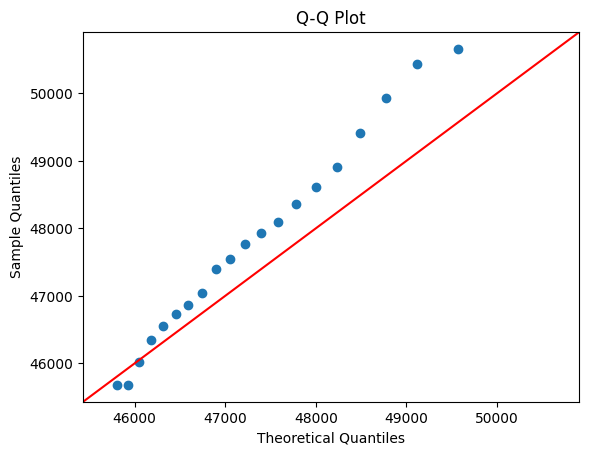

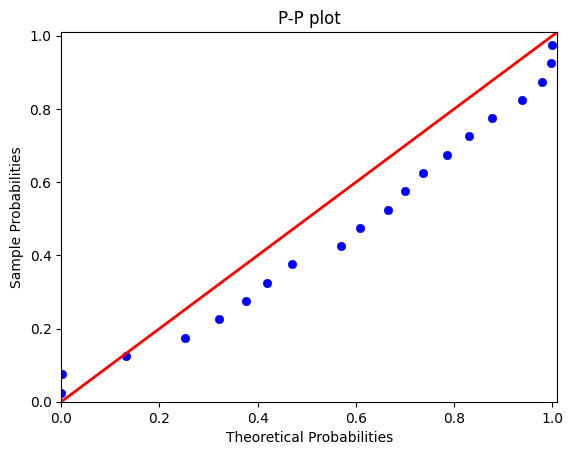

#############
#############
ts_armado Distr. Normal Truncada
Parámetro estimado: Media = 129.185
Parámetro estimado: Desviación Estándar = 66.09088586938444


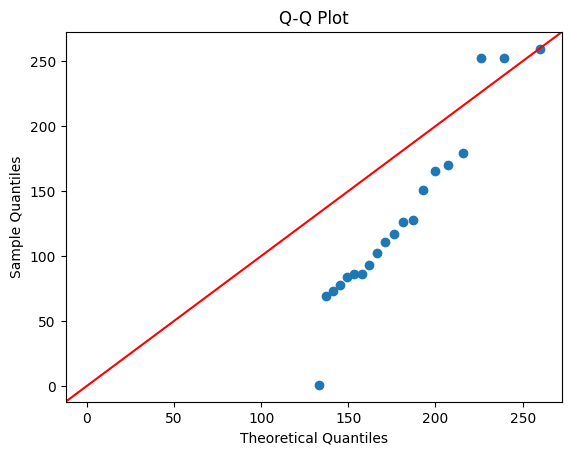

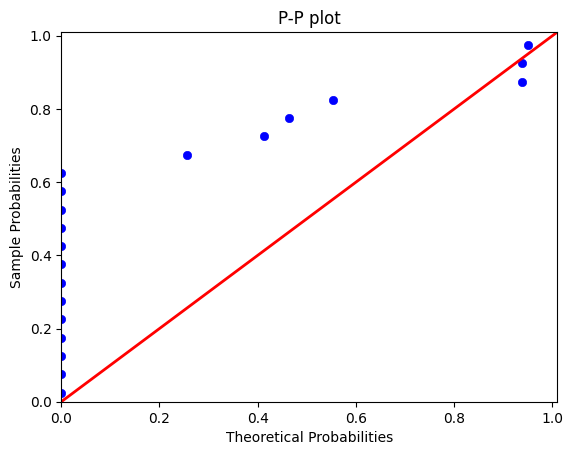



ts_armado Distr. Normal
Parámetro estimado: Media = 129.185
Parámetro estimado: Desviación Estándar = 66.09088586938444


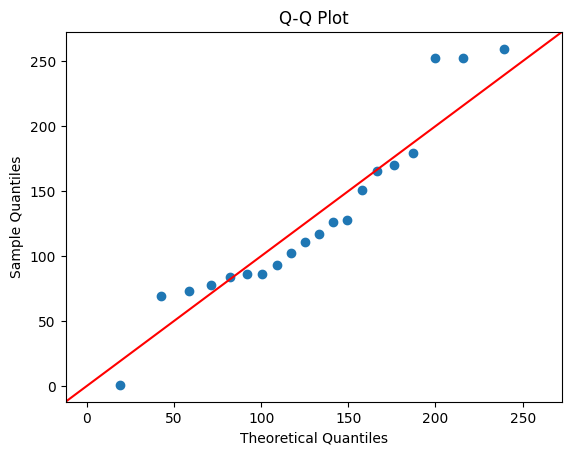

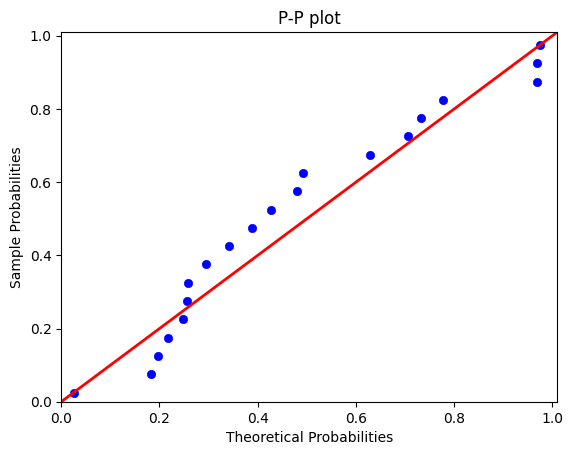



ts_armado Distr. Exponencial
Parámetro estimado: Tasa = 0.007740836784456399


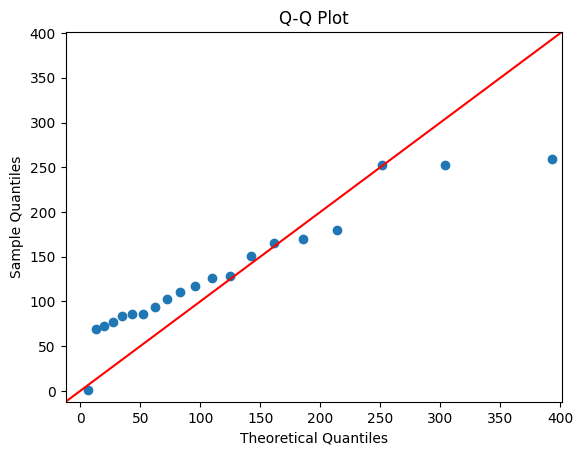

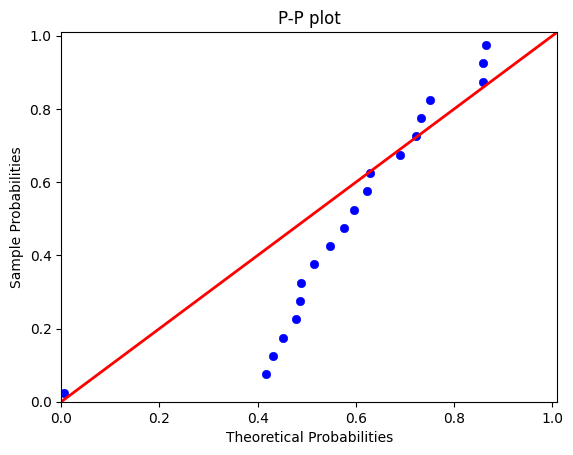



ts_armado Distr. Uniforme
Parámetro estimado: a = 0.81
Parámetro estimado: b = 259.44


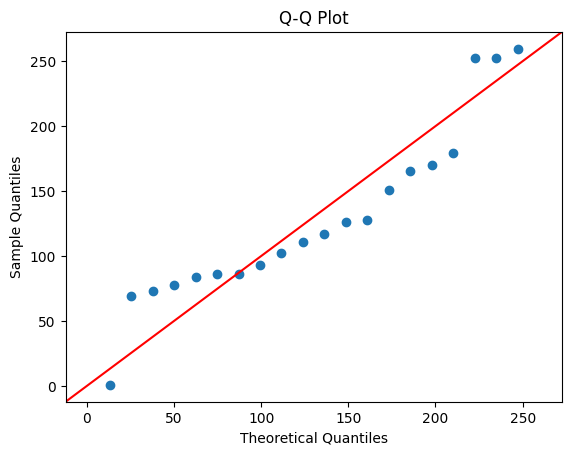

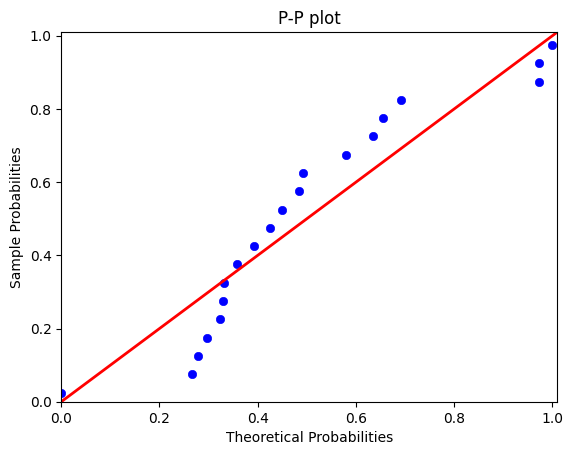



ts_armado Distr. Weibull
Parámetro estimado: Escala = 141.51205753069695
Parámetro estimado: Forma = 1.7570904053703469


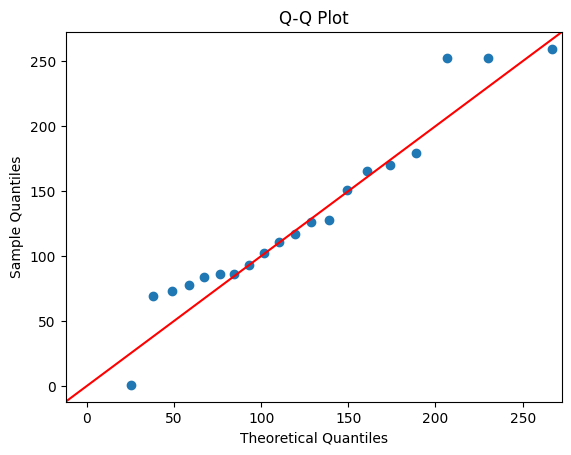

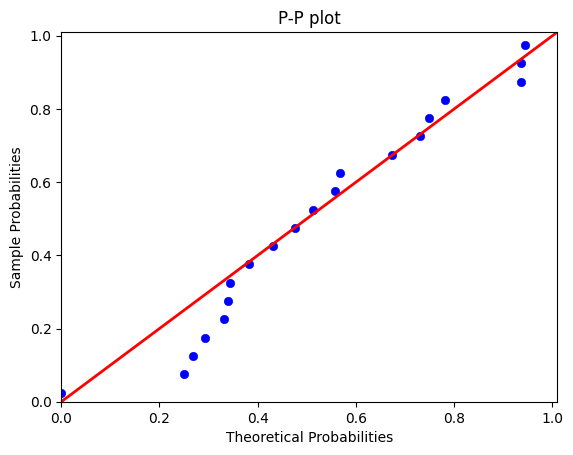



ts_armado Distr. LogNorm
Parámetro estimado (normal asociada): Media = 4.570096750064854
Parámetro estimado (normal asociada): Desviación Estándar = 1.1696301577700345


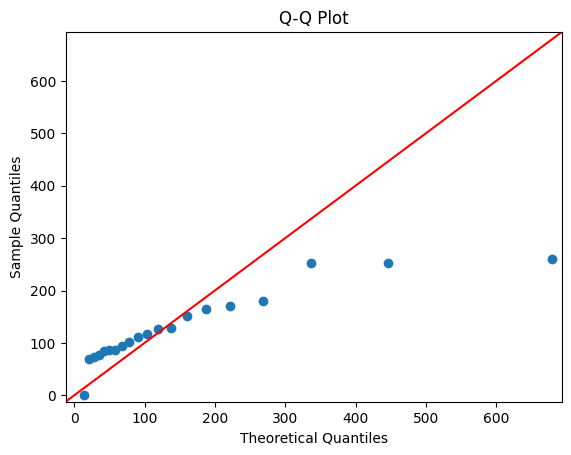

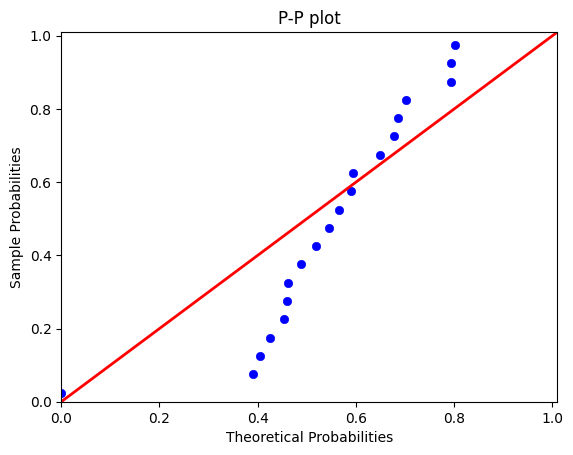



ts_armado Distr. Triang
Parámetro estimado: a = 0.81
Parámetro estimado: b = 259.44
Parámetro estimado: c = 93.39


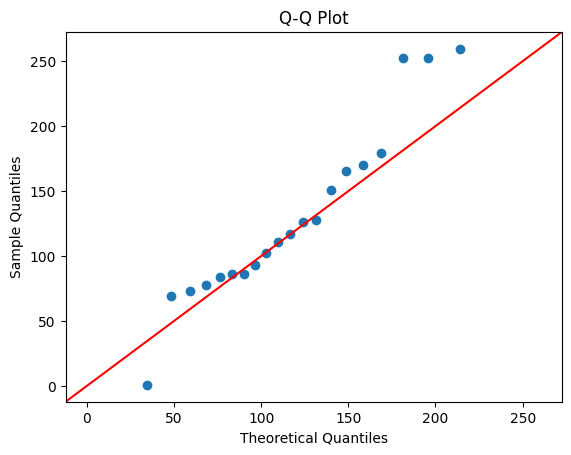

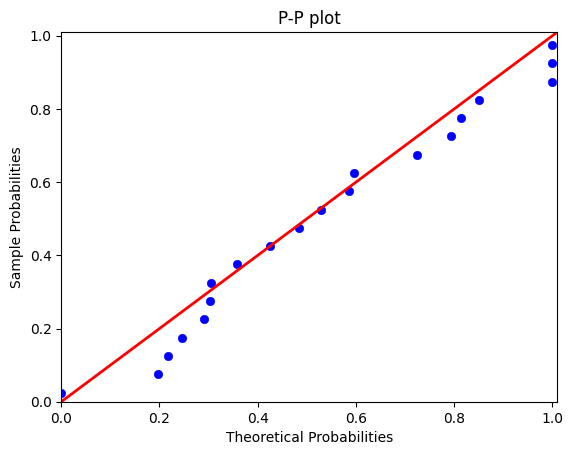

#############


In [92]:
for i in [_ for _ in datosPola.columns.tolist() if _ != "ts_armado_seg"]:
    series = np.array(datosPola[i]).flatten()
    series = series.astype(float)
    print("#############")
    print(f"{i} Distr. Normal Truncada")
    PP_QQ_plot_truncated_normal(series,media="estimado",desvesta="estimado")
    print("\n")
    
    print(f"{i} Distr. Normal")
    PP_QQ_plot_normal(series,media="estimado",desvesta="estimado")
    print("\n")
    print(f"{i} Distr. Exponencial")
    PP_QQ_plot_exponential(series,tasa="estimado")    
    print("\n")
    print(f"{i} Distr. Uniforme")
    PP_QQ_plot_uniform(series,minimo="estimado",maximo="estimado")
    print("\n")
    print(f"{i} Distr. Weibull")
    PP_QQ_plot_weibull(series,forma="estimado",escala="estimado")
    print("\n")
    print(f"{i} Distr. LogNorm")
    PP_QQ_plot_lognormal(series,media="estimado",desvesta="estimado")
    print("\n")
    print(f"{i} Distr. Triang")
    PP_QQ_plot_triangular(series,minimo="estimado",maximo="estimado",moda="estimado")
    print("#############")

In [93]:
for i in datosPola.columns.tolist():
    series = np.array(datosPola[i]).flatten()
    series = series.astype(float)
    data = series
    print("#############")
    print(f"{i} Distr. Normal Truncada")
    truncated_chi_square_normal_goodness_of_fit(data,media="estimado",desvesta="estimado",r=2)
    print("\n")

    print(f"{i} Distr. Normal")
    chi_square_normal_goodness_of_fit(data,media="estimado",desvesta="estimado",r=2)
    print("\n")

    print(f"{i} Distr. Exponencial")
    chi_square_exponential_goodness_of_fit(data,tasa="estimado",r=1)

    print("\n")
    print(f"{i} Distr. Uniforme")
    chi_square_uniform_goodness_of_fit(data,minimo="estimado",maximo="estimado",r=2)

    print("\n")
    print(f"{i} Distr. Weibull")
    chi_square_weibull_goodness_of_fit(data,forma="estimado",escala="estimado",r=2)
    print("\n")

    print(f"{i} Distr. LogNorm")
    chi_square_lognormal_goodness_of_fit(data,media="estimado",desvesta="estimado",r=2)
    print("\n")
    print(f"{i} Distr. Triang")
    chi_square_triangular_goodness_of_fit(data,minimo="estimado",maximo="estimado",moda="estimado",r=3)
    print("#############")

#############
llegada_fila Distr. Normal Truncada
Parámetro estimado: Media = 46290.249461745
Parámetro estimado: Desviación Estándar = 517.7304935771707
Chi-squared statistic: 9.199999999999637
p-value: 0.0024201512716482965
 No sigue la distribución


llegada_fila Distr. Normal
Parámetro estimado: Media = 46290.249461745
Parámetro estimado: Desviación Estándar = 517.7304935771707
Chi-squared statistic: 2.799999999999958
p-value: 0.09426430684121223
 Sigue la distribucion


llegada_fila Distr. Exponencial
Parámetro estimado: Tasa = 2.160282157965936e-05
Chi-squared statistic: 55.0
p-value: 1.1399770016851107e-12
 No sigue la distribucion


llegada_fila Distr. Uniforme
Parámetro estimado: a = 45413.0
Parámetro estimado: b = 47082.97618881999
Chi-squared statistic: 1.1999999999999935
p-value: 0.2733216782922996
 Sigue la distribucion


llegada_fila Distr. Weibull
Parámetro estimado: Escala = 46541.886249580566
Parámetro estimado: Forma = 103.66557574632512
Chi-squared statistic: 0.02743

c:\Users\user\Desktop\Andes\9\Simu\simu\Proyecto\funcioneschicuadrado_continuas.py:164: RuntimeWarning: divide by zero encountered in log
  mean = np.mean(np.log(data))
c:\Users\user\Desktop\Andes\9\Simu\simu\Proyecto\funcioneschicuadrado_continuas.py:170: RuntimeWarning: divide by zero encountered in log
  std_dev = np.std(np.log(data))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


Chi-squared statistic: 7.588174389896393
p-value: 0.005875241610533655
 No sigue la distribucion


ts_caja_seg Distr. LogNorm
Parámetro estimado (lognormal asociada): Media = 3.5210730745691805
Parámetro estimado (lognormal asociada): Desviación Estándar = 0.6487269022208407
Chi-squared statistic: 4.0
p-value: 0.04550026389635853
 No sigue la distribucion


ts_caja_seg Distr. Triang
Parámetro estimado: a = 11.06006474
Parámetro estimado: b = 72.70757965
Parámetro estimado: c = 19.89722313
Chi-squared statistic: 15.39620627318178
p-value: nan
 No sigue la distribucion
#############
#############
inicio_servicio_armado Distr. Normal Truncada
Parámetro estimado: Media = 47670.04021622998
Parámetro estimado: Desviación Estándar = 1433.2203722229835
Chi-squared statistic: 16.400000000000095
p-value: 5.128522964059634e-05
 No sigue la distribución


inicio_servicio_armado Distr. Normal
Parámetro estimado: Media = 47670.04021622998
Parámetro estimado: Desviación Estándar = 1433.2203722229835


In [65]:
import pandas as pd
import numpy as np
from scipy.stats import truncnorm

df = pd.DataFrame()

# Supongamos que 'df' es tu DataFrame y 'TEA_caja' es la columna que quieres transformar
datos_originales = datosPola['TEA_caja']

# Calcular la media y la desviación estándar de los datos originales
media = np.mean(datos_originales)
desviacion_estandar = np.std(datos_originales)

# Definir los límites de la distribución normal truncada
limite_inferior = 0
limite_superior = np.inf

# Calcular los parámetros 'a' y 'b' de la distribución normal truncada
a, b = (limite_inferior - media) / desviacion_estandar, (limite_superior - media) / desviacion_estandar

# Generar datos a partir de la distribución normal truncada
datos_transformados = truncnorm(a, b, loc=media, scale=desviacion_estandar).rvs(len(datos_originales))

# Guardar los datos transformados en la columna 'TEA_caja' del DataFrame
df['TEA_caja'] = datos_transformados

df.to_csv("TEA_caja_normal_truncada.csv",index= False)

# Guardar archivos csv

In [66]:
datosPola

llegada_fila  TEA_caja inicio_servicio_caja fin_servicio_caja  \
0         45413      0.00                45459             45486   
1         45415      2.01                45487             45537   
2         45528    112.63                45539             45572   
3         45529      1.26                45574             45588   
4         45551     21.66                45591             45649   
5         45730    179.41                45749             45824   
6         45846    116.25                45851             45892   
7         45924     77.42                45931             45989   
8         45950     25.93                45990             46047   
9         46301    351.08                46308             46359   
10        46306      5.19                46361             46427   
11        46413    106.65                46444             46473   
12        46424     11.40                46478             46531   
13        46770    346.37                46772             46846   
14        47025    252.63                47078             47137   
15        47178    149.71                47182             47259   
16        47179      0.75                47260             47270   
17        47255     76.79                47271             47314   
18        47360    104.33                47368             47410   
19        47596    236.55                47611             47685   

    ts_caja_segs inicio_servicio_armado fin_servicio_armado  ts_armado_seg  
0           27.0                  45551               45644          93.39  
1           50.0                  45555               45651           0.81  
2           33.0                  45602               45771         170.07  
3           14.0                  45608               45772         165.10  
4           58.0                  45671               45773         102.29  
5           75.0                  45827               45911          84.20  
6           41.0                  45893               45961          69.52  
7           58.0                  45993               46077          85.90  
8           57.0                  46051               46229         179.55  
9           51.0                  46363               46434          72.82  
10          66.0                  46430               46547         117.20  
11          29.0                  46484               46560          77.42  
12          53.0                  46540               46626          86.33  
13          74.0                   3655               46982         127.88  
14          59.0                   3940               47266         126.00  
15          77.0                   4065               47414         150.81  
16          10.0                   4072               47524         252.30  
17          43.0                   4155               47614         259.44  
18          42.0                   4216               47668         252.19  
19          74.0                   4489               47799         110.48

In [67]:
lista = serie_predicha_ml_ts_armado.tolist()

# Convertir la lista a un DataFrame
newDf = pd.DataFrame(lista, columns=['serie_predicha_ml_ts_armado'])

# Guardar el DataFrame en un archivo CSV
newDf.to_csv('serie_predicha_ml_ts_armado.csv', index=False)

lista = serie_predicha_pola_ts_armado.tolist()

# Convertir la lista a un DataFrame
newDf = pd.DataFrame(lista, columns=['serie_predicha_pola_ts_armado'])

# Guardar el DataFrame en un archivo CSV
newDf.to_csv('serie_predicha_pola_ts_armado.csv', index=False)

In [68]:
datos

Index(['TEA_caja'], dtype='object')

In [69]:
df.drop(columns=["ts_armado_seg"],inplace=True)
datosPola.drop(columns=['ts_armado_seg'],inplace=True)

KeyError: "['ts_armado_seg'] not found in axis"

In [ ]:
df.to_csv("ML_tiempos_segundos.csv")
datosPola.to_csv("Pola_tiempos_segundos.csv")